In [1]:
#title: "XenoProject_Analyses_Statistics_vJDM_FINAL"
#author: "Joe Madison & Carly Muletz Wolz"
#date: "2024-04-12"

In [2]:
setwd("/home/joe/Documents/Smithsonian/XenopusProbioticProject/Carly_Stats/Xeno_Probiotic_results")

In [3]:
getwd()

[1] "/home/joe/Documents/Smithsonian/XenopusProbioticProject/Carly_Stats/Xeno_Probiotic_results"

In [4]:
install.packages("readxl")
install.packages("ggplot2")
install.packages("ggpmisc")
install.packages("lme4")
install.packages("car")
install.packages("phyloseq")
install.packages("emmeans")
install.packages("ape")
install.packages("vegan")
install.packages("pairwiseAdonis")
install.packages("BiocManager")
install.packages("DECIPHER")
install.packages("Biostrings")
install.packages("plyr")
install.packages("viridis")
install.packages("ggsignif")
install.packages("ggpubr")
install.packages("FSA")

Installing package into ‘/home/joe/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/joe/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/joe/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/joe/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/joe/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/joe/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Warning message:
“package ‘phyloseq’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/home/joe/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/joe/R/x86_64-pc-linux-gnu-library/4

In [5]:
library(readxl)
library(ggplot2)
library(ggpmisc)
library(lme4)
library(car)
library(phyloseq)
library(emmeans)
library(ape)
library(vegan)
library(pairwiseAdonis)
library(BiocManager)
library(DECIPHER)
library(Biostrings)
library(plyr)
library(viridis)
library(ggsignif)
library(ggpubr)
library(FSA)
library(dplyr)

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: Matrix

Loading required package: carData

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

Loading required package: permute

Loading required package: lattice

Loading required package: cluster

Bioconductor version '3.14' is out-of-date; the current release version '3.20'
  is available with R version '4.4'; see https://bioconductor.org/install

Loading required package: Biostrings

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, ap

In [6]:
###FORMATTING DATA AND SUMMARY STATISTICS

In [7]:
setwd("/home/joe/Documents/Smithsonian/XenopusProbioticProject/CombinedRunFiles_combined_with_dada2/Final_Files_Copies")

In [8]:
getwd()

[1] "/home/joe/Documents/Smithsonian/XenopusProbioticProject/CombinedRunFiles_combined_with_dada2/Final_Files_Copies"

In [9]:
#Read rarefied feature table.

In [10]:
featureTab <- otu_table(read.csv("vJDM_XENGPRO2022_feature_table_comborunFINAL_rarefy_3_7_24.csv", header = T, row.names = 1), taxa_are_rows = TRUE)

In [11]:
dim(featureTab)

[1] 1138  226

In [12]:
#Read taxonomy info in, make matrix and compatible for phyloseq

In [13]:
taxonomy <- tax_table(as.matrix(read.csv("vJDM_XENGPRO2022_taxonomy_comborun.csv", row.names = 1)))

In [14]:
#read meta-data file, one used here is 3_23_24_with_anti_qpcr which includes 2_26_24 plus more

In [15]:
meta_data <- sample_data(read.csv("XENGPro2022_meta_FINAL_3_23_24_with_anti_qpcr_real.csv", header = T, row.names = 1))

In [16]:
#SampleID is now row.names, still useful to have SampleID in metadata so add in

In [17]:
meta_data$SampleID <- row.names(meta_data)

In [18]:
#Read in sequence data, this may be needed if you want to look at a subset of the DNA sequences at some point

In [19]:
seqs <- readDNAStringSet("vJDM_XENGPRO2022_DNAsequences_combo.fasta")

In [20]:
#Merge it all together

In [21]:
xk8 <- merge_phyloseq(featureTab, taxonomy, meta_data, seqs) #tree)

In [22]:
xk8

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1138 taxa and 226 samples ]
sample_data() Sample Data:       [ 226 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 1138 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 1138 reference sequences ]

In [23]:
dfxk8 <- as(sample_data(xk8), "data.frame")

In [24]:
str(dfxk8)

'data.frame':	226 obs. of  55 variables:
 $ Row.names.x                        : chr  "CF10D0" "CF10W1" "CF11D0" "CF11W1" ...
 $ quant_reading                      : num  25.4 43.2 18.9 50.2 35.6 46.8 8.6 54.6 58.4 38.4 ...
 $ Treatment                          : chr  "C" "C" "C" "C" ...
 $ FrogID                             : chr  "F10" "F10" "F11" "F11" ...
 $ FrogNo                             : int  10 10 11 11 12 12 13 13 13 13 ...
 $ DayWeekNo                          : chr  "D0" "W1" "D0" "W1" ...
 $ Day                                : int  0 8 0 8 0 8 0 8 15 22 ...
 $ Sample.type                        : chr  "swab" "swab" "swab" "swab" ...
 $ TrmtTP                             : chr  "CD0" "CW1" "CD0" "CW1" ...
 $ TubeLabel                          : chr  "CF10D0" "CF10W1" "CF11D0" "CF11W1" ...
 $ ExtractionDate                     : chr  "9/27/22" "10/5/22" "9/13/22" "10/13/22" ...
 $ ExtColumn                          : chr  "G" "F" "C" "B" ...
 $ ExtRow                    

In [25]:
#Come back to make factors in phyloseq object

In [26]:
dfxk8$Treatment <- factor(dfxk8$Treatment, levels = c("C", "P1", "P2", "P3", "P4"))

In [27]:
dfxk8$DayWeekNo <- factor(dfxk8$DayWeekNo, levels = c("D0", "W1", "W2", "W3"))

In [28]:
dfxk8$TrmtTP <- as.factor(dfxk8$TrmtTP)

In [29]:
dfxk8$FrogNo <- as.factor(dfxk8$FrogNo)

In [30]:
#Make sure you ran this with -anti file. If not, rerun once you create -anti file

###Next section calculating final coverage, sample size, and sequence counts


In [31]:
sort(sample_sums(xk8))

CF10D0  CF10W1  CF11D0  CF11W1  CF12D0  CF12W1  CF13D0  CF13W1  CF13W2  CF13W3 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 CF14D0  CF14W1  CF14W2  CF14W3  CF15D0  CF15W1  CF15W2  CF15W3  CF16D0  CF16W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 CF16W2  CF16W3  CF17D0  CF17W1  CF17W2  CF17W3  CF18D0  CF18W1  CF18W2  CF18W3 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
  CF1D0   CF1W1   CF2D0   CF2W1   CF3D0   CF3W1   CF4D0   CF4W1   CF5W1   CF6D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
  CF6W1   CF7D0   CF7W1   CF8D0   CF8W1   CF9W1 P1F10D0 P1F10W1 P1F11D0 P1F11W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P1F12W1 P1F13D0 P1F13W1 P1F13W2 P1F13W3 P1F14D0 P1F14W1 P1F14W2 P1F14W3 P1F15D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P1F15W1 P1F15W3 P1F16D0 P1F16W1 P1F16W2 P1F16W3 P1F17D0 P1F17W2 P1F17W3 P1F18D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P1F18W2 P1F18W3  P1F1D0  P1F1W1  P1F2D0  P1F2W1  P1F3W1  P1F4D0  P1F4W1  P1F5D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P1F5W1  P1F6D0  P1F6W1  P1F7D0  P1F7W1  P1F8D0  P1F8W1  P1F9D0  P1F9W1 P2F10D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P2F10W1 P2F12D0 P2F12W1 P2F13D0 P2F13W1 P2F13W2 P2F13W3 P2F14D0 P2F14W1 P2F14W2 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P2F14W3 P2F15D0 P2F15W1 P2F15W2 P2F15W3 P2F16W1 P2F16W2 P2F16W3 P2F17D0 P2F17W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P2F17W2 P2F17W3 P2F18D0 P2F18W1 P2F18W2 P2F18W3  P2F1D0  P2F1W1  P2F2D0  P2F2W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P2F3D0  P2F3W1  P2F4W1  P2F5D0  P2F5W1  P2F6D0  P2F6W1  P2F7D0  P2F7W1  P2F8D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P2F8W1  P2F9D0  P2F9W1 P3F10W1 P3F11D0 P3F11W1 P3F12D0 P3F12W1 P3F13D0 P3F13W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P3F13W2 P3F13W3 P3F14W1 P3F14W2 P3F14W3 P3F15D0 P3F15W1 P3F15W2 P3F15W3 P3F16D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P3F16W1 P3F16W2 P3F16W3 P3F17D0 P3F17W1 P3F17W2 P3F17W3 P3F18D0 P3F18W1 P3F18W2 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P3F18W3  P3F1D0  P3F1W1  P3F2D0  P3F2W1  P3F3D0  P3F3W1  P3F4D0  P3F4W1  P3F5D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P3F5W1  P3F6D0  P3F6W1  P3F7D0  P3F7W1  P3F8D0  P3F8W1  P3F9D0  P3F9W1 P4F10D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P4F10W1 P4F11D0 P4F11W1 P4F12D0 P4F12W1 P4F13D0 P4F13W1 P4F13W2 P4F13W3 P4F14D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P4F14W1 P4F14W2 P4F14W3 P4F15D0 P4F15W1 P4F15W2 P4F15W3 P4F16D0 P4F16W1 P4F16W2 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P4F16W3 P4F17D0 P4F17W1 P4F17W2 P4F17W3 P4F18D0 P4F18W1 P4F18W2 P4F18W3  P4F1D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P4F1W1  P4F2D0  P4F2W1  P4F3W1  P4F4D0  P4F4W1  P4F5D0  P4F5W1  P4F6D0  P4F6W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P4F7D0  P4F7W1  P4F8D0  P4F8W1  P4F9D0  P4F9W1 
   2575    2575    2575    2575    2575    2575

In [32]:
max(sample_sums(xk8))/min(sample_sums(xk8))

[1] 1

In [33]:
##True final coverage difference = 13.99x.

In [34]:
sum(sample_sums(xk8))

[1] 581950

In [35]:
#These are final sequence counts, approximately 3,517,721. This similar to what Lindsey had in analyzing one run.

In [36]:
##Info on sample sizes 

In [37]:
info <- ddply(dfxk8 , .(TrmtTP), summarize, sample_size=length(TrmtTP))

In [38]:
info

TrmtTP sample_size
1  CD0    16         
2  CW1    18         
3  CW2     6         
4  CW3     6         
5  P1D0   16         
6  P1W1   16         
7  P1W2    5         
8  P1W3    6         
9  P2D0   15         
10 P2W1   17         
11 P2W2    6         
12 P2W3    6         
13 P3D0   16         
14 P3W1   18         
15 P3W2    6         
16 P3W3    6         
17 P4D0   17         
18 P4W1   18         
19 P4W2    6         
20 P4W3    6

In [39]:
##WeekS 0,1,2,3 alpha diversity

In [40]:
xk0 <- subset_samples(xk8, DayWeekNo == "D0")

In [41]:
xk1 <- subset_samples(xk8, DayWeekNo == "W1")

In [42]:
xk2 <- subset_samples(xk8, DayWeekNo == "W2")

In [43]:
xk3 <- subset_samples(xk8, DayWeekNo == "W3")

In [44]:
df0 <- as(sample_data(xk0), "data.frame")

In [45]:
df1 <- as(sample_data(xk1), "data.frame")

In [46]:
df2 <- as(sample_data(xk2), "data.frame")

In [47]:
df3 <- as(sample_data(xk3), "data.frame")

In [48]:
df0$Treatment <- as.factor(df0$Treatment)

In [49]:
df1$Treatment <- as.factor(df1$Treatment)

In [50]:
df2$Treatment <- as.factor(df2$Treatment)

In [51]:
df3$Treatment <- as.factor(df3$Treatment)

In [52]:
df0$DayWeekNo <- as.factor(df0$DayWeekNo)

In [53]:
df1$DayWeekNo <- as.factor(df1$DayWeekNo)

In [54]:
df2$DayWeekNo <- as.factor(df2$DayWeekNo)

In [55]:
df3$DayWeekNo <- as.factor(df3$DayWeekNo)

In [56]:
df0$TrmtTP <- as.factor(df0$TrmtTP)

In [57]:
df1$TrmtTP <- as.factor(df1$TrmtTP)

In [58]:
df2$TrmtTP <- as.factor(df2$TrmtTP)

In [59]:
df3$TrmtTP <- as.factor(df3$TrmtTP)

In [60]:
xk0 <- filter_taxa(xk0, function(x) sum(x) !=0, TRUE)

In [61]:
xk1 <- filter_taxa(xk1, function(x) sum(x) !=0, TRUE)

In [62]:
xk2 <- filter_taxa(xk2, function(x) sum(x) !=0, TRUE)

In [63]:
xk3 <- filter_taxa(xk3, function(x) sum(x) !=0, TRUE)

In [64]:
str(df0)

'data.frame':	80 obs. of  55 variables:
 $ Row.names.x                        : chr  "CF10D0" "CF11D0" "CF12D0" "CF13D0" ...
 $ quant_reading                      : num  25.4 18.9 35.6 8.6 24.4 15.7 33.2 3.38 29.4 14.3 ...
 $ Treatment                          : Factor w/ 5 levels "C","P1","P2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ FrogID                             : chr  "F10" "F11" "F12" "F13" ...
 $ FrogNo                             : int  10 11 12 13 14 15 16 17 18 1 ...
 $ DayWeekNo                          : Factor w/ 1 level "D0": 1 1 1 1 1 1 1 1 1 1 ...
 $ Day                                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Sample.type                        : chr  "swab" "swab" "swab" "swab" ...
 $ TrmtTP                             : Factor w/ 5 levels "CD0","P1D0","P2D0",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TubeLabel                          : chr  "CF10D0" "CF11D0" "CF12D0" "CF13D0" ...
 $ ExtractionDate                     : chr  "9/27/22" "9/13/22" "9/13/22" "9/22/22" ...
 $ ExtColu

In [65]:
str(df1)

'data.frame':	87 obs. of  55 variables:
 $ Row.names.x                        : chr  "CF10W1" "CF11W1" "CF12W1" "CF13W1" ...
 $ quant_reading                      : num  43.2 50.2 46.8 54.6 46.2 54.8 47.4 49.6 40 49 ...
 $ Treatment                          : Factor w/ 5 levels "C","P1","P2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ FrogID                             : chr  "F10" "F11" "F12" "F13" ...
 $ FrogNo                             : int  10 11 12 13 14 15 16 17 18 1 ...
 $ DayWeekNo                          : Factor w/ 1 level "W1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Day                                : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Sample.type                        : chr  "swab" "swab" "swab" "swab" ...
 $ TrmtTP                             : Factor w/ 5 levels "CW1","P1W1","P2W1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TubeLabel                          : chr  "CF10W1" "CF11W1" "CF12W1" "CF13W1" ...
 $ ExtractionDate                     : chr  "10/5/22" "10/13/22" "10/13/22" "10/13/22" ...
 $ ExtColu

In [66]:
str(df2)

'data.frame':	29 obs. of  55 variables:
 $ Row.names.x                        : chr  "CF13W2" "CF14W2" "CF15W2" "CF16W2" ...
 $ quant_reading                      : num  58.4 66.6 42.6 76 68.8 63.4 53.8 71 32.6 53 ...
 $ Treatment                          : Factor w/ 5 levels "C","P1","P2",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ FrogID                             : chr  "F13" "F14" "F15" "F16" ...
 $ FrogNo                             : int  13 14 15 16 17 18 13 14 16 17 ...
 $ DayWeekNo                          : Factor w/ 1 level "W2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Day                                : int  15 15 15 15 15 15 15 15 15 15 ...
 $ Sample.type                        : chr  "swab" "swab" "swab" "swab" ...
 $ TrmtTP                             : Factor w/ 5 levels "CW2","P1W2","P2W2",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ TubeLabel                          : chr  "CF13W2" "CF14W2" "CF15W2" "CF16W2" ...
 $ ExtractionDate                     : chr  "10/5/22" "10/3/22" "10/5/22" "10/3/22" ...
 $ E

In [67]:
str(df3)

'data.frame':	30 obs. of  55 variables:
 $ Row.names.x                        : chr  "CF13W3" "CF14W3" "CF15W3" "CF16W3" ...
 $ quant_reading                      : num  38.4 63.4 45 59 66.4 29.8 48 67.4 55.6 67.8 ...
 $ Treatment                          : Factor w/ 5 levels "C","P1","P2",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ FrogID                             : chr  "F13" "F14" "F15" "F16" ...
 $ FrogNo                             : int  13 14 15 16 17 18 13 14 15 16 ...
 $ DayWeekNo                          : Factor w/ 1 level "W3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Day                                : int  22 22 22 22 22 22 22 22 22 22 ...
 $ Sample.type                        : chr  "swab" "swab" "swab" "swab" ...
 $ TrmtTP                             : Factor w/ 5 levels "CW3","P1W3","P2W3",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ TubeLabel                          : chr  "CF13W3" "CF14W3" "CF15W3" "CF16W3" ...
 $ ExtractionDate                     : chr  "10/5/22" "10/3/22" "10/13/22" "10/3/22" ...
 $ 

In [68]:
#XPdf <- read_excel("XENGPro2022_meta_FINAL_3_7_24_with_anti.xls")

In [69]:
#XPdfq <- read_excel("XENGPro2022_meta_FINAL_3_23_24_with_anti_qpcr.xls")

In [70]:
## I also added in a corrected anti_rare_corrected as we needed to delete the amount of seq counts in the probiotic from the anti_rare_ratio to correct for the anti-Bd bacteria that we added

In [71]:
XPdfq <-read.csv("XENGPro2022_meta_FINAL_3_23_24_with_anti_qpcr_real.csv", header = T, row.names = 1)

In [72]:
str(XPdfq)

'data.frame':	226 obs. of  54 variables:
 $ Row.names.x                        : chr  "CF10D0" "CF11D0" "CF12D0" "CF13D0" ...
 $ quant_reading                      : num  25.4 18.9 35.6 8.6 24.4 15.7 33.2 3.38 29.4 14.3 ...
 $ Treatment                          : chr  "C" "C" "C" "C" ...
 $ FrogID                             : chr  "F10" "F11" "F12" "F13" ...
 $ FrogNo                             : int  10 11 12 13 14 15 16 17 18 1 ...
 $ DayWeekNo                          : chr  "D0" "D0" "D0" "D0" ...
 $ Day                                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Sample.type                        : chr  "swab" "swab" "swab" "swab" ...
 $ TrmtTP                             : chr  "CD0" "CD0" "CD0" "CD0" ...
 $ TubeLabel                          : chr  "CF10D0" "CF11D0" "CF12D0" "CF13D0" ...
 $ ExtractionDate                     : chr  "9/27/22" "9/13/22" "9/13/22" "9/22/22" ...
 $ ExtColumn                          : chr  "G" "C" "D" "E" ...
 $ ExtRow                        

In [73]:
XPdfq$pc1jw1

NULL

In [74]:
#Statistical assumptions
#Checking for normal distribution and effectiveness of different transformations

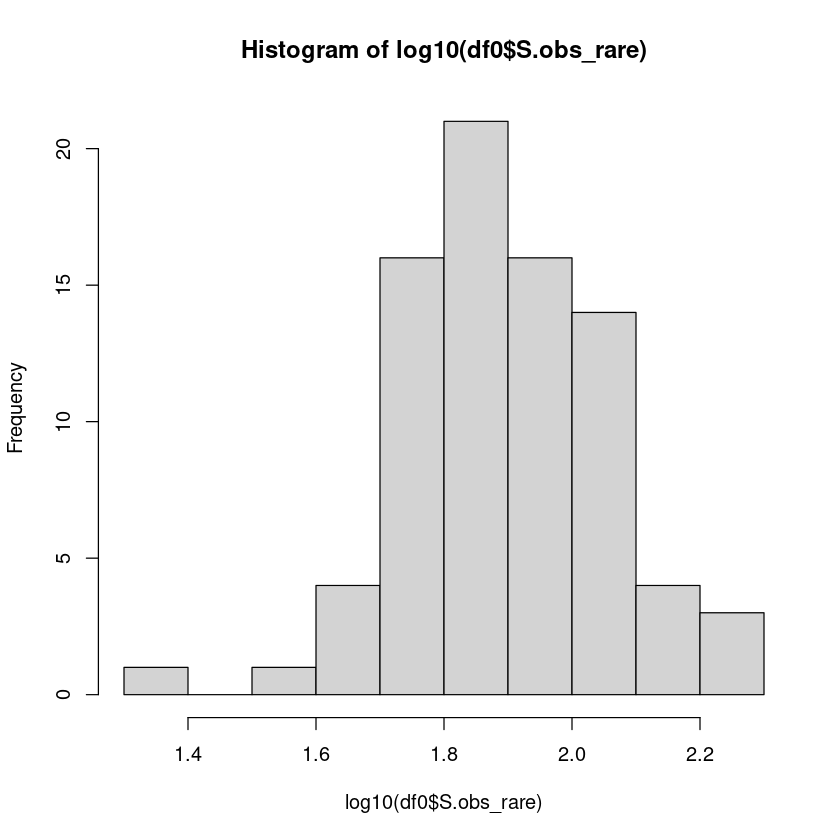

In [75]:
hist(log10(df0$S.obs_rare))

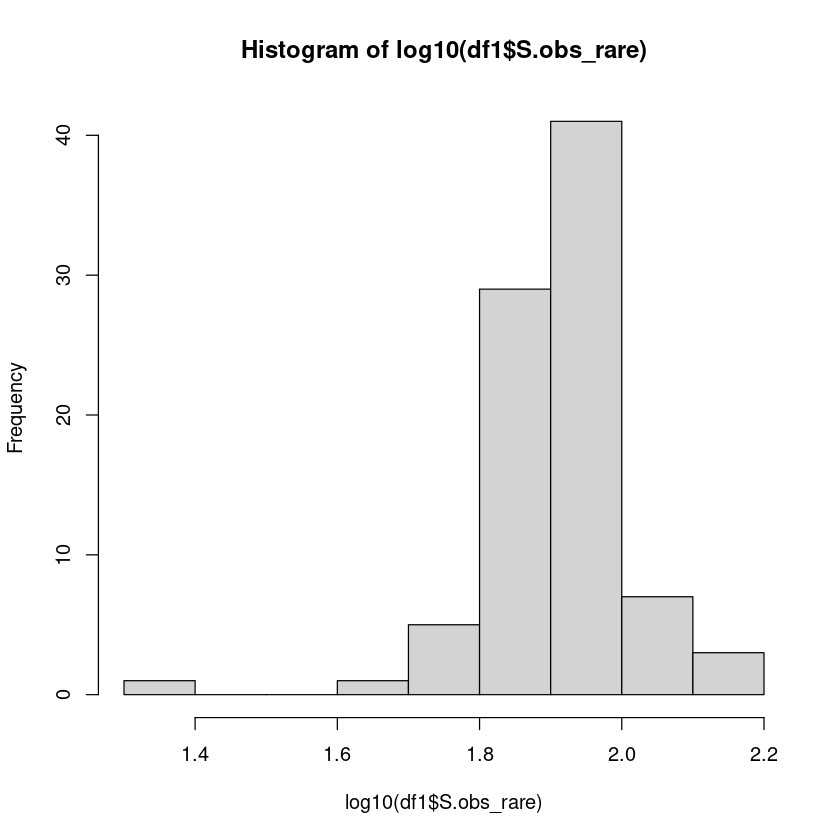

In [76]:
hist(log10(df1$S.obs_rare))

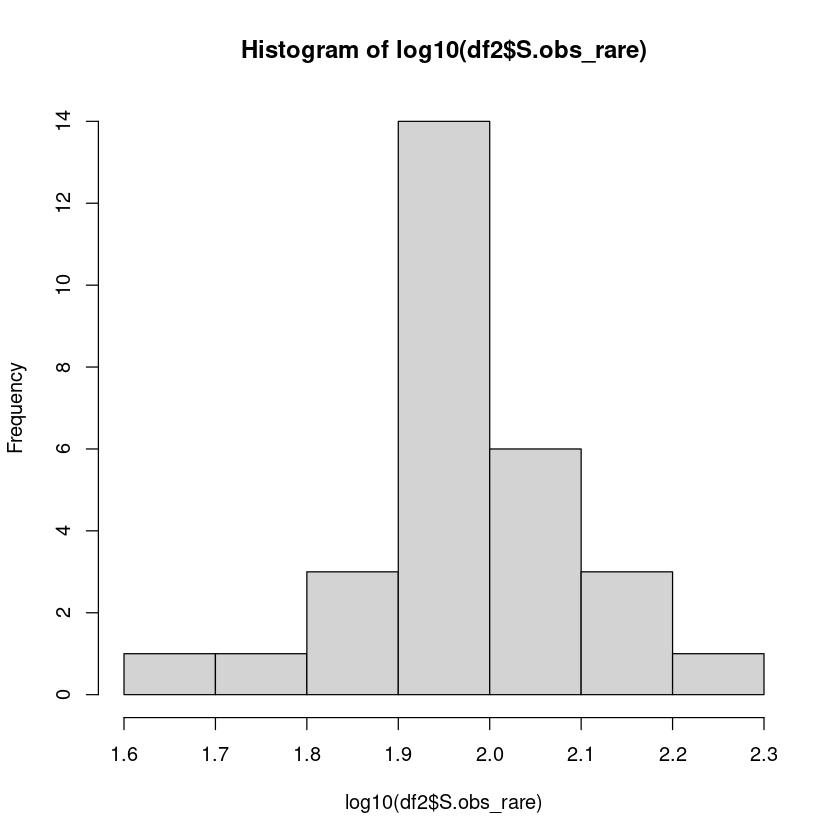

In [77]:
hist(log10(df2$S.obs_rare))

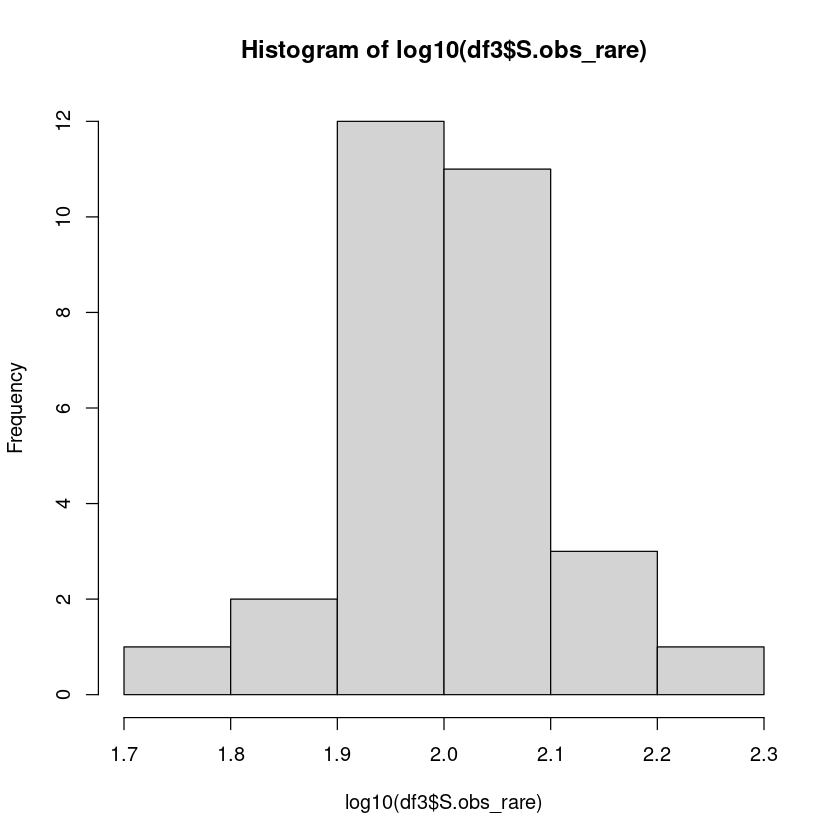

In [78]:
hist(log10(df3$S.obs_rare))

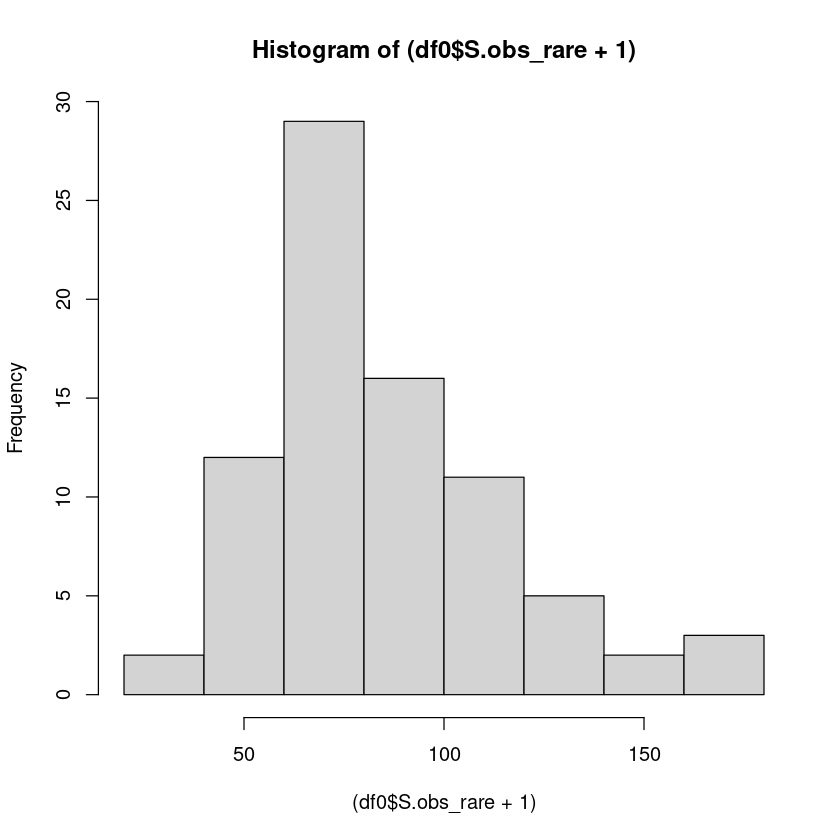

In [79]:
hist((df0$S.obs_rare+1))

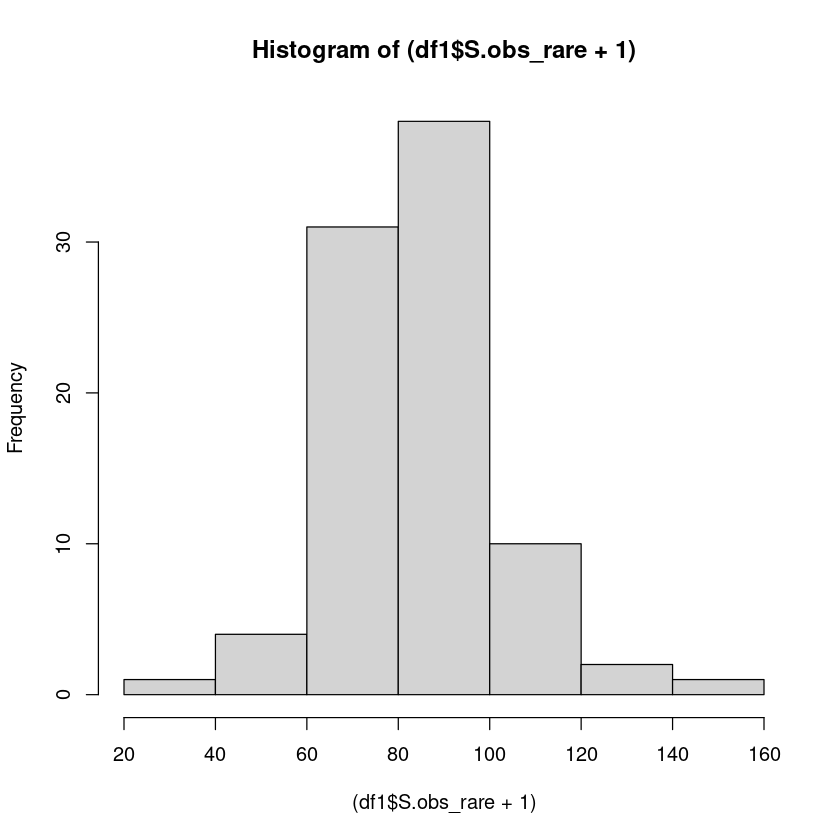

In [80]:
hist((df1$S.obs_rare+1))

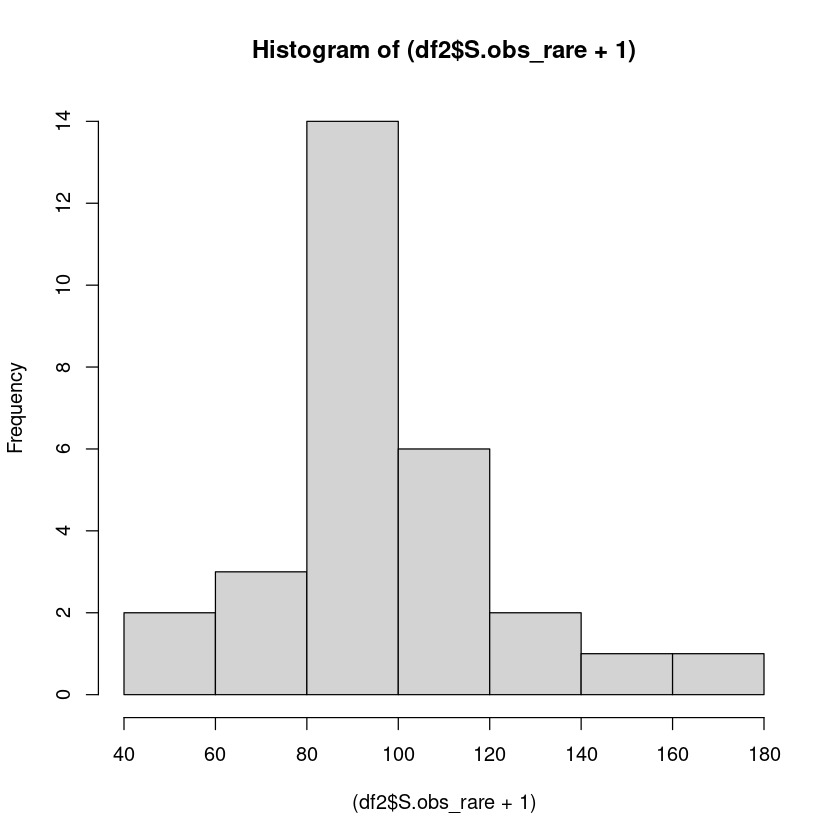

In [81]:
hist((df2$S.obs_rare+1))

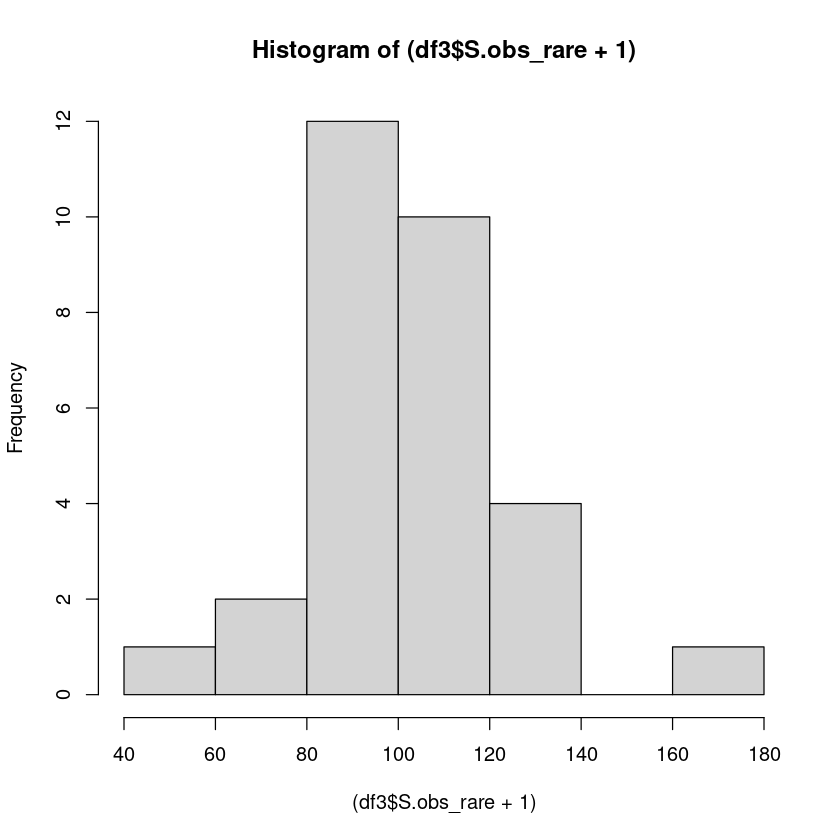

In [82]:
hist((df3$S.obs_rare+1))

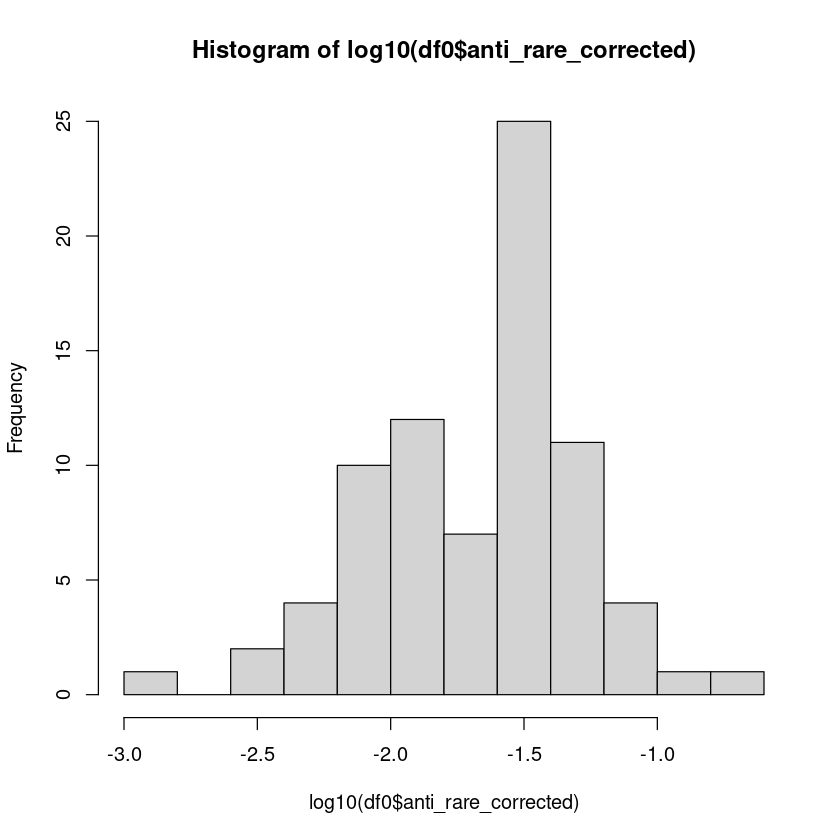

In [83]:
hist(log10(df0$anti_rare_corrected))

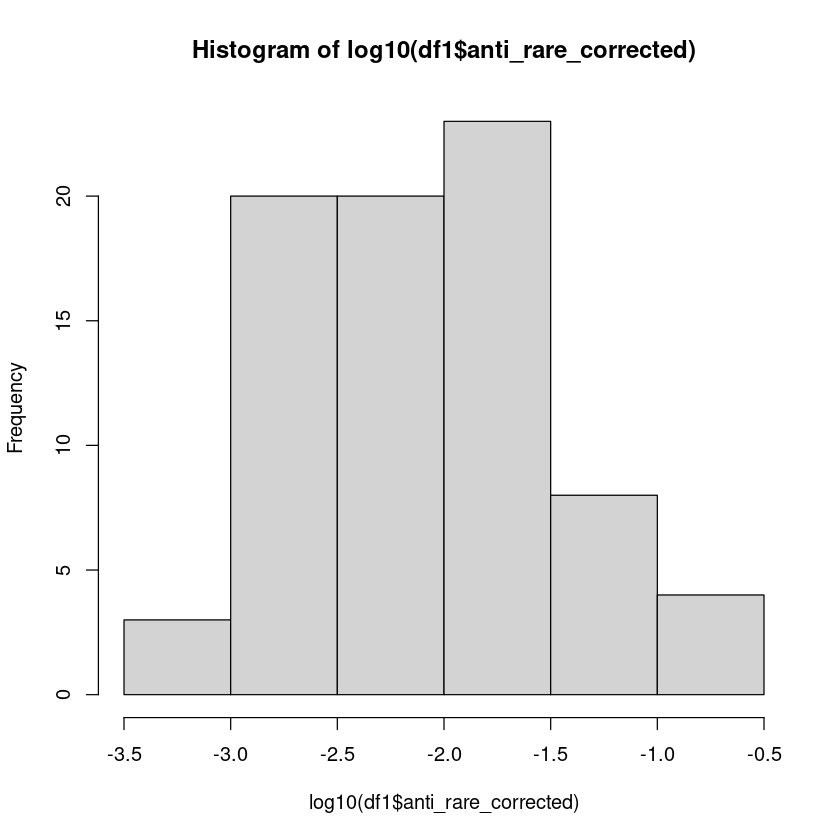

In [84]:
hist(log10(df1$anti_rare_corrected))

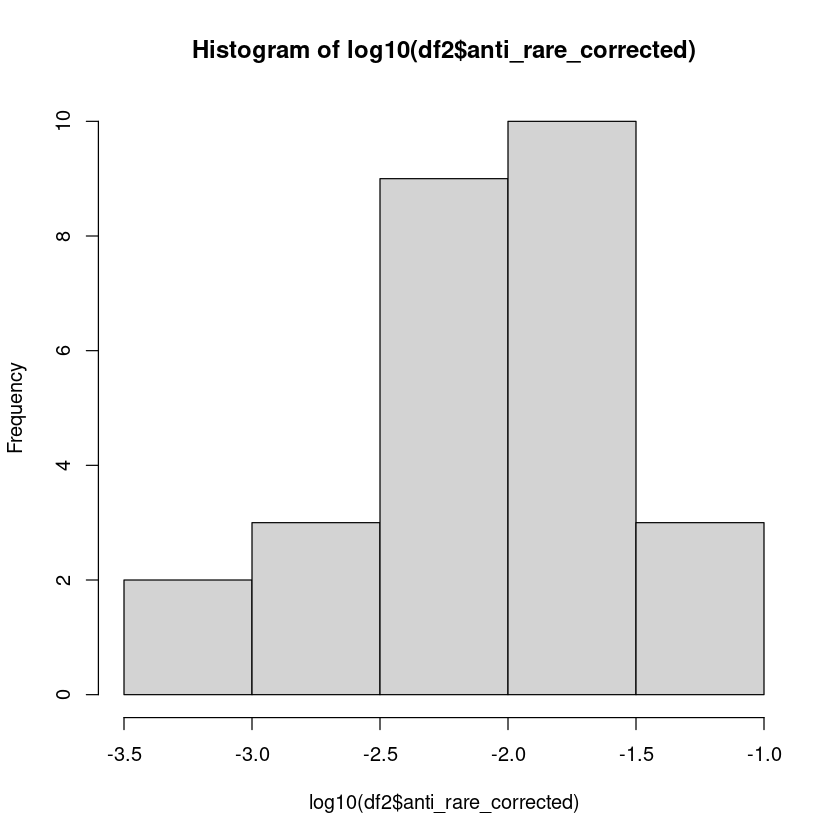

In [85]:
hist(log10(df2$anti_rare_corrected))

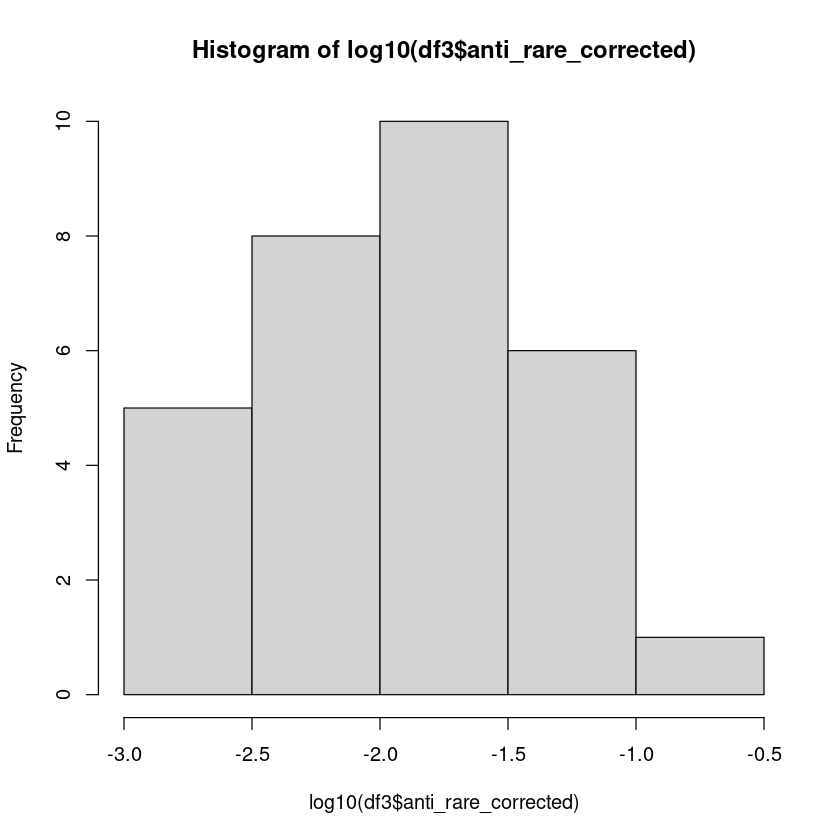

In [86]:
hist(log10(df3$anti_rare_corrected))

In [87]:
#Shapiro-Wilk normality test to see if data is noramlly distributed

In [88]:
shapiro.test(log10(df0$S.obs_rare)) 


	Shapiro-Wilk normality test

data:  log10(df0$S.obs_rare)
W = 0.9845, p-value = 0.4462


In [89]:
shapiro.test(log10(df1$S.obs_rare)) 


	Shapiro-Wilk normality test

data:  log10(df1$S.obs_rare)
W = 0.87457, p-value = 5.009e-07


In [90]:
shapiro.test(log10(df2$S.obs_rare)) 


	Shapiro-Wilk normality test

data:  log10(df2$S.obs_rare)
W = 0.94106, p-value = 0.1069


In [91]:
shapiro.test(log10(df3$S.obs_rare)) 


	Shapiro-Wilk normality test

data:  log10(df3$S.obs_rare)
W = 0.96771, p-value = 0.4786


In [92]:
shapiro.test((df0$S.obs_rare))


	Shapiro-Wilk normality test

data:  (df0$S.obs_rare)
W = 0.93545, p-value = 0.0005536


In [93]:
shapiro.test((df1$S.obs_rare))


	Shapiro-Wilk normality test

data:  (df1$S.obs_rare)
W = 0.95404, p-value = 0.003669


In [94]:
shapiro.test((df2$S.obs_rare))


	Shapiro-Wilk normality test

data:  (df2$S.obs_rare)
W = 0.92811, p-value = 0.04915


In [95]:
shapiro.test((df3$S.obs_rare))


	Shapiro-Wilk normality test

data:  (df3$S.obs_rare)
W = 0.92973, p-value = 0.04829


In [96]:
shapiro.test(sqrt(df0$S.obs))


	Shapiro-Wilk normality test

data:  sqrt(df0$S.obs)
W = 0.97578, p-value = 0.1327


In [97]:
shapiro.test(sqrt(df1$S.obs_rare))


	Shapiro-Wilk normality test

data:  sqrt(df1$S.obs_rare)
W = 0.93981, p-value = 0.0005285


In [98]:
shapiro.test(sqrt(df2$S.obs_rare))


	Shapiro-Wilk normality test

data:  sqrt(df2$S.obs_rare)
W = 0.94816, p-value = 0.1639


In [99]:
shapiro.test(sqrt(df3$S.obs_rare))


	Shapiro-Wilk normality test

data:  sqrt(df3$S.obs_rare)
W = 0.95732, p-value = 0.2642


In [100]:
shapiro.test((df0$S.obs_rare)^(1/3))


	Shapiro-Wilk normality test

data:  (df0$S.obs_rare)^(1/3)
W = 0.9841, p-value = 0.424


In [101]:
shapiro.test((df1$S.obs_rare)^(1/3))


	Shapiro-Wilk normality test

data:  (df1$S.obs_rare)^(1/3)
W = 0.92435, p-value = 7.896e-05


In [102]:
shapiro.test((df2$S.obs_rare)^(1/3))


	Shapiro-Wilk normality test

data:  (df2$S.obs_rare)^(1/3)
W = 0.94914, p-value = 0.1739


In [103]:
shapiro.test((df3$S.obs_rare)^(1/3))


	Shapiro-Wilk normality test

data:  (df3$S.obs_rare)^(1/3)
W = 0.96284, p-value = 0.3653


In [104]:
shapiro.test((df0$anti_rare_corrected)^(1/3)) 


	Shapiro-Wilk normality test

data:  (df0$anti_rare_corrected)^(1/3)
W = 0.9764, p-value = 0.1453


In [105]:
shapiro.test((df1$anti_rare_corrected)^(1/3)) 


	Shapiro-Wilk normality test

data:  (df1$anti_rare_corrected)^(1/3)
W = 0.95915, p-value = 0.007727


In [106]:
shapiro.test((df2$anti_rare_corrected)^(1/3)) 


	Shapiro-Wilk normality test

data:  (df2$anti_rare_corrected)^(1/3)
W = 0.97858, p-value = 0.8011


In [107]:
shapiro.test((df3$anti_rare_corrected)^(1/3)) 


	Shapiro-Wilk normality test

data:  (df3$anti_rare_corrected)^(1/3)
W = 0.91997, p-value = 0.02676


In [108]:
shapiro.test(log10(df0$anti_rare_corrected)) 


	Shapiro-Wilk normality test

data:  log10(df0$anti_rare_corrected)
W = NaN, p-value = NA


In [109]:
shapiro.test(log10(df1$anti_rare_corrected)) 


	Shapiro-Wilk normality test

data:  log10(df1$anti_rare_corrected)
W = NaN, p-value = NA


In [110]:
shapiro.test(log10(df2$anti_rare_corrected)) 


	Shapiro-Wilk normality test

data:  log10(df2$anti_rare_corrected)
W = NaN, p-value = NA


In [111]:
shapiro.test(log10(df3$anti_rare_corrected)) 


	Shapiro-Wilk normality test

data:  log10(df3$anti_rare_corrected)
W = 0.98061, p-value = 0.8415


In [112]:
shapiro.test(sqrt(df0$anti_rare_corrected)) 


	Shapiro-Wilk normality test

data:  sqrt(df0$anti_rare_corrected)
W = 0.97189, p-value = 0.07492


In [113]:
shapiro.test(sqrt(df1$anti_rare_corrected)) 


	Shapiro-Wilk normality test

data:  sqrt(df1$anti_rare_corrected)
W = 0.875, p-value = 5.203e-07


In [114]:
shapiro.test(sqrt(df2$anti_rare_corrected)) 


	Shapiro-Wilk normality test

data:  sqrt(df2$anti_rare_corrected)
W = 0.9591, p-value = 0.3123


In [115]:
shapiro.test(sqrt(df3$anti_rare_corrected)) 


	Shapiro-Wilk normality test

data:  sqrt(df3$anti_rare_corrected)
W = 0.86664, p-value = 0.001412


In [116]:
##testing for homogeneity of variance ##if p value is above 0.05, so data similar variances, but need to resolve distribution issue above first

In [117]:
leveneTest(log10(df0$S.obs_rare)~df0$TrmtTP)

Df F value  Pr(>F)   
group  4 1.292485 0.2806537
      75       NA        NA

In [118]:
leveneTest(log10(df1$S.obs_rare)~df1$TrmtTP)

Df F value  Pr(>F)   
group  4 1.069711 0.3768852
      82       NA        NA

In [119]:
leveneTest(log10(df2$S.obs_rare)~df2$TrmtTP)

Df F value   Pr(>F)   
group  4 0.3298797 0.8551128
      24        NA        NA

In [120]:
leveneTest(log10(df3$S.obs_rare)~df3$TrmtTP)

Df F value   Pr(>F)   
group  4 0.4518049 0.7701154
      25        NA        NA

In [121]:
leveneTest(log10(df0$S.obs_anti+1)~df0$TrmtTP)

Df F value  Pr(>F)    
group  4 2.090577 0.09040595
      75       NA         NA

In [122]:
leveneTest(log10(df1$S.obs_anti+1)~df1$TrmtTP)

Df F value   Pr(>F)   
group  4 0.5215893 0.7200959
      82        NA        NA

In [123]:
leveneTest(log10(df2$S.obs_anti+1)~df2$TrmtTP)

Df F value   Pr(>F)  
group  4 0.6993555 0.599959
      24        NA       NA

In [124]:
leveneTest(log10(df3$S.obs_anti+1)~df3$TrmtTP)

Df F value   Pr(>F)   
group  4 0.3228648 0.8599495
      25        NA        NA

In [125]:
leveneTest(log10(df0$anti_rare_corrected+1)~df0$TrmtTP)

Df F value  Pr(>F)  
group  4 2.880462 0.028202
      75       NA       NA

In [126]:
leveneTest(log10(df1$anti_rare_corrected+1)~df1$TrmtTP)

Df F value  Pr(>F)      
group  4 5.421561 0.0006352597
      82       NA           NA

In [127]:
leveneTest(log10(df2$anti_rare_corrected+1)~df2$TrmtTP)

Df F value  Pr(>F)   
group  4 1.153336 0.3558649
      24       NA        NA

In [128]:
leveneTest(log10(df3$anti_rare_corrected+1)~df3$TrmtTP)

Df F value  Pr(>F)   
group  4 1.977513 0.1288791
      25       NA        NA

In [129]:
str(df0$TrmtTP)

 Factor w/ 5 levels "CD0","P1D0","P2D0",..: 1 1 1 1 1 1 1 1 1 1 ...


In [130]:
str(df1$TrmtTP)

 Factor w/ 5 levels "CW1","P1W1","P2W1",..: 1 1 1 1 1 1 1 1 1 1 ...


In [131]:
str(df2$TrmtTP)

 Factor w/ 5 levels "CW2","P1W2","P2W2",..: 1 1 1 1 1 1 2 2 2 2 ...


In [132]:
str(df3$TrmtTP)

 Factor w/ 5 levels "CW3","P1W3","P2W3",..: 1 1 1 1 1 1 2 2 2 2 ...


In [133]:
### PROBIOTIC PERSISTANCE FIGURES AND ANALYSES

In [134]:
### P1 significant decline over time

In [135]:
post <- XPdfq[XPdfq$Day %in% c(8, 15, 22),]

In [136]:
P1 <- post[post$Treatment == "P1",]

In [137]:
P1lmer <- lme4::lmer(ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ Day + (1 | FrogID), data = P1)

In [138]:
summary(P1lmer)

Linear mixed model fit by REML ['lmerMod']
Formula: ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ Day + (1 | FrogID)
   Data: P1

REML criterion at convergence: 325.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.17603 -0.53901 -0.01746  0.34596  1.64237 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept) 16563    128.70  
 Residual              6512     80.69  
Number of obs: 27, groups:  FrogID, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  382.157     51.970   7.353
Day          -14.939      3.504  -4.263

Correlation of Fixed Effects:
    (Intr)
Day -0.745

In [139]:
Anova(P1lmer)

Chisq    Df Pr(>Chisq)  
Day 18.17666 1  2.013313e-05

In [140]:
fixed.P1lmer <- data.frame(fixef(P1lmer))

In [141]:
fixed.P1lmer

fixef.P1lmer.
(Intercept) 382.15745    
Day         -14.93867

In [142]:
## Similar if you subset and similar if you do a linear model (see more below)

In [143]:
P1s <- P1[P1$FrogID %in% c("F13", "F14", "F15", "F16","F17", "F18" ),]

In [144]:
P1lmer6 <- lme4::lmer(ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ Day + (1 | FrogID), data = P1s)

In [145]:
summary(P1lmer6)

Linear mixed model fit by REML ['lmerMod']
Formula: ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ Day + (1 | FrogID)
   Data: P1s

REML criterion at convergence: 167

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1927 -0.4672 -0.1515  0.4837  1.6667 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept) 9778     98.88   
 Residual             6135     78.33   
Number of obs: 15, groups:  FrogID, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)  432.004     74.849   5.772
Day          -16.053      3.697  -4.343

Correlation of Fixed Effects:
    (Intr)
Day -0.796

In [146]:
## PLOT for publication, 6 x 6 is good for export size

In [147]:
plot1F <-ggplot(data = P1, aes(x = Day, y = ASV_18_Pseudomonas_RSB5.4_ASV18_P1)) +
  geom_point()+theme_bw()+  theme_classic()+ theme(text = element_text(size = 25))+ xlab("Day") +ylab("ASV Sequence Count") + scale_x_continuous(breaks=c(8, 15, 22)) + geom_abline(intercept = fixed.P1lmer[1,1], slope = fixed.P1lmer[2,1], color = "#440154") 

options(repr.plot.width=6, repr.plot.height=6)

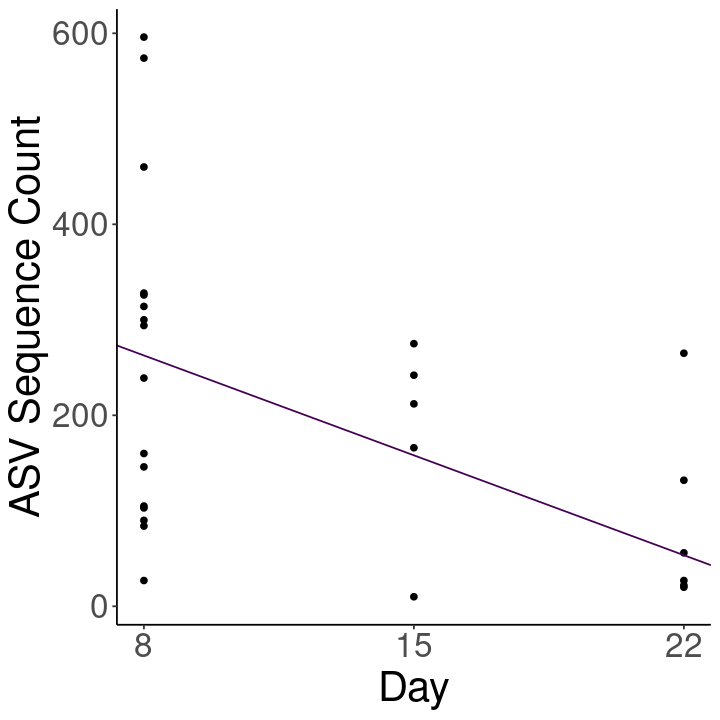

In [148]:
plot1F

In [149]:
## Need to put equation on the plot in powerpoint = y = mx + b, P = X

In [150]:
fixed.P1lmer

fixef.P1lmer.
(Intercept) 382.15745    
Day         -14.93867

In [151]:
Anova(P1lmer)

Chisq    Df Pr(>Chisq)  
Day 18.17666 1  2.013313e-05

In [152]:
## y = -14.9x + 382.2, p < 0.001

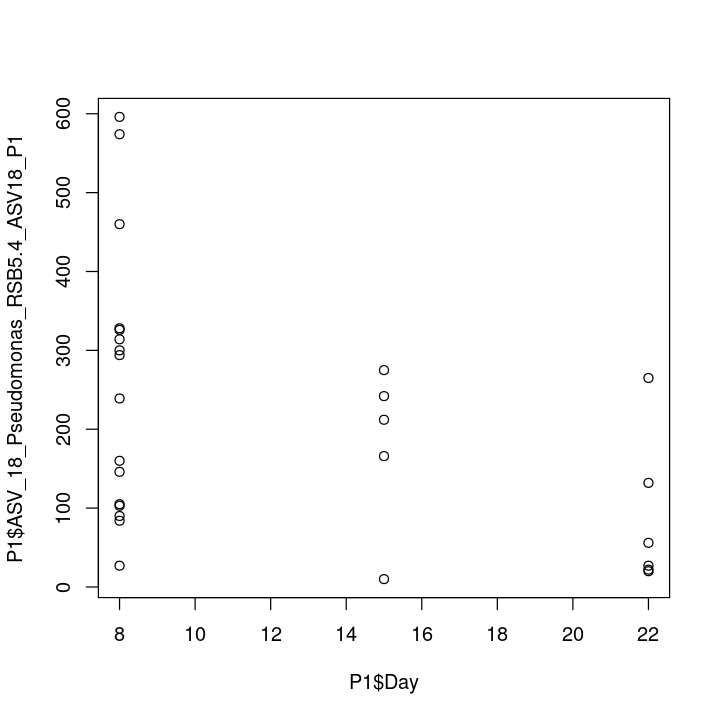

In [153]:
plot1 <- plot(P1$ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ P1$Day)

In [154]:
lm1 <- lm(P1$ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ P1$Day)

In [155]:
summary(lm1)


Call:
lm(formula = P1$ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ P1$Day)

Residuals:
    Min      1Q  Median      3Q     Max 
-233.09 -107.09   -8.83   66.54  335.91 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   357.53      67.31   5.312 1.67e-05 ***
P1$Day        -12.18       4.92  -2.475   0.0204 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 147.3 on 25 degrees of freedom
Multiple R-squared:  0.1969,	Adjusted R-squared:  0.1647 
F-statistic: 6.128 on 1 and 25 DF,  p-value: 0.02044


In [156]:
coeff1=coefficients(lm1)

In [157]:
# equation of the line : 

In [158]:
eq1 = paste0("y = ", round(coeff1[2],1), "x + ", round(coeff1[1],1))

In [159]:
# plot

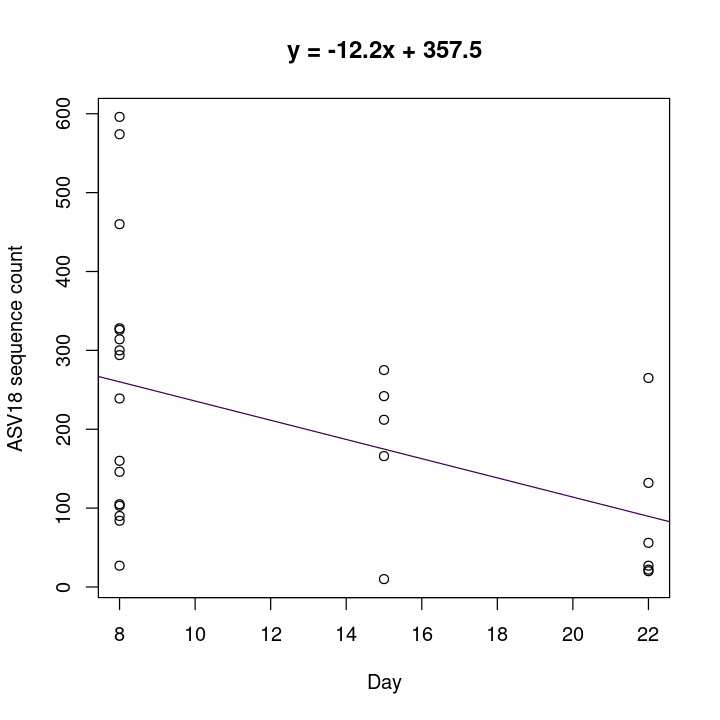

In [160]:
plot(P1$ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ P1$Day, main=eq1, xlab = "Day", ylab = "ASV18 sequence count")
    abline(lm1, col ="#440154")

In [161]:
## 6 x 6 is good for export size - this plots LM, but we should do with random effect as above

In [162]:
plot1p1b <-  ggplot(data = P1, aes(x = Day, y = ASV_18_Pseudomonas_RSB5.4_ASV18_P1)) +theme_bw()+  theme_classic()+ theme(text = element_text(size = 25))+ xlab("Day") +ylab("ASV Sequence Count") + scale_x_continuous(breaks=c(8, 15, 22)) + stat_poly_line(se = F, color = "#440154") +stat_poly_eq(use_label(c("eq", "p")), label.x = "right", size = 9) +
  geom_point()

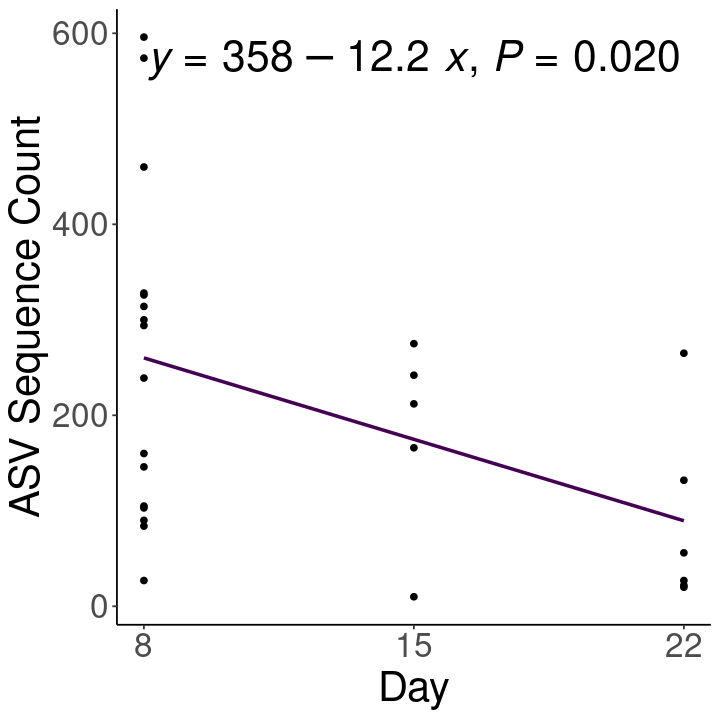

In [163]:
plot1p1b

In [164]:
## P2 NOT significant decline over time

In [165]:
P2 <- post[post$Treatment == "P2",]

In [166]:
## USE THIS ONE & REPORT FOR PAPER - with random effects - FINAL, 6 x 6 export is good

In [167]:
P2lmer <- lme4::lmer(ASV_9_Stenotrophomonas_THA2.2_P2 ~ Day + (1 | FrogID), data = P2)
summary(P2lmer)

Linear mixed model fit by REML ['lmerMod']
Formula: ASV_9_Stenotrophomonas_THA2.2_P2 ~ Day + (1 | FrogID)
   Data: P2

REML criterion at convergence: 380.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1091 -0.5292 -0.2559  0.2385  3.2021 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept) 17271    131.4   
 Residual             39376    198.4   
Number of obs: 29, groups:  FrogID, 17

Fixed effects:
            Estimate Std. Error t value
(Intercept)  223.765     96.387   2.322
Day           -3.404      7.119  -0.478

Correlation of Fixed Effects:
    (Intr)
Day -0.852

In [168]:
Anova(P2lmer)

Chisq     Df Pr(>Chisq)
Day 0.2286625 1  0.6325173

In [169]:
fixed.P2lmer <- data.frame(fixef(P2lmer))

In [170]:
fixed.P2lmer

fixef.P2lmer.
(Intercept) 223.764870   
Day          -3.404394

In [171]:
## PLOT for publication, 6 x 6 is good for export size

In [172]:
plot2F <-ggplot(data = P2, aes(x = Day, y = ASV_9_Stenotrophomonas_THA2.2_P2)) +
  geom_point()+theme_bw()+  theme_classic()+ theme(text = element_text(size = 25))+ xlab("Day") +ylab("") + scale_x_continuous(breaks=c(8, 15, 22)) + geom_abline(intercept = fixed.P2lmer[1,1], slope = fixed.P2lmer[2,1], color = "#277f8e") 

options(repr.plot.width=6, repr.plot.height=6)

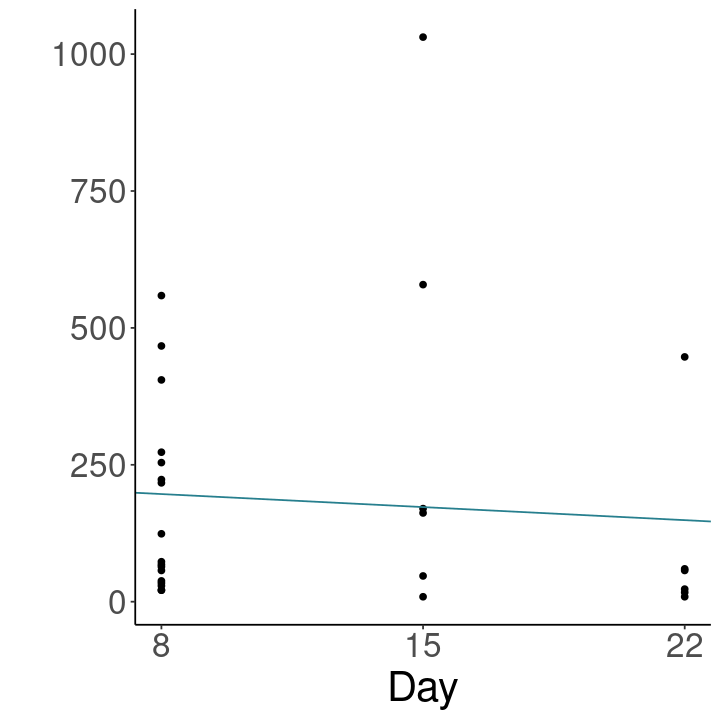

In [173]:
plot2F

In [174]:
## Need to put equation on the plot in powerpoint = y = mx + b, P = X

In [175]:
fixed.P2lmer

fixef.P2lmer.
(Intercept) 223.764870   
Day          -3.404394

In [176]:
Anova(P2lmer)

Chisq     Df Pr(>Chisq)
Day 0.2286625 1  0.6325173

In [177]:
## y = -3.4x + 223.8, p = 0.6

In [178]:
## other plots, etc

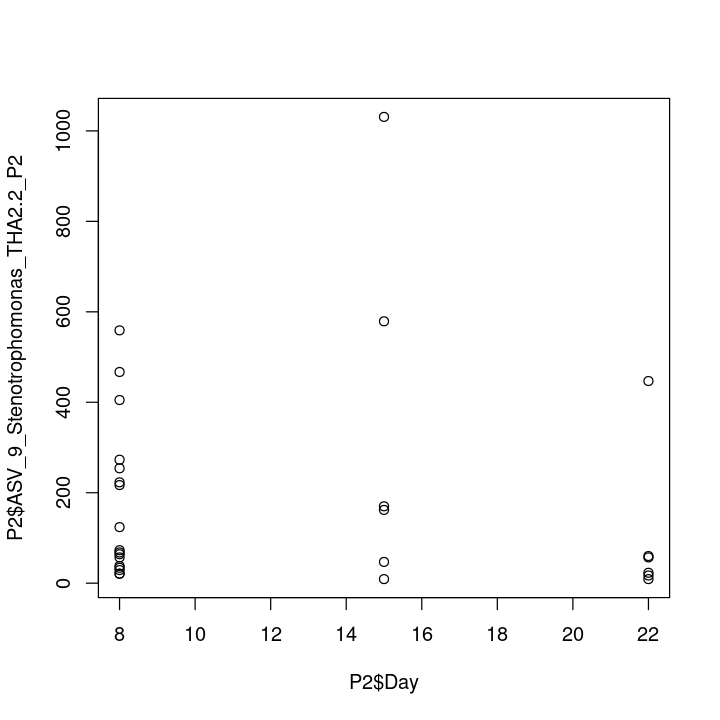

In [179]:
plot2 <- plot(P2$ASV_9_Stenotrophomonas_THA2.2_P2 ~ P2$Day)

In [180]:
lm2 <- lm(P2$ASV_9_Stenotrophomonas_THA2.2_P2 ~ P2$Day)

In [181]:
summary(lm2)


Call:
lm(formula = P2$ASV_9_Stenotrophomonas_THA2.2_P2 ~ P2$Day)

Residuals:
   Min     1Q Median     3Q    Max 
-177.7 -158.3 -118.3   56.0  844.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  210.952    107.775   1.957   0.0607 .
P2$Day        -1.619      7.941  -0.204   0.8400  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 241.2 on 27 degrees of freedom
Multiple R-squared:  0.001537,	Adjusted R-squared:  -0.03544 
F-statistic: 0.04157 on 1 and 27 DF,  p-value: 0.84


In [182]:
coeff2=coefficients(lm2)

In [183]:
# equation of the line : 

In [184]:
eq2 = paste0("y = ", round(coeff2[2],1), "x + ", round(coeff2[1],1))

In [185]:
# plot

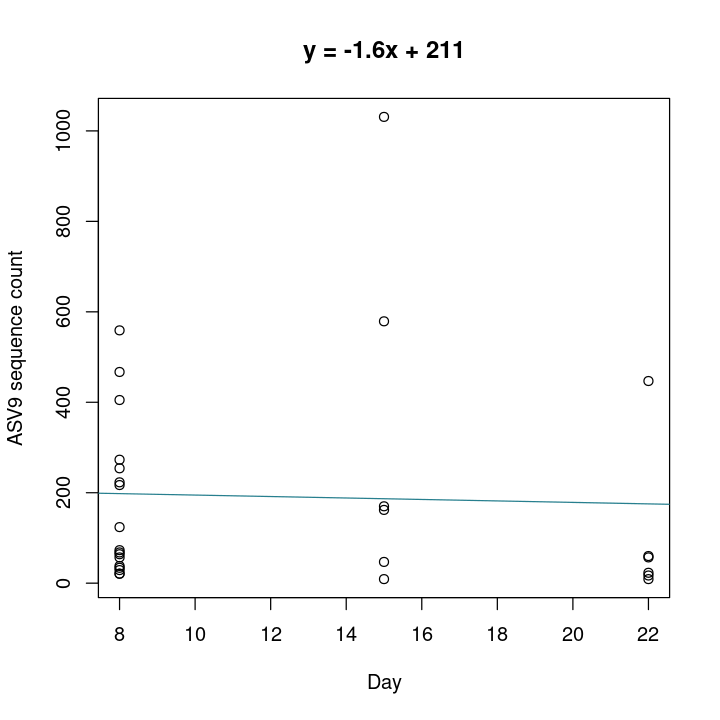

In [186]:
plot(P2$ASV_9_Stenotrophomonas_THA2.2_P2 ~ P2$Day, main=eq2, xlab = "Day", ylab = "ASV9 sequence count")
    abline(lm2, col ="#277f8e")

In [187]:
##  6 x 6 is good for export size
## Not using this plot

In [188]:
plot2 <-  ggplot(data = P2, aes(x = Day, y = ASV_9_Stenotrophomonas_THA2.2_P2)) +theme_bw()+  theme_classic()+ theme(text = element_text(size = 25))+ xlab("Day") +ylab("") + scale_x_continuous(breaks=c(8, 15, 22)) + stat_poly_line(se = F, color = "#277f8e") +stat_poly_eq(use_label(c("eq", "p")), label.x = "right", size = 9) +
  geom_point()

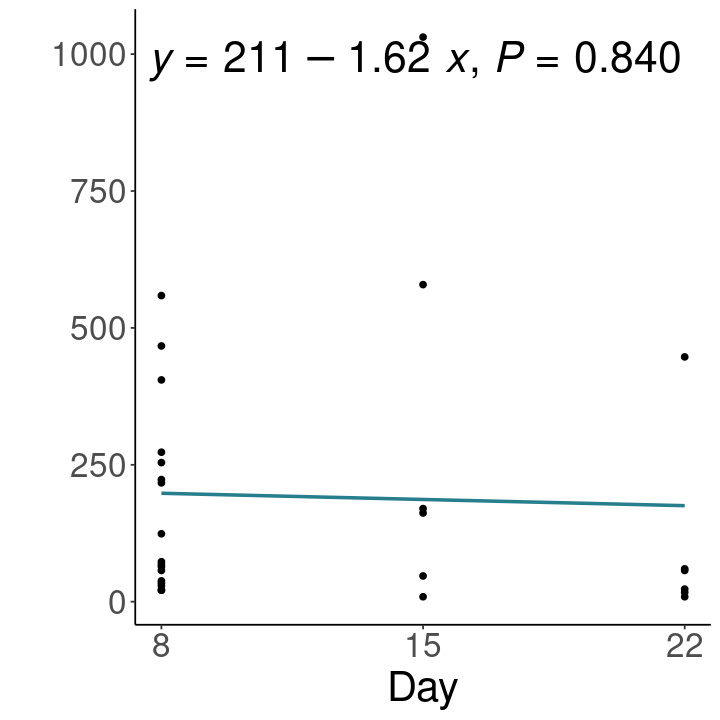

In [189]:
plot2

In [190]:
## P3 Significant decline over time

In [191]:
P3 <- post[post$Treatment == "P3",]

In [192]:
## USE THIS ONE & REPORT FOR PAPER - with random effects - FINAL, 6 x 6 export is good

In [193]:
P3lmer <- lme4::lmer(ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~ Day + (1 | FrogID), data = P3)

In [194]:
summary(P3lmer)

Linear mixed model fit by REML ['lmerMod']
Formula: ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~ Day + (1 | FrogID)
   Data: P3

REML criterion at convergence: 383.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.73787 -0.41539  0.02943  0.46920  1.68360 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept) 42129    205.3   
 Residual             12613    112.3   
Number of obs: 30, groups:  FrogID, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  438.620     71.328   6.149
Day          -14.768      4.445  -3.322

Correlation of Fixed Effects:
    (Intr)
Day -0.661

In [195]:
Anova(P3lmer)

Chisq    Df Pr(>Chisq)  
Day 11.03736 1  0.0008929393

In [196]:
fixed.P3lmer <- data.frame(fixef(P3lmer))

In [197]:
fixed.P3lmer

fixef.P3lmer.
(Intercept) 438.61975    
Day         -14.76786

In [198]:
## PLOT for publication, 6 x 6 is good for export size

In [199]:
plot3F <-ggplot(data = P3, aes(x = Day, y = ASV_10_Pseudomonas_RSB5.11_ASV10_P3)) +
  geom_point()+theme_bw()+  theme_classic()+ theme(text = element_text(size = 25))+ xlab("Day") +ylab("") + scale_x_continuous(breaks=c(8, 15, 22)) + geom_abline(intercept = fixed.P3lmer[1,1], slope = fixed.P3lmer[2,1], color = "#95d840")

options(repr.plot.width=6, repr.plot.height=6)

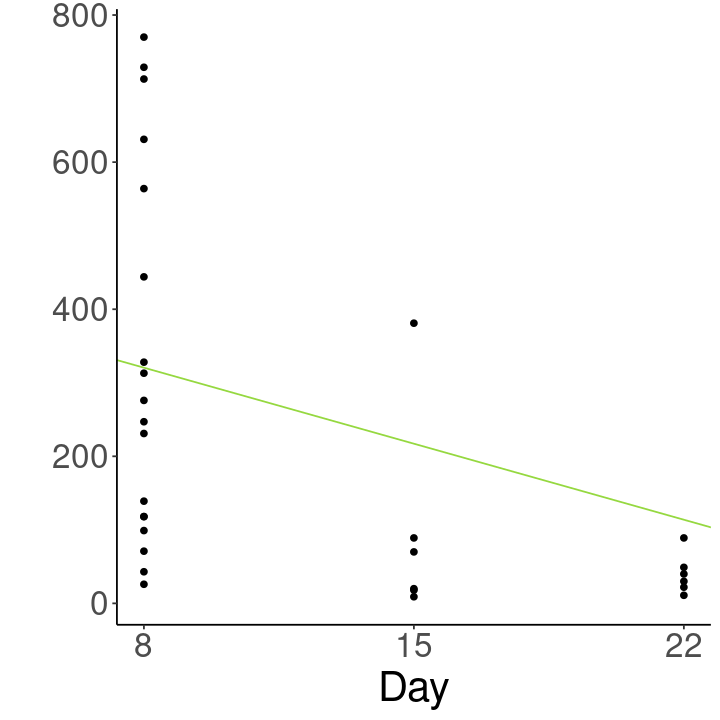

In [200]:
plot3F

In [201]:
## Need to put equation on the plot in powerpoint = y = mx + b, P = X

In [202]:
fixed.P3lmer

fixef.P3lmer.
(Intercept) 438.61975    
Day         -14.76786

In [203]:
Anova(P3lmer)

Chisq    Df Pr(>Chisq)  
Day 11.03736 1  0.0008929393

In [204]:
## y = -14.8x + 438.6, p = < 0.001

In [205]:
## other plots, etc

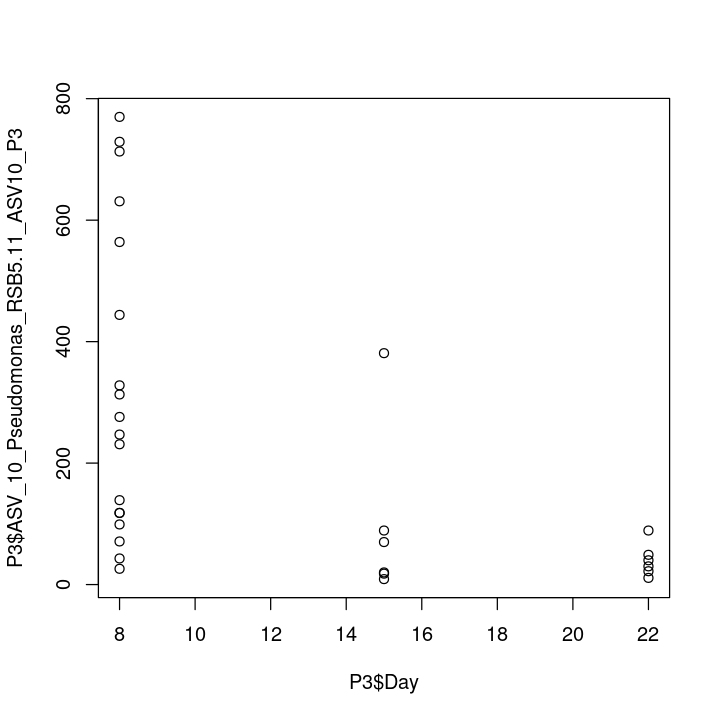

In [206]:
plot3 <- plot(P3$ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~ P3$Day)

In [207]:
lm3 <- lm(P3$ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~ P3$Day)

In [208]:
summary(lm3)


Call:
lm(formula = P3$ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~ P3$Day)

Residuals:
    Min      1Q  Median      3Q     Max 
-288.93 -150.35  -20.43   70.72  455.07 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  490.153     91.975   5.329 1.13e-05 ***
P3$Day       -21.903      6.852  -3.197  0.00343 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 210.2 on 28 degrees of freedom
Multiple R-squared:  0.2674,	Adjusted R-squared:  0.2412 
F-statistic: 10.22 on 1 and 28 DF,  p-value: 0.003433


In [209]:
coeff3=coefficients(lm3)

In [210]:
# equation of the line : 

In [211]:
eq3 = paste0("y = ", round(coeff3[2],1), "x + ", round(coeff3[1],1))

In [212]:
# plot

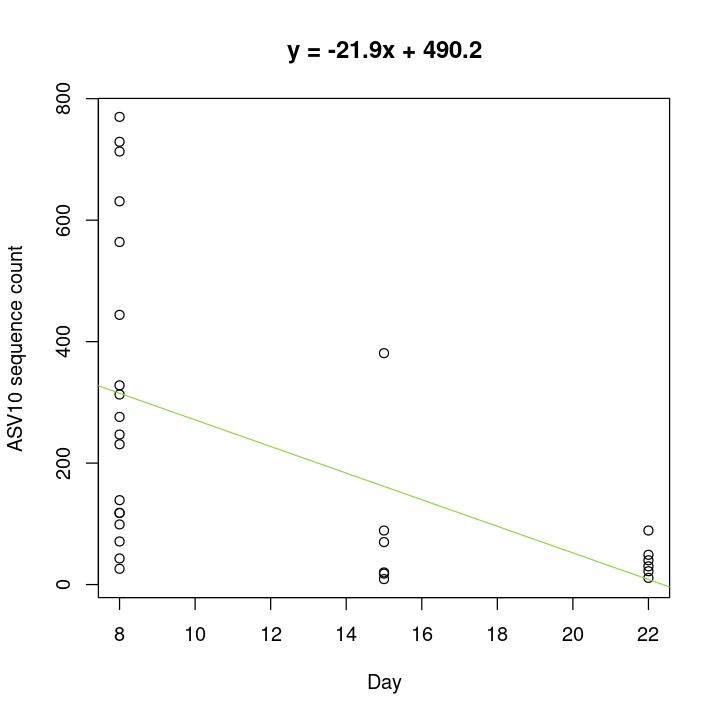

In [213]:
plot(P3$ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~ P3$Day, main=eq3, xlab = "Day", ylab = "ASV10 sequence count")
    abline(lm3, col ="#95d840")

In [214]:
## 6 x 6 seems good

In [215]:
plot3 <-  ggplot(data = P3, aes(x = Day, y = ASV_10_Pseudomonas_RSB5.11_ASV10_P3)) +theme_bw()+  theme_classic()+ theme(text = element_text(size = 25))+ xlab("Day") +ylab("") + scale_x_continuous(breaks=c(8, 15, 22)) + stat_poly_line(se = F, color = "#95d840") +stat_poly_eq(use_label(c("eq", "p")), label.x = "right", size = 9) +
  geom_point()

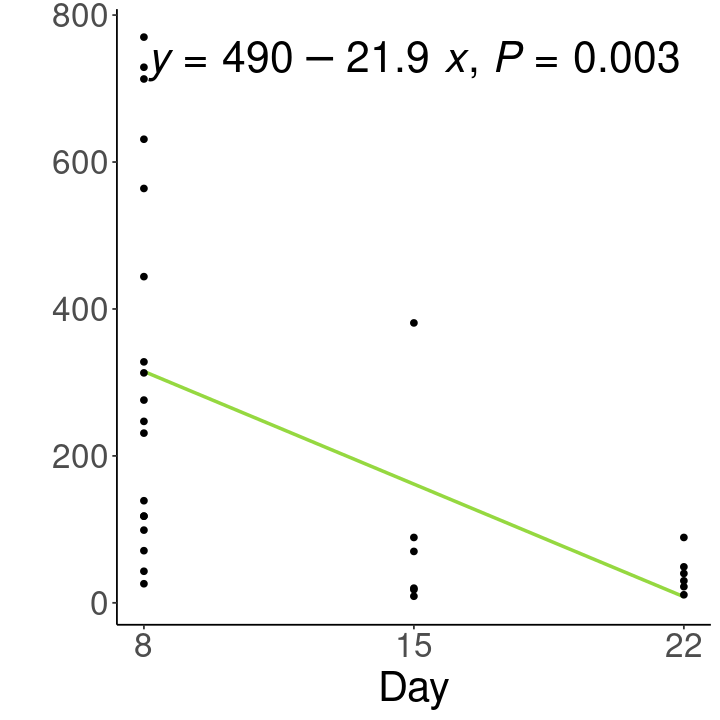

In [216]:
plot3

In [217]:
### Cocktail is different with each probiotic behaving differently than in single exposure


In [218]:
P4 <- post[post$Treatment == "P4",]

In [219]:
## Each probiotic lmer model

In [220]:
P4lmer1 <- lme4::lmer(ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ Day + (1 | FrogID), data = P4)

boundary (singular) fit: see help('isSingular')



In [221]:
## singular fit problematic, should report this in methods

In [222]:
summary(P4lmer1)

Linear mixed model fit by REML ['lmerMod']
Formula: ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ Day + (1 | FrogID)
   Data: P4

REML criterion at convergence: 288.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9797 -0.7266 -0.2277  0.2061  3.2848 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept)    0      0.00   
 Residual             1196     34.58   
Number of obs: 30, groups:  FrogID, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)   37.827     15.133   2.500
Day           -0.494      1.127  -0.438

Correlation of Fixed Effects:
    (Intr)
Day -0.909
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


In [223]:
Anova(P4lmer1)

Chisq     Df Pr(>Chisq)
Day 0.1920518 1  0.6612144

In [224]:
fixed.P4lmer1 <- data.frame(fixef(P4lmer1))

In [225]:
fixed.P4lmer1

fixef.P4lmer1.
(Intercept) 37.8273810    
Day         -0.4940476

In [226]:
### EQUATION FOR PLOT

In [227]:
## y = -0.5x + 37.8, p = 0.7

In [228]:
## P2

In [229]:
P4lmer2 <- lme4::lmer(ASV_9_Stenotrophomonas_THA2.2_P2 ~ Day + (1 | FrogID), data = P4)
summary(P4lmer2)

Linear mixed model fit by REML ['lmerMod']
Formula: ASV_9_Stenotrophomonas_THA2.2_P2 ~ Day + (1 | FrogID)
   Data: P4

REML criterion at convergence: 379.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9861 -0.6049 -0.3045  0.2990  3.0851 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept)   571.8   23.91  
 Residual             30996.2  176.06  
Number of obs: 30, groups:  FrogID, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  301.028     77.393   3.890
Day          -11.776      5.775  -2.039

Correlation of Fixed Effects:
    (Intr)
Day -0.906

In [230]:
Anova(P4lmer2)

Chisq    Df Pr(>Chisq)
Day 4.158109 1  0.04143563

In [231]:
fixed.P4lmer2 <- data.frame(fixef(P4lmer2))

In [232]:
fixed.P4lmer2


fixef.P4lmer2.
(Intercept) 301.0282      
Day         -11.7757

In [233]:
### EQUATION FOR PLOT

In [234]:
## y = -11.8x + 301, p = 0.04

In [235]:
## P3

In [236]:
P4lmer3 <- lme4::lmer(ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~ Day + (1 | FrogID), data = P4)

boundary (singular) fit: see help('isSingular')



In [237]:
## singular fit problematic, should report this in methods

In [238]:
summary(P4lmer3)

Linear mixed model fit by REML ['lmerMod']
Formula: ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~ Day + (1 | FrogID)
   Data: P4

REML criterion at convergence: 334.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.28625 -0.71761 -0.09616  0.23029  2.81926 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept)    0      0.00   
 Residual             6305     79.41   
Number of obs: 30, groups:  FrogID, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  169.838     34.752   4.887
Day           -8.088      2.589  -3.124

Correlation of Fixed Effects:
    (Intr)
Day -0.909
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


In [239]:
Anova(P4lmer3)

Chisq    Df Pr(>Chisq) 
Day 9.760178 1  0.001783327

In [240]:
fixed.P4lmer3 <- data.frame(fixef(P4lmer3))

In [241]:
fixed.P4lmer3

fixef.P4lmer3.
(Intercept) 169.837798    
Day          -8.087798

In [242]:
### EQUATION FOR PLOT

In [243]:
## y = -8.1x + 169.8, p = 0.002

In [244]:
names(P4)[43]
names(P4)[44]
names(P4)[45]

[1] "ASV_9_Stenotrophomonas_THA2.2_P2"

[1] "ASV_10_Pseudomonas_RSB5.11_ASV10_P3"

[1] "ASV_18_Pseudomonas_RSB5.4_ASV18_P1"

In [245]:
names(P4)[43] <- "ASV9 (P2)"
names(P4)[44] <- "ASV10 (P3)"
names(P4)[45] <- "ASV18 (P1)"

In [246]:
keepVars <- c("Day", "ASV18 (P1)", "ASV9 (P2)", "ASV10 (P3)")

In [247]:
merged_counts <- P4[keepVars]

In [248]:
library(reshape2)

In [249]:
merged_countsM <- melt(merged_counts, id.vars = "Day")

In [250]:
## PLOT for publication, 7.5 x 6 is good for export size

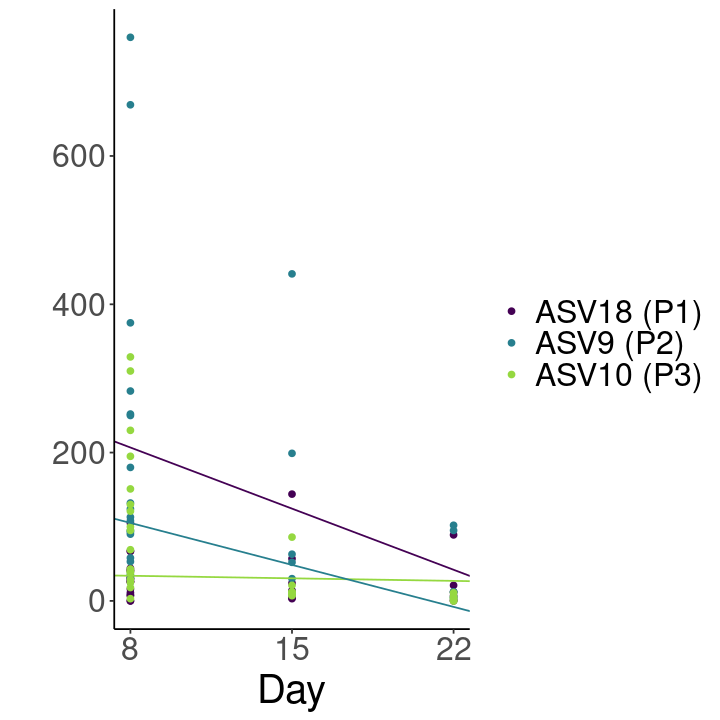

In [251]:
ggplot(data = merged_countsM, aes(x = Day, y = value, colour = variable)) +
 scale_colour_manual(name="", values=c("ASV18 (P1)" = "#440154", 'ASV9 (P2)' = "#277f8e","ASV10 (P3)" = "#95d840" ))+theme_bw()+  theme_classic()+ theme(text = element_text(size = 24))+ xlab("Day") +ylab("") + scale_x_continuous(breaks=c(8, 15, 22)) + geom_point()   +geom_abline(intercept = fixed.P4lmer1[1,1], slope = fixed.P4lmer1[2,1],color = "#95d840")+ geom_abline(intercept = fixed.P4lmer2[1,1], slope = fixed.P4lmer2[2,1],color = "#440154")+ geom_abline(intercept = fixed.P4lmer3[1,1], slope = fixed.P4lmer3[2,1],color = "#277f8e")

options(repr.plot.width=7.5, repr.plot.height=6)

In [252]:
### EQUATIONS above to put on plot

In [253]:
### Prior one, should use lmer as above, 7.5 x 6 is good for export to get equation on plot

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


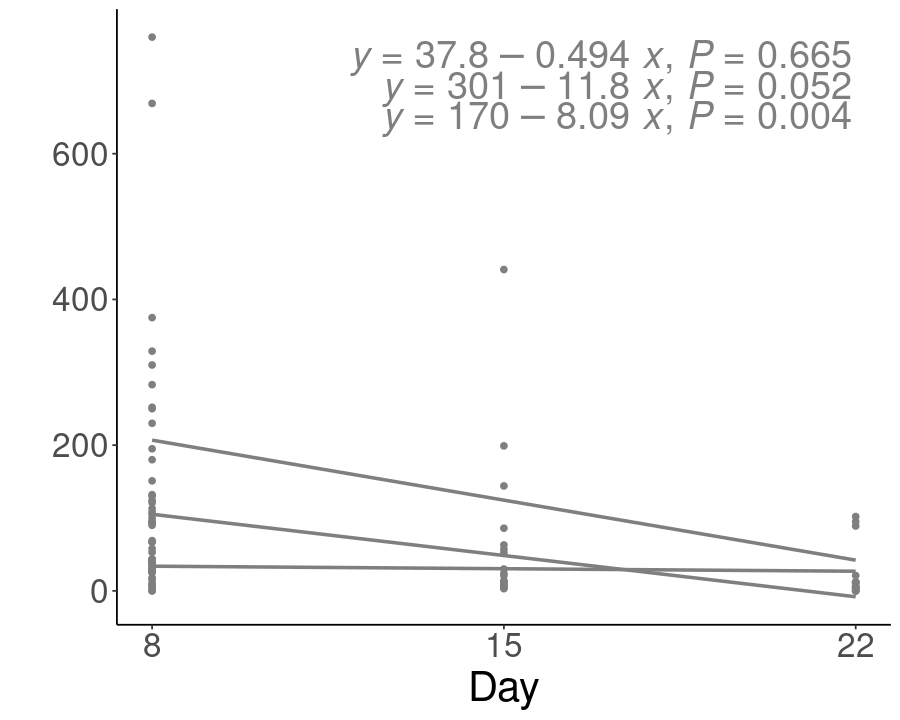

In [254]:
ggplot(data = merged_countsM, aes(x = Day, y = value, colour = variable)) +
  stat_poly_line(se = F) +
  stat_poly_eq(use_label(c("eq", "p")), label.x = "right", size = 8) +
  scale_x_continuous(breaks=c(8, 15, 22)) +
  geom_point()+ scale_colour_manual(name="", values=c("ASV10" = "#95d840", 'ASV9' = "#277f8e", "ASV18" = "#440154"))+theme_bw()+  theme_classic()+ theme(text = element_text(size = 25))+ xlab("Day") +ylab("")



In [255]:
### ALPHA DIVERSITY & ANTI-Bd BACTERIA ALPHA DIVERSITY

In [256]:
### TOTAL RICHNESS ###

In [257]:
##Species richness visualizations and preliminary stats, using rarefied data

In [258]:
aovalpha0 <- aov(S.obs_rare~TrmtTP, data=df0)

In [259]:
aovalpha1 <- aov(S.obs_rare~TrmtTP, data=df1)

In [260]:
aovalpha2 <- aov(S.obs_rare~TrmtTP, data=df2)

In [261]:
aovalpha3 <- aov(S.obs_rare~TrmtTP, data=df3)

In [262]:
summary(aovalpha0)

            Df Sum Sq Mean Sq F value Pr(>F)  
TrmtTP       4   7569  1892.1   2.094   0.09 .
Residuals   75  67778   903.7                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [263]:
summary(aovalpha1)

            Df Sum Sq Mean Sq F value Pr(>F)
TrmtTP       4   1046   261.4   0.843  0.502
Residuals   82  25442   310.3               

In [264]:
summary(aovalpha2)

            Df Sum Sq Mean Sq F value Pr(>F)
TrmtTP       4   2708   677.0   1.082  0.387
Residuals   24  15013   625.5               

In [265]:
summary(aovalpha3)

            Df Sum Sq Mean Sq F value Pr(>F)
TrmtTP       4   2769   692.2   1.364  0.275
Residuals   25  12687   507.5               

In [266]:
levels(df0$TrmtTP)

[1] "CD0"  "P1D0" "P2D0" "P3D0" "P4D0"

In [267]:
levels(df1$TrmtTP)

[1] "CW1"  "P1W1" "P2W1" "P3W1" "P4W1"

In [268]:
levels(df2$TrmtTP)

[1] "CW2"  "P1W2" "P2W2" "P3W2" "P4W2"

In [269]:
levels(df3$TrmtTP)

[1] "CW3"  "P1W3" "P2W3" "P3W3" "P4W3"

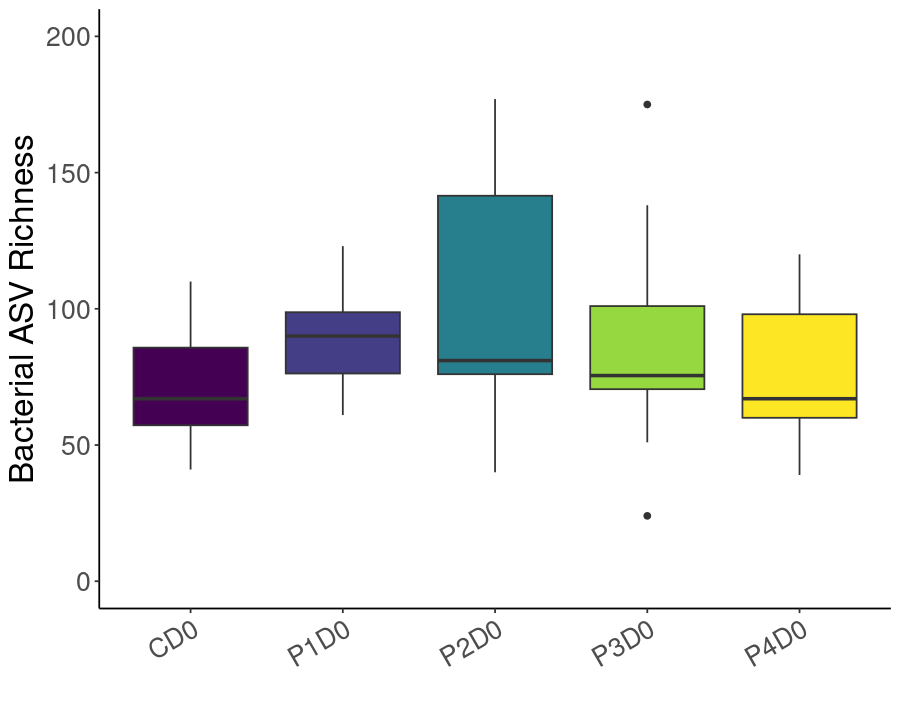

In [270]:
ggplot(data = df0, aes(x=TrmtTP, y=S.obs_rare, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Bacterial ASV Richness") + xlab("")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 200) + theme(legend.position="none")

options(repr.plot.width=6, repr.plot.height=6)

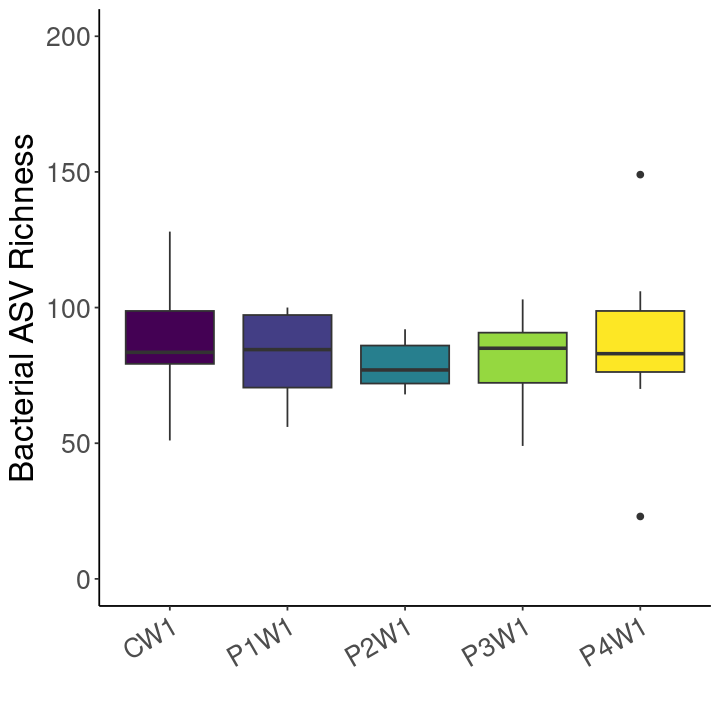

In [271]:
ggplot(data = df1, aes(x=TrmtTP, y=S.obs_rare, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Bacterial ASV Richness") + xlab("")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 200) + theme(legend.position="none")

options(repr.plot.width=6, repr.plot.height=6)

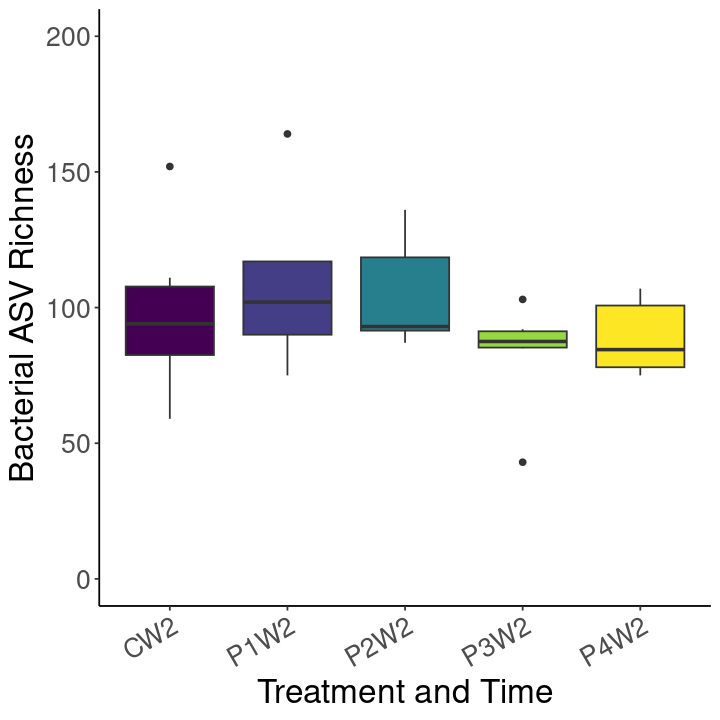

In [272]:
ggplot(data = df2, aes(x=TrmtTP, y=S.obs_rare, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Bacterial ASV Richness") + xlab("Treatment and Time")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 200) + theme(legend.position="none")

options(repr.plot.width=6, repr.plot.height=6)

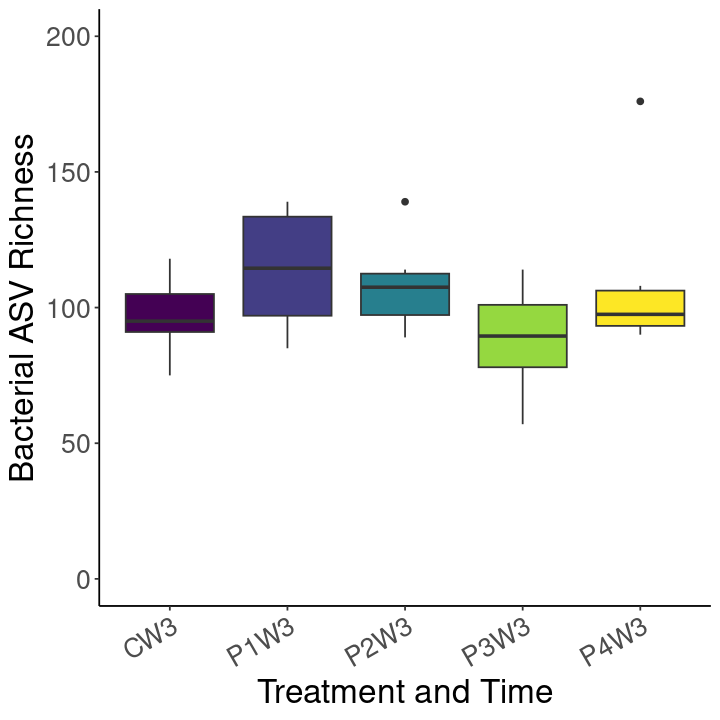

In [273]:
ggplot(data = df3, aes(x=TrmtTP, y=S.obs_rare, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Bacterial ASV Richness") + xlab("Treatment and Time")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 200) + theme(legend.position="none") 

options(repr.plot.width=6, repr.plot.height=6)

In [274]:
dfxk8$DayWeekNo <- factor(dfxk8$DayWeekNo, levels = c("D0", "W1", "W2", "W3"))

In [275]:
summary_stats <- dfxk8 %>%
  group_by(Treatment, DayWeekNo) %>%
  summarise(
    mean_S_obs_rare = mean(S.obs_rare, na.rm = TRUE),
    sd_S_obs_rare = sd(S.obs_rare, na.rm = TRUE),
    .groups = "drop")

head(summary_stats)

Treatment DayWeekNo mean_S_obs_rare sd_S_obs_rare
1 C         D0        71.75000        20.13124     
2 C         W1        89.16667        19.94183     
3 C         W2        98.33333        31.60169     
4 C         W3        96.83333        14.86495     
5 P1        D0        88.12500        19.40060     
6 P1        W1        82.06250        15.07965

In [276]:
colnames(dfxk8)
colnames(summary_stats)

[1] "Row.names.x"                         "quant_reading"                      
 [3] "Treatment"                           "FrogID"                             
 [5] "FrogNo"                              "DayWeekNo"                          
 [7] "Day"                                 "Sample.type"                        
 [9] "TrmtTP"                              "TubeLabel"                          
[11] "ExtractionDate"                      "ExtColumn"                          
[13] "ExtRow"                              "Plate"                              
[15] "PCR.Date"                            "Clean.Date"                         
[17] "Notes"                               "S.obs"                              
[19] "S.chao1"                             "se.chao1.x"                         
[21] "S.ACE"                               "se.ACE.x"                           
[23] "sample_sums.xk7."                    "Row.names.y"                        
[25] "S.obs_rare"                          "S.chao1_rare"                       
[27] "se.chao1.y"                          "S.ACE_rare"                         
[29] "se.ACE.y"                            "sample_sums.xk7Rare."               
[31] "Row.names"                           "S.obs_anti"                         
[33] "S.obs_anti_corrected_theoretical"    "S.obs_anti_corrected_actual"        
[35] "S.chao1_anti"                        "se.chao1"                           
[37] "S.ACE_anti"                          "se.ACE"                             
[39] "sample_sums.xk7Anti."                "anti_rare_ratio"                    
[41] "anti_rare_corrected"                 "richness_total_ASV_9_10_18"         
[43] "ASV_9_Stenotrophomonas_THA2.2_P2"    "ASV_10_Pseudomonas_RSB5.11_ASV10_P3"
[45] "ASV_18_Pseudomonas_RSB5.4_ASV18_P1"  "CSF1"                               
[47] "FOXP3"                               "IL10"                               
[49] "IL34"                                "TGFB"                               
[51] "TLR2"                                "TLR6"                               
[53] "TNFA"                                "qPCR"                               
[55] "SampleID"

[1] "Treatment"       "DayWeekNo"       "mean_S_obs_rare" "sd_S_obs_rare"

In [277]:
df_with_summary <- dfxk8 %>%
  left_join(summary_stats, by = c("Treatment", "DayWeekNo"))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


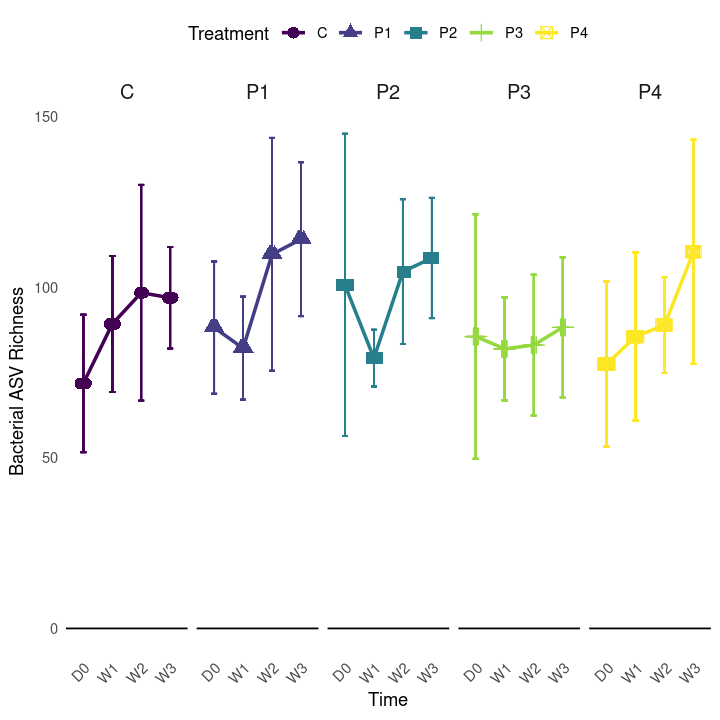

In [278]:
ggplot(df_with_summary, aes(x = DayWeekNo, y = mean_S_obs_rare, group = Treatment, color = Treatment)) +
  geom_line(aes(group = Treatment), linewidth = 1) +  
  geom_point(aes(shape = Treatment), size = 3, position = position_jitter(width = 0.1, height = 0)) +  
  geom_errorbar(
    aes(ymin = mean_S_obs_rare - sd_S_obs_rare,
        ymax = mean_S_obs_rare + sd_S_obs_rare),
    width = 0.2                                       
  ) +
  labs(
    x = "Time",  
    y = "Bacterial ASV Richness"  
  ) +
  scale_color_manual(values = c(
    "C" = "#440154",
    "P1" = "#433E85FF",
    "P2" = "#277f8e",
    "P3" = "#95d840",
    "P4" = "#FDE725FF"
  )) +  
  theme_minimal() +                                   
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1), 
    panel.grid = element_blank(),                      
    legend.position = "top",                           
    strip.text = element_text(size = 12),             
    plot.title = element_text(hjust = 0.5, size = 16)  
  ) +
  facet_wrap(~ Treatment, nrow = 1, scales = "free_x") +  
  geom_vline(xintercept = 0, color = "black", linetype = "solid", size = 0.5) +  
  geom_hline(aes(yintercept = 0), color = "black", linetype = "solid", size = 0.5)    


In [279]:
## comparing differences pre-exposure, then post exposure

In [280]:
pre <- XPdfq[XPdfq$Day == 0,]

In [281]:
post <- XPdfq[XPdfq$Day %in% c(8, 15, 22),]

In [282]:
## no treatment effect here, pre-exposure

In [283]:
preA_notransform <- aov(S.obs_rare ~ Treatment, data = pre)

In [284]:
summary(preA_notransform)

            Df Sum Sq Mean Sq F value Pr(>F)  
Treatment    4   7569  1892.1   2.094   0.09 .
Residuals   75  67778   903.7                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [285]:
preA <- aov(log10(S.obs_rare) ~ Treatment, data = pre)

In [286]:
summary(preA)

            Df Sum Sq Mean Sq F value Pr(>F)
Treatment    4 0.1507 0.03766    1.56  0.194
Residuals   75 1.8107 0.02414               

In [287]:
## Bac richness, Day effect, no treatment effect
## first examining without log10 transformation

In [288]:
postAlmer_notransform <- lme4::lmer(S.obs_rare ~ Day + Treatment + Day*Treatment + (1 | FrogID), data = post)

In [289]:
summary(postAlmer_notransform)

Linear mixed model fit by REML ['lmerMod']
Formula: S.obs_rare ~ Day + Treatment + Day * Treatment + (1 | FrogID)
   Data: post

REML criterion at convergence: 1251.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9304 -0.5251 -0.0761  0.4593  3.3505 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept)  16.58    4.072  
 Residual             384.85   19.618  
Number of obs: 146, groups:  FrogID, 18

Fixed effects:
                Estimate Std. Error t value
(Intercept)      84.3942     8.6683   9.736
Day               0.6839     0.6471   1.057
TreatmentP1     -20.7326    12.4192  -1.669
TreatmentP2     -22.1586    12.2749  -1.805
TreatmentP3      -6.3527    12.1420  -0.523
TreatmentP4     -13.2188    12.1420  -1.089
Day:TreatmentP1   1.7896     0.9159   1.954
Day:TreatmentP2   1.6267     0.9091   1.789
Day:TreatmentP3  -0.2307     0.9045  -0.255
Day:TreatmentP4   0.9688     0.9045   1.071

Correlation of Fixed Effects:
            (Intr) Day 

In [290]:
Anova(postAlmer_notransform)

Chisq     Df Pr(>Chisq)  
Day           24.244874 1  8.483254e-07
Treatment      5.060713 4  2.811245e-01
Day:Treatment  8.142549 4  8.649382e-02

In [291]:
fixed.postAlmer_notransform <- data.frame(fixef(postAlmer_notransform))

In [292]:
fixed.postAlmer_notransform

fixef.postAlmer_notransform.
(Intercept)      84.3941891                 
Day               0.6838815                 
TreatmentP1     -20.7326277                 
TreatmentP2     -22.1586227                 
TreatmentP3      -6.3526786                 
TreatmentP4     -13.2187500                 
Day:TreatmentP1   1.7896303                 
Day:TreatmentP2   1.6267096                 
Day:TreatmentP3  -0.2306548                 
Day:TreatmentP4   0.9687500

In [293]:
## now trying with log10 transform

In [294]:
postAlmer <- lme4::lmer(log10(S.obs_rare+1) ~ Day + Treatment + Day*Treatment + (1 | FrogID), data = post)

In [295]:
summary(postAlmer)

Linear mixed model fit by REML ['lmerMod']
Formula: log10(S.obs_rare + 1) ~ Day + Treatment + Day * Treatment + (1 |  
    FrogID)
   Data: post

REML criterion at convergence: -189.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.2104 -0.4227  0.0006  0.5506  2.6888 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept) 0.000335 0.01830 
 Residual             0.009689 0.09843 
Number of obs: 146, groups:  FrogID, 18

Fixed effects:
                 Estimate Std. Error t value
(Intercept)      1.919471   0.043417  44.210
Day              0.003413   0.003241   1.053
TreatmentP1     -0.089154   0.062309  -1.431
TreatmentP2     -0.094678   0.061586  -1.537
TreatmentP3     -0.026393   0.060923  -0.433
TreatmentP4     -0.072916   0.060923  -1.197
Day:TreatmentP1  0.007505   0.004596   1.633
Day:TreatmentP2  0.007096   0.004562   1.556
Day:TreatmentP3 -0.001414   0.004538  -0.312
Day:TreatmentP4  0.004817   0.004538   1.061

Correlation of Fixed Effe

In [296]:
Anova(postAlmer, test="Chisq")

Chisq     Df Pr(>Chisq)  
Day           21.071142 1  4.425428e-06
Treatment      4.255453 4  3.725366e-01
Day:Treatment  6.414423 4  1.702630e-01

In [297]:
fixed.postAlmer <- data.frame(fixef(postAlmer))

In [298]:
fixed.postAlmer

fixef.postAlmer.
(Intercept)      1.919470500    
Day              0.003412784    
TreatmentP1     -0.089153647    
TreatmentP2     -0.094678053    
TreatmentP3     -0.026393486    
TreatmentP4     -0.072916333    
Day:TreatmentP1  0.007504616    
Day:TreatmentP2  0.007096261    
Day:TreatmentP3 -0.001413968    
Day:TreatmentP4  0.004817094

In [299]:
## Slight increase in richness over time in all treatments or no detectable difference among treatments:

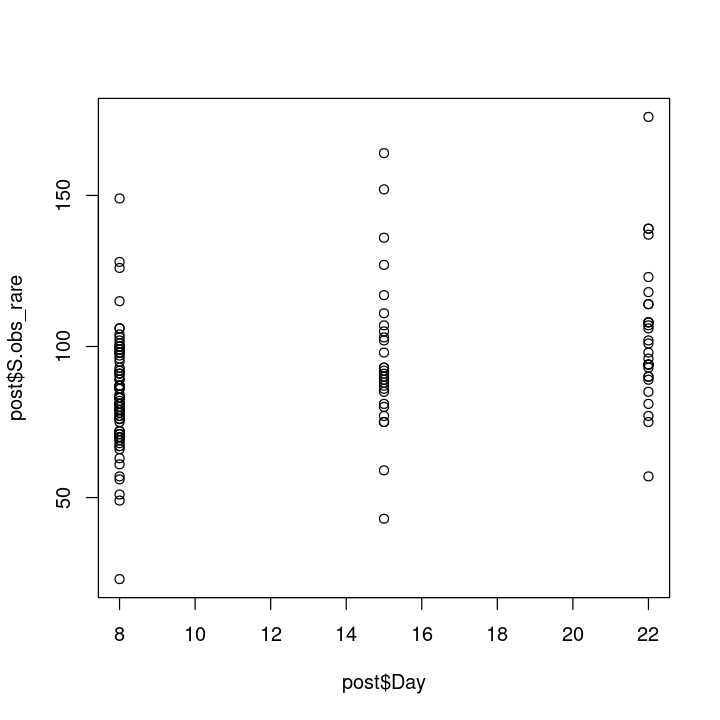

In [300]:
plot(post$S.obs_rare ~ post$Day)

In [301]:
emmeans(postAlmer, list(pairwise ~ Treatment), adjust = "tukey")

NOTE: Results may be misleading due to involvement in interactions



$`emmeans of Treatment`
 Treatment emmean     SE  df lower.CL upper.CL
 C           1.96 0.0187 103     1.92     2.00
 P1          1.96 0.0196 115     1.93     2.00
 P2          1.95 0.0191 104     1.92     1.99
 P3          1.92 0.0187 103     1.88     1.95
 P4          1.95 0.0187 103     1.91     1.98

Degrees-of-freedom method: kenward-roger 
Results are given on the log10(mu + 1) (not the response) scale. 
Confidence level used: 0.95 

$`pairwise differences of Treatment`
 1       estimate     SE  df t.ratio p.value
 C - P1  -0.00291 0.0261 122  -0.111  1.0000
 C - P2   0.00763 0.0256 122   0.297  0.9983
 C - P3   0.04374 0.0254 122   1.721  0.4251
 C - P4   0.01382 0.0254 122   0.544  0.9825
 P1 - P2  0.01053 0.0264 123   0.399  0.9946
 P1 - P3  0.04665 0.0261 122   1.784  0.3875
 P1 - P4  0.01673 0.0261 122   0.640  0.9682
 P2 - P3  0.03611 0.0256 122   1.408  0.6237
 P2 - P4  0.00620 0.0256 122   0.242  0.9992
 P3 - P4 -0.02991 0.0254 122  -1.177  0.7645

Note: contrasts are st

In [302]:
##### ALPHA DIVERSITY: ANTI-Bd RICHNESS (includes probiotics)####

In [303]:
##Species richness visualizations and preliminary stats

In [304]:
##S.obs_anti used here is richness values of the "anti-Bd community" including the probiotics
##nt = no transformation

In [305]:
modeAlpha0ab <- aov(log10(S.obs_anti+1)~TrmtTP, data=df0)

In [306]:
modeAlpha0ab_nt <- aov(S.obs_anti ~TrmtTP, data=df0)

In [307]:
modeAlpha1ab <- aov(log10(S.obs_anti+1)~TrmtTP, data=df1)

In [308]:
modeAlpha1ab_nt <- aov(S.obs_anti ~TrmtTP, data=df1)

In [309]:
modeAlpha2ab <- aov(log10(S.obs_anti+1)~TrmtTP, data=df2)

In [310]:
modeAlpha2ab_nt <- aov(S.obs_anti ~TrmtTP, data=df2)

In [311]:
modeAlpha3ab <- aov(log10(S.obs_anti+1)~TrmtTP, data=df3)

In [312]:
modeAlpha3ab_nt <- aov(S.obs_anti ~TrmtTP, data=df3)

In [313]:
summary(modeAlpha0ab)

            Df Sum Sq Mean Sq F value Pr(>F)  
TrmtTP       4  0.534 0.13352   2.761 0.0337 *
Residuals   75  3.627 0.04836                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [314]:
summary(modeAlpha0ab_nt)

            Df Sum Sq Mean Sq F value Pr(>F)  
TrmtTP       4   97.7  24.431   2.981 0.0243 *
Residuals   75  614.7   8.196                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [315]:
summary(modeAlpha1ab)

            Df Sum Sq Mean Sq F value Pr(>F)  
TrmtTP       4 0.4249 0.10622   2.963 0.0244 *
Residuals   82 2.9392 0.03584                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [316]:
summary(modeAlpha1ab_nt)

            Df Sum Sq Mean Sq F value Pr(>F)  
TrmtTP       4   64.2  16.049   2.928 0.0257 *
Residuals   82  449.5   5.481                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [317]:
summary(modeAlpha2ab)

            Df Sum Sq Mean Sq F value Pr(>F)
TrmtTP       4 0.3165 0.07912    1.62  0.202
Residuals   24 1.1719 0.04883               

In [318]:
summary(modeAlpha2ab_nt)

            Df Sum Sq Mean Sq F value Pr(>F)
TrmtTP       4  53.27  13.316   1.721  0.178
Residuals   24 185.70   7.738               

In [319]:
summary(modeAlpha3ab)

            Df Sum Sq Mean Sq F value Pr(>F)
TrmtTP       4 0.1589 0.03972   1.469  0.241
Residuals   25 0.6761 0.02704               

In [320]:
summary(modeAlpha3ab_nt)

            Df Sum Sq Mean Sq F value Pr(>F)
TrmtTP       4  36.13   9.033     1.4  0.263
Residuals   25 161.33   6.453               

In [321]:
TukeyHSD(modeAlpha0ab, conf.level=.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log10(S.obs_anti + 1) ~ TrmtTP, data = df0)

$TrmtTP
                 diff         lwr         upr     p adj
P1D0-CD0   0.17941853 -0.03791097  0.39674803 0.1539006
P2D0-CD0   0.09199760 -0.12892436  0.31291957 0.7716355
P3D0-CD0  -0.05930297 -0.27663247  0.15802653 0.9404064
P4D0-CD0   0.07810361 -0.13600602  0.29221324 0.8455399
P2D0-P1D0 -0.08742092 -0.30834289  0.13350104 0.8028164
P3D0-P1D0 -0.23872150 -0.45605100 -0.02139199 0.0241041
P4D0-P1D0 -0.10131492 -0.31542454  0.11279471 0.6780652
P3D0-P2D0 -0.15130057 -0.37222254  0.06962140 0.3188283
P4D0-P2D0 -0.01389399 -0.23164921  0.20386123 0.9997683
P4D0-P3D0  0.13740658 -0.07670305  0.35151621 0.3847834


In [322]:
TukeyHSD(modeAlpha0ab_nt, conf.level=.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = S.obs_anti ~ TrmtTP, data = df0)

$TrmtTP
                 diff        lwr         upr     p adj
P1D0-CD0   2.62500000 -0.2042035  5.45420347 0.0818451
P2D0-CD0   1.67500000 -1.2009703  4.55097033 0.4845461
P3D0-CD0  -0.25000000 -3.0792035  2.57920347 0.9991597
P4D0-CD0   1.75735294 -1.0299341  4.54463996 0.4030289
P2D0-P1D0 -0.95000000 -3.8259703  1.92597033 0.8870125
P3D0-P1D0 -2.87500000 -5.7042035 -0.04579653 0.0445435
P4D0-P1D0 -0.86764706 -3.6549341  1.91963996 0.9069260
P3D0-P2D0 -1.92500000 -4.8009703  0.95097033 0.3418337
P4D0-P2D0  0.08235294 -2.7523926  2.91709844 0.9999899
P4D0-P3D0  2.00735294 -0.7799341  4.79463996 0.2698822


In [323]:
TukeyHSD(modeAlpha1ab, conf.level=.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log10(S.obs_anti + 1) ~ TrmtTP, data = df1)

$TrmtTP
                 diff          lwr        upr     p adj
P1W1-CW1  -0.05554539 -0.236998807 0.12590803 0.9126491
P2W1-CW1  -0.15195052 -0.330556189 0.02665516 0.1331801
P3W1-CW1  -0.11569227 -0.291727944 0.06034340 0.3618579
P4W1-CW1   0.03462496 -0.141410714 0.21066063 0.9818143
P2W1-P1W1 -0.09640513 -0.280352869 0.08754261 0.5898894
P3W1-P1W1 -0.06014688 -0.241600302 0.12130654 0.8865905
P4W1-P1W1  0.09017035 -0.091283072 0.27162377 0.6382056
P3W1-P2W1  0.03625825 -0.142347429 0.21486392 0.9795562
P4W1-P2W1  0.18657548  0.007969802 0.36518115 0.0361442
P4W1-P3W1  0.15031723 -0.025718444 0.32635290 0.1306927


In [324]:
TukeyHSD(modeAlpha1ab_nt, conf.level=.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = S.obs_anti ~ TrmtTP, data = df1)

$TrmtTP
                diff         lwr       upr     p adj
P1W1-CW1  -0.6944444 -2.93828619 1.5493973 0.9094051
P2W1-CW1  -1.9738562 -4.18248291 0.2347705 0.1022315
P3W1-CW1  -1.5555556 -3.73240180 0.6212907 0.2784614
P4W1-CW1   0.2222222 -1.95462402 2.3990685 0.9985332
P2W1-P1W1 -1.2794118 -3.55409815 0.9952746 0.5214021
P3W1-P1W1 -0.8611111 -3.10495286 1.3827306 0.8210742
P4W1-P1W1  0.9166667 -1.32717508 3.1605084 0.7850787
P3W1-P2W1  0.4183007 -1.79032605 2.6269274 0.9842028
P4W1-P2W1  2.1960784 -0.01254827 4.4047051 0.0520572
P4W1-P3W1  1.7777778 -0.39906847 3.9546240 0.1625577


In [325]:
#the beelow figures are of the richness of anti-bd bacteria, with the actual probiotic richness observed per frog removed (corrected, actual)

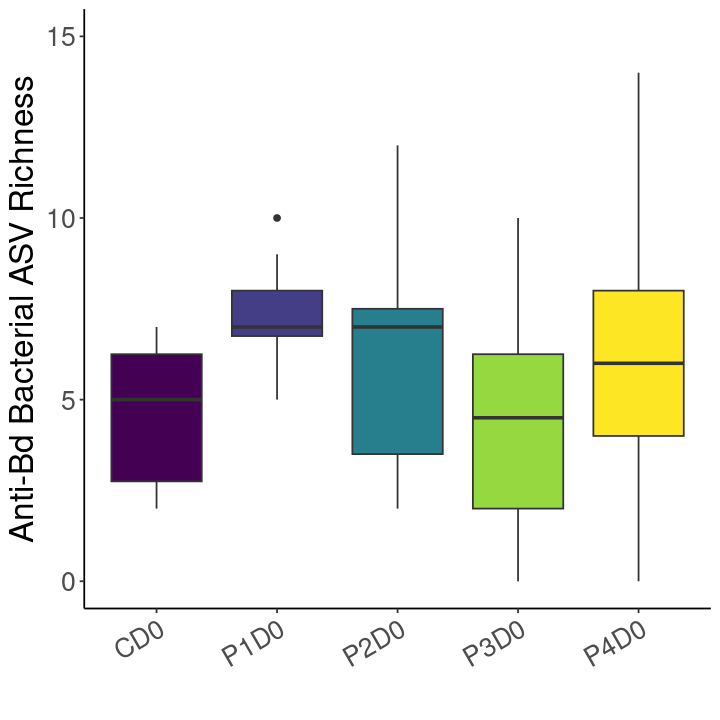

In [326]:
ggplot(data = df0, aes(x=TrmtTP, y=S.obs_anti_corrected_actual, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Anti-Bd Bacterial ASV Richness") + xlab("")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 15) + theme(legend.position="none")

options(repr.plot.width=6, repr.plot.height=6)

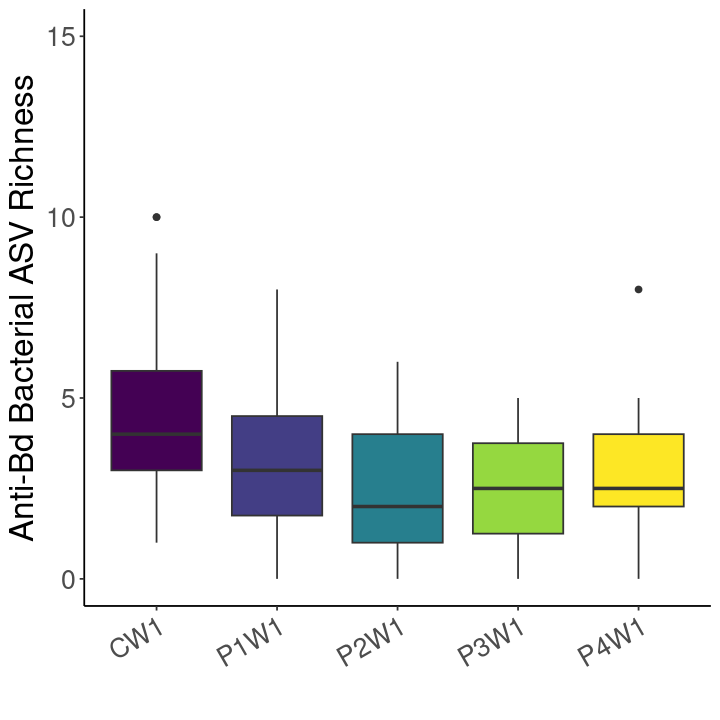

In [327]:
ggplot(data = df1, aes(x=TrmtTP, y=S.obs_anti_corrected_actual, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Anti-Bd Bacterial ASV Richness") + xlab("")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 15) + theme(legend.position="none")

options(repr.plot.width=6, repr.plot.height=6)

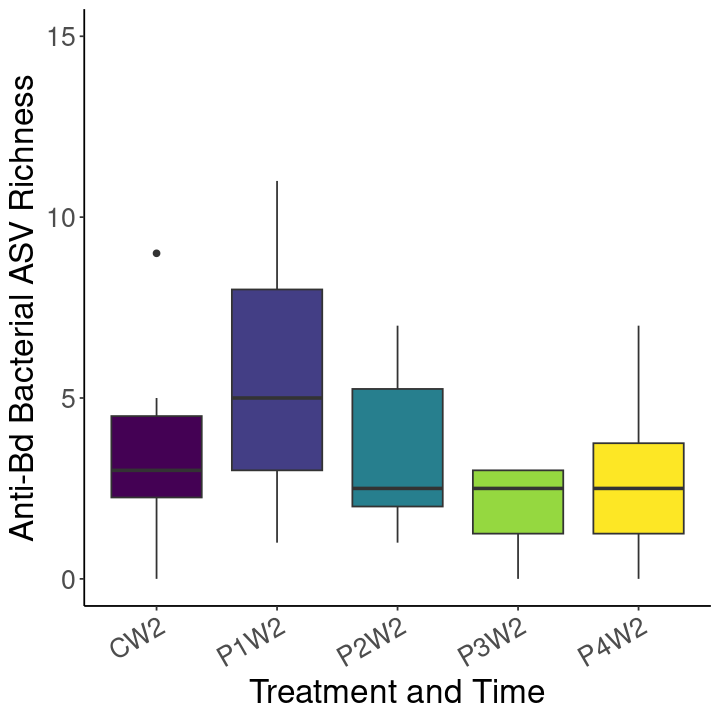

In [328]:
ggplot(data = df2, aes(x=TrmtTP, y=S.obs_anti_corrected_actual, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Anti-Bd Bacterial ASV Richness") + xlab("Treatment and Time")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 15) + theme(legend.position="none")

options(repr.plot.width=6, repr.plot.height=6)

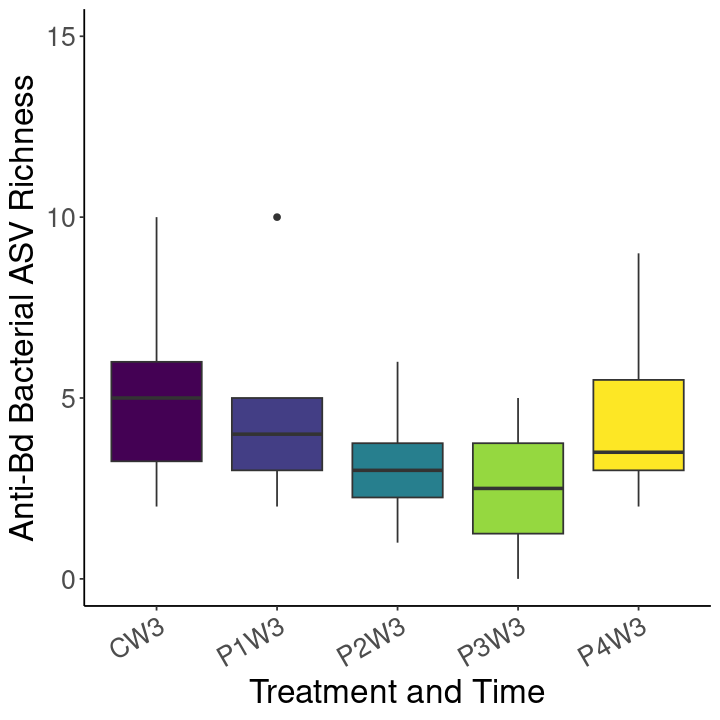

In [329]:
ggplot(data = df3, aes(x=TrmtTP, y=S.obs_anti_corrected_actual, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Anti-Bd Bacterial ASV Richness") + xlab("Treatment and Time")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 15) + theme(legend.position="none")

options(repr.plot.width=6, repr.plot.height=6)

In [330]:
dfxk8

Row.names.x quant_reading Treatment FrogID FrogNo DayWeekNo Day
CF10D0  CF10D0      25.40         C         F10    10     D0         0 
CF10W1  CF10W1      43.20         C         F10    10     W1         8 
CF11D0  CF11D0      18.90         C         F11    11     D0         0 
CF11W1  CF11W1      50.20         C         F11    11     W1         8 
CF12D0  CF12D0      35.60         C         F12    12     D0         0 
CF12W1  CF12W1      46.80         C         F12    12     W1         8 
CF13D0  CF13D0       8.60         C         F13    13     D0         0 
CF13W1  CF13W1      54.60         C         F13    13     W1         8 
CF13W2  CF13W2      58.40         C         F13    13     W2        15 
CF13W3  CF13W3      38.40         C         F13    13     W3        22 
CF14D0  CF14D0      24.40         C         F14    14     D0         0 
CF14W1  CF14W1      46.20         C         F14    14     W1         8 
CF14W2  CF14W2      66.60         C         F14    14     W2        15 
CF14W3  CF14W3      63.40         C         F14    14     W3        22 
CF15D0  CF15D0      15.70         C         F15    15     D0         0 
CF15W1  CF15W1      54.80         C         F15    15     W1         8 
CF15W2  CF15W2      42.60         C         F15    15     W2        15 
CF15W3  CF15W3      45.00         C         F15    15     W3        22 
CF16D0  CF16D0      33.20         C         F16    16     D0         0 
CF16W1  CF16W1      47.40         C         F16    16     W1         8 
CF16W2  CF16W2      76.00         C         F16    16     W2        15 
CF16W3  CF16W3      59.00         C         F16    16     W3        22 
CF17D0  CF17D0       3.38         C         F17    17     D0         0 
CF17W1  CF17W1      49.60         C         F17    17     W1         8 
CF17W2  CF17W2      68.80         C         F17    17     W2        15 
CF17W3  CF17W3      66.40         C         F17    17     W3        22 
CF18D0  CF18D0      29.40         C         F18    18     D0         0 
CF18W1  CF18W1      40.00         C         F18    18     W1         8 
CF18W2  CF18W2      63.40         C         F18    18     W2        15 
CF18W3  CF18W3      29.80         C         F18    18     W3        22 
⋮       ⋮           ⋮             ⋮         ⋮      ⋮      ⋮         ⋮  
P4F15W3 P4F15W3      18.5         P4        F15    15     W3        22 
P4F16D0 P4F16D0      34.0         P4        F16    16     D0         0 
P4F16W1 P4F16W1      76.8         P4        F16    16     W1         8 
P4F16W2 P4F16W2      66.8         P4        F16    16     W2        15 
P4F16W3 P4F16W3      56.2         P4        F16    16     W3        22 
P4F17D0 P4F17D0      51.2         P4        F17    17     D0         0 
P4F17W1 P4F17W1      41.2         P4        F17    17     W1         8 
P4F17W2 P4F17W2      70.8         P4        F17    17     W2        15 
P4F17W3 P4F17W3      68.6         P4        F17    17     W3        22 
P4F18D0 P4F18D0      32.2         P4        F18    18     D0         0 
P4F18W1 P4F18W1      44.6         P4        F18    18     W1         8 
P4F18W2 P4F18W2      75.0         P4        F18    18     W2        15 
P4F18W3 P4F18W3      90.4         P4        F18    18     W3        22 
P4F1D0  P4F1D0       47.0         P4        F1     1      D0         0 
P4F1W1  P4F1W1       61.0         P4        F1     1      W1         8 
P4F2D0  P4F2D0       35.2         P4        F2     2      D0         0 
P4F2W1  P4F2W1       52.0         P4        F2     2      W1         8 
P4F3W1  P4F3W1       46.6         P4        F3     3      W1         8 
P4F4D0  P4F4D0       14.7         P4        F4     4      D0         0 
P4F4W1  P4F4W1       43.6         P4        F4     4      W1         8 
P4F5D0  P4F5D0       64.8         P4        F5     5      D0         0 
P4F5W1  P4F5W1       70.4         P4        F5     5      W1         8 
P4F6D0  P4F6D0       15.6         P4        F6     6      D0         0 
P4F6W1  P4F6W1       51.4         P4        F6  

In [331]:
summary_stats2 <- dfxk8 %>%
  group_by(Treatment, DayWeekNo) %>%
  summarise(
    mean_S_obs_anti_corrected_actual = mean(S.obs_anti_corrected_actual, na.rm = TRUE),
    sd_S_obs_anti_corrected_actual = sd(S.obs_anti_corrected_actual, na.rm = TRUE),
    .groups = "drop")


In [332]:
colnames(dfxk8)
colnames(summary_stats2)

[1] "Row.names.x"                         "quant_reading"                      
 [3] "Treatment"                           "FrogID"                             
 [5] "FrogNo"                              "DayWeekNo"                          
 [7] "Day"                                 "Sample.type"                        
 [9] "TrmtTP"                              "TubeLabel"                          
[11] "ExtractionDate"                      "ExtColumn"                          
[13] "ExtRow"                              "Plate"                              
[15] "PCR.Date"                            "Clean.Date"                         
[17] "Notes"                               "S.obs"                              
[19] "S.chao1"                             "se.chao1.x"                         
[21] "S.ACE"                               "se.ACE.x"                           
[23] "sample_sums.xk7."                    "Row.names.y"                        
[25] "S.obs_rare"                          "S.chao1_rare"                       
[27] "se.chao1.y"                          "S.ACE_rare"                         
[29] "se.ACE.y"                            "sample_sums.xk7Rare."               
[31] "Row.names"                           "S.obs_anti"                         
[33] "S.obs_anti_corrected_theoretical"    "S.obs_anti_corrected_actual"        
[35] "S.chao1_anti"                        "se.chao1"                           
[37] "S.ACE_anti"                          "se.ACE"                             
[39] "sample_sums.xk7Anti."                "anti_rare_ratio"                    
[41] "anti_rare_corrected"                 "richness_total_ASV_9_10_18"         
[43] "ASV_9_Stenotrophomonas_THA2.2_P2"    "ASV_10_Pseudomonas_RSB5.11_ASV10_P3"
[45] "ASV_18_Pseudomonas_RSB5.4_ASV18_P1"  "CSF1"                               
[47] "FOXP3"                               "IL10"                               
[49] "IL34"                                "TGFB"                               
[51] "TLR2"                                "TLR6"                               
[53] "TNFA"                                "qPCR"                               
[55] "SampleID"

[1] "Treatment"                        "DayWeekNo"                       
[3] "mean_S_obs_anti_corrected_actual" "sd_S_obs_anti_corrected_actual"

In [333]:
df_with_summary2 <- dfxk8 %>%
  left_join(summary_stats2, by = c("Treatment", "DayWeekNo"))

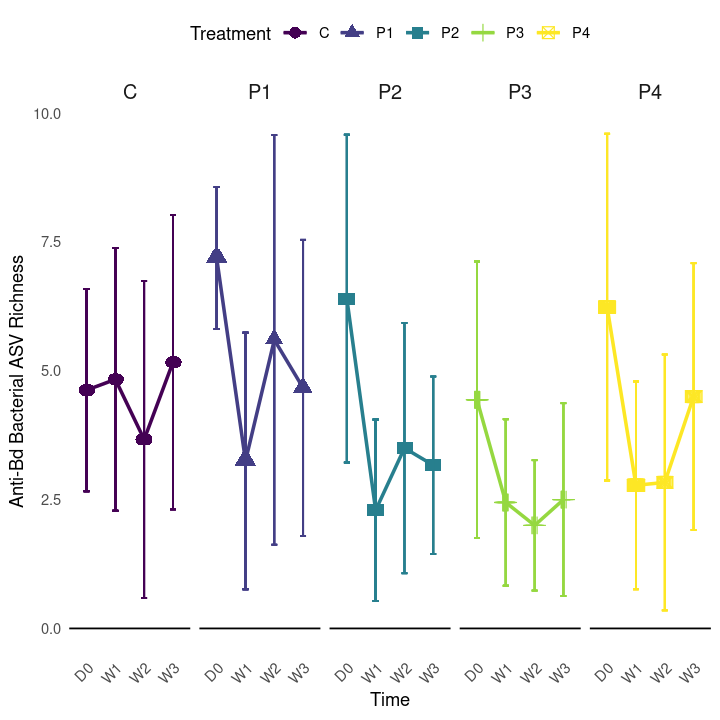

In [334]:
ggplot(df_with_summary2, aes(x = DayWeekNo, y = mean_S_obs_anti_corrected_actual, group = Treatment, color = Treatment)) +
  geom_line(aes(group = Treatment), linewidth = 1) +  
  geom_point(aes(shape = Treatment), size = 3, position = position_jitter(width = 0.1, height = 0)) +  
  geom_errorbar(
    aes(ymin = mean_S_obs_anti_corrected_actual - sd_S_obs_anti_corrected_actual,
        ymax = mean_S_obs_anti_corrected_actual + sd_S_obs_anti_corrected_actual),
    width = 0.2                                      
  ) +
  labs(
    x = "Time", 
    y = "Anti-Bd Bacterial ASV Richness"  
  ) +
  scale_color_manual(values = c(
    "C" = "#440154",
    "P1" = "#433E85FF",
    "P2" = "#277f8e",
    "P3" = "#95d840",
    "P4" = "#FDE725FF"
  )) +  
  theme_minimal() +                                
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1), 
    panel.grid = element_blank(),                     
    legend.position = "top",                           
    strip.text = element_text(size = 12),             
    plot.title = element_text(hjust = 0.5, size = 16)  
  ) +
  facet_wrap(~ Treatment, nrow = 1, scales = "free_x") + 
  geom_vline(xintercept = 0, color = "black", linetype = "solid", size = 0.5) + 
  geom_hline(aes(yintercept = 0), color = "black", linetype = "solid", size = 0.5)    

In [335]:
##using log10 trasformation +1 to deal with undefined 0s

In [336]:
preAA <- aov(log10(S.obs_anti+1)~ Treatment, data = pre)

In [337]:
summary(preAA)

            Df Sum Sq Mean Sq F value Pr(>F)  
Treatment    4  0.534 0.13352   2.761 0.0337 *
Residuals   75  3.627 0.04836                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [338]:
TukeyHSD(preAA)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log10(S.obs_anti + 1) ~ Treatment, data = pre)

$Treatment
             diff         lwr         upr     p adj
P1-C   0.17941853 -0.03791097  0.39674803 0.1539006
P2-C   0.09199760 -0.12892436  0.31291957 0.7716355
P3-C  -0.05930297 -0.27663247  0.15802653 0.9404064
P4-C   0.07810361 -0.13600602  0.29221324 0.8455399
P2-P1 -0.08742092 -0.30834289  0.13350104 0.8028164
P3-P1 -0.23872150 -0.45605100 -0.02139199 0.0241041
P4-P1 -0.10131492 -0.31542454  0.11279471 0.6780652
P3-P2 -0.15130057 -0.37222254  0.06962140 0.3188283
P4-P2 -0.01389399 -0.23164921  0.20386123 0.9997683
P4-P3  0.13740658 -0.07670305  0.35151621 0.3847834


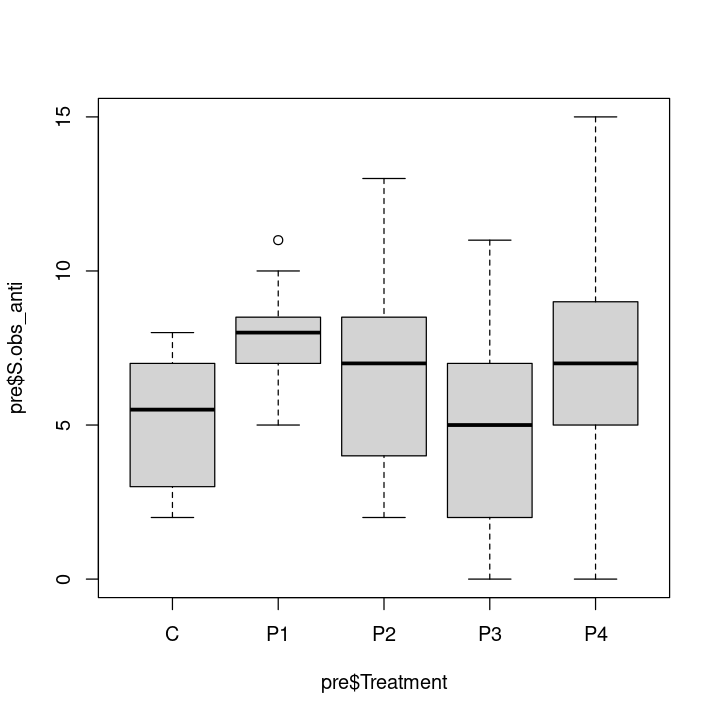

In [339]:
boxplot(pre$S.obs_anti ~ pre$Treatment)

In [340]:
postAAlmer <- lme4::lmer(log10(S.obs_anti+1) ~ Day + Treatment + Day*Treatment + (1 | FrogID), data = post)

In [341]:
summary(postAAlmer)

Linear mixed model fit by REML ['lmerMod']
Formula: log10(S.obs_anti + 1) ~ Day + Treatment + Day * Treatment + (1 |  
    FrogID)
   Data: post

REML criterion at convergence: -19.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4697 -0.5650 -0.0085  0.7093  1.9996 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept) 0.004295 0.06554 
 Residual             0.032089 0.17913 
Number of obs: 146, groups:  FrogID, 18

Fixed effects:
                 Estimate Std. Error t value
(Intercept)      0.769422   0.080490   9.559
Day             -0.003144   0.005992  -0.525
TreatmentP1     -0.127367   0.113463  -1.123
TreatmentP2     -0.194358   0.112145  -1.733
TreatmentP3     -0.155751   0.110872  -1.405
TreatmentP4     -0.013267   0.110872  -0.120
Day:TreatmentP1  0.013501   0.008366   1.614
Day:TreatmentP2  0.009246   0.008304   1.113
Day:TreatmentP3  0.007298   0.008259   0.884
Day:TreatmentP4  0.008323   0.008259   1.008

Correlation of Fixed Effec

In [342]:
Anova(postAAlmer, test="Chisq")

Chisq     Df Pr(>Chisq)  
Day            2.246084 1  0.1339530442
Treatment     18.556782 4  0.0009602209
Day:Treatment  2.759597 4  0.5988269776

In [343]:
fixed.postAAlmer <- data.frame(fixef(postAAlmer))

In [344]:
fixed.postAAlmer

fixef.postAAlmer.
(Intercept)      0.769422225     
Day             -0.003144489     
TreatmentP1     -0.127367341     
TreatmentP2     -0.194357691     
TreatmentP3     -0.155750882     
TreatmentP4     -0.013267338     
Day:TreatmentP1  0.013500970     
Day:TreatmentP2  0.009245616     
Day:TreatmentP3  0.007298310     
Day:TreatmentP4  0.008323147

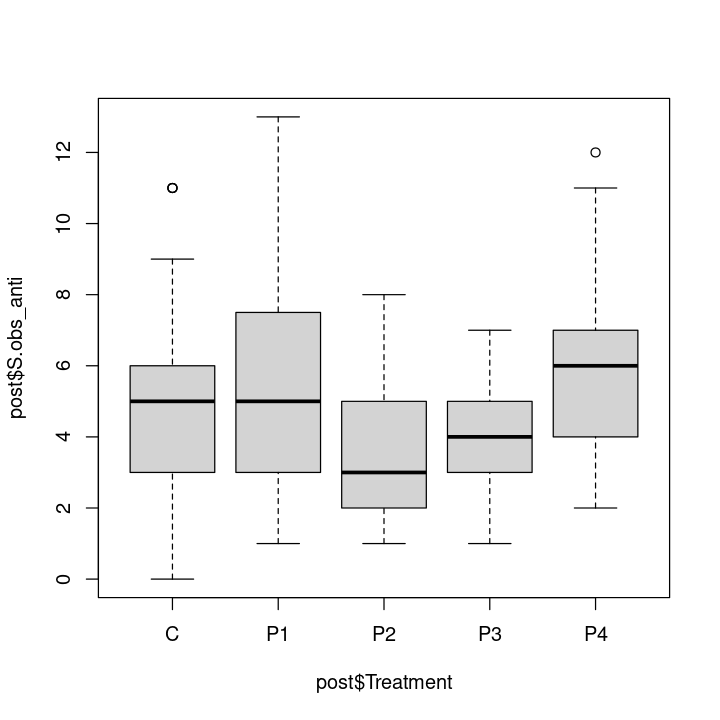

In [345]:
boxplot(post$S.obs_anti ~ post$Treatment)

In [346]:
emmeans(postAAlmer, list(pairwise ~ Treatment), adjust = "tukey")

NOTE: Results may be misleading due to involvement in interactions



$`emmeans of Treatment`
 Treatment emmean     SE   df lower.CL upper.CL
 C          0.731 0.0370 79.8    0.657    0.804
 P1         0.769 0.0383 90.1    0.693    0.845
 P2         0.650 0.0376 81.1    0.575    0.725
 P3         0.665 0.0370 79.8    0.591    0.738
 P4         0.820 0.0370 79.8    0.746    0.893

Degrees-of-freedom method: kenward-roger 
Results are given on the log10(mu + 1) (not the response) scale. 
Confidence level used: 0.95 

$`pairwise differences of Treatment`
 1       estimate     SE  df t.ratio p.value
 C - P1   -0.0383 0.0476 120  -0.804  0.9290
 C - P2    0.0809 0.0467 120   1.733  0.4176
 C - P3    0.0662 0.0463 120   1.432  0.6086
 C - P4   -0.0888 0.0463 120  -1.920  0.3122
 P1 - P2   0.1192 0.0480 121   2.481  0.1017
 P1 - P3   0.1045 0.0476 120   2.195  0.1887
 P1 - P4  -0.0506 0.0476 120  -1.063  0.8251
 P2 - P3  -0.0147 0.0467 120  -0.315  0.9978
 P2 - P4  -0.1698 0.0467 120  -3.636  0.0037
 P3 - P4  -0.1551 0.0463 120  -3.352  0.0093

Note: contrasts 

In [347]:
##### ALPHA DIVERSITY: ANTI-Bd RICHNESS Corrected theoretical (excludes probiotics, minus 1 for P1,P2,P3 and minus 3 for P4)####
##S.obs_anti_corrected used here is richness values of the "anti-Bd community" standardized across treatments to exlude the probiotics
##using log10 trasformation +1 to deal with undefined 0s

In [348]:
preAAC <- aov(log10(S.obs_anti_corrected_theoretical+1)~ Treatment, data = pre)

In [349]:
summary(preAAC)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Treatment    4  0.912 0.22802   3.595 0.00979 **
Residuals   75  4.758 0.06343                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [350]:
TukeyHSD(preAAC)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log10(S.obs_anti_corrected_theoretical + 1) ~ Treatment, data = pre)

$Treatment
             diff        lwr         upr     p adj
P1-C   0.12494969 -0.1239579  0.37385728 0.6275572
P2-C   0.01425424 -0.2387678  0.26727629 0.9998587
P3-C  -0.15816280 -0.4070704  0.09074480 0.3949859
P4-C  -0.14455615 -0.3897760  0.10066373 0.4722219
P2-P1 -0.11069545 -0.3637175  0.14232660 0.7381249
P3-P1 -0.28311249 -0.5320201 -0.03420489 0.0177474
P4-P1 -0.26950584 -0.5147257 -0.02428596 0.0239914
P3-P2 -0.17241704 -0.4254391  0.08060501 0.3238349
P4-P2 -0.15881039 -0.4082056  0.09058479 0.3927929
P4-P3  0.01360665 -0.2316132  0.25882653 0.9998670


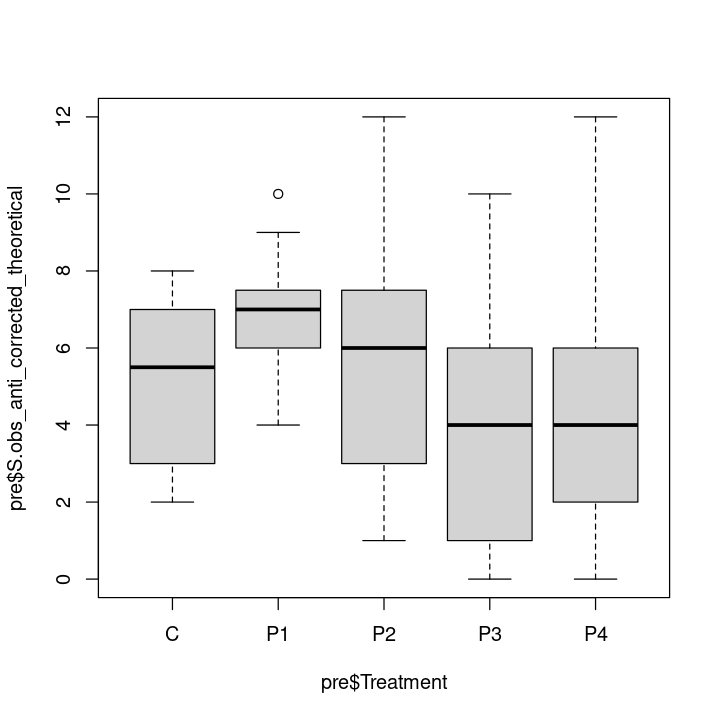

In [351]:
boxplot(pre$S.obs_anti_corrected_theoretical ~ pre$Treatment)

In [352]:
postAAClmer <- lme4::lmer(log10(S.obs_anti_corrected_theoretical+1) ~ Day + Treatment + Day*Treatment + (1 | FrogID), data = post)

In [353]:
summary(postAAClmer)

Linear mixed model fit by REML ['lmerMod']
Formula: log10(S.obs_anti_corrected_theoretical + 1) ~ Day + Treatment +  
    Day * Treatment + (1 | FrogID)
   Data: post

REML criterion at convergence: 56.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.51771 -0.50792  0.00949  0.73755  2.00253 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept) 0.007012 0.08373 
 Residual             0.056283 0.23724 
Number of obs: 146, groups:  FrogID, 18

Fixed effects:
                 Estimate Std. Error t value
(Intercept)      0.772674   0.106431   7.260
Day             -0.003595   0.007928  -0.453
TreatmentP1     -0.260079   0.150262  -1.731
TreatmentP2     -0.350214   0.148515  -2.358
TreatmentP3     -0.304693   0.146836  -2.075
TreatmentP4     -0.548363   0.146836  -3.735
Day:TreatmentP1  0.016507   0.011080   1.490
Day:TreatmentP2  0.011814   0.010997   1.074
Day:TreatmentP3  0.009530   0.010938   0.871
Day:TreatmentP4  0.022258   0.010938   2.

In [354]:
Anova(postAAClmer, test="Chisq")

Chisq     Df Pr(>Chisq)  
Day            4.588017 1  3.219624e-02
Treatment     27.018107 4  1.971205e-05
Day:Treatment  4.591125 4  3.318787e-01

In [355]:
fixed.postAAClmer <- data.frame(fixef(postAAClmer))

In [356]:
fixed.postAAClmer

fixef.postAAClmer.
(Intercept)      0.772673898      
Day             -0.003594720      
TreatmentP1     -0.260078995      
TreatmentP2     -0.350213926      
TreatmentP3     -0.304692711      
TreatmentP4     -0.548363076      
Day:TreatmentP1  0.016507226      
Day:TreatmentP2  0.011814381      
Day:TreatmentP3  0.009529993      
Day:TreatmentP4  0.022257705

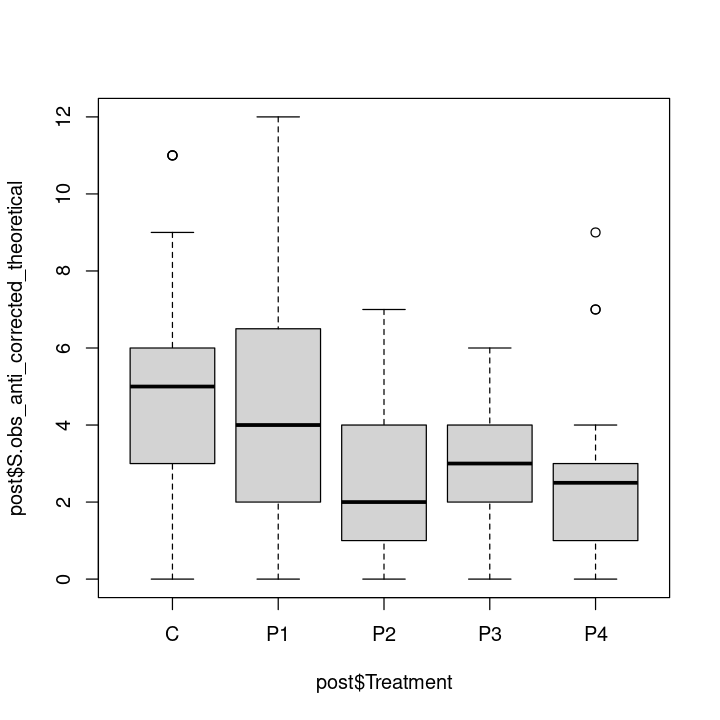

In [357]:
boxplot(post$S.obs_anti_corrected_theoretical ~ post$Treatment)

In [358]:
emmeans(postAAClmer, list(pairwise ~ Treatment), adjust = "tukey")

NOTE: Results may be misleading due to involvement in interactions



$`emmeans of Treatment`
 Treatment emmean     SE   df lower.CL upper.CL
 C          0.729 0.0486 81.5    0.632    0.825
 P1         0.671 0.0504 92.0    0.571    0.771
 P2         0.523 0.0495 82.7    0.425    0.622
 P3         0.541 0.0486 81.5    0.444    0.638
 P4         0.453 0.0486 81.5    0.357    0.550

Degrees-of-freedom method: kenward-roger 
Results are given on the log10(mu + 1) (not the response) scale. 
Confidence level used: 0.95 

$`pairwise differences of Treatment`
 1       estimate     SE  df t.ratio p.value
 C - P1    0.0576 0.0630 121   0.914  0.8912
 C - P2    0.2053 0.0618 121   3.320  0.0103
 C - P3    0.1878 0.0613 120   3.065  0.0221
 C - P4    0.2753 0.0613 120   4.494  0.0002
 P1 - P2   0.1477 0.0636 121   2.322  0.1451
 P1 - P3   0.1302 0.0630 121   2.066  0.2419
 P1 - P4   0.2177 0.0630 121   3.454  0.0067
 P2 - P3  -0.0175 0.0618 121  -0.283  0.9986
 P2 - P4   0.0700 0.0618 121   1.133  0.7890
 P3 - P4   0.0875 0.0613 120   1.429  0.6103

Note: contrasts 

In [359]:
emmeans(postAAClmer, list(pairwise ~ Day), adjust = "tukey")

NOTE: Results may be misleading due to involvement in interactions



$`emmeans of Day`
  Day emmean     SE   df lower.CL upper.CL
 12.3  0.583 0.0295 14.6     0.52    0.646

Results are averaged over the levels of: Treatment 
Degrees-of-freedom method: kenward-roger 
Results are given on the log10(mu + 1) (not the response) scale. 
Confidence level used: 0.95 

$` of Day`
 1         estimate SE df z.ratio p.value
 (nothing)   nonEst NA NA      NA      NA

Results are averaged over the levels of: Treatment 
Note: contrasts are still on the log10(mu + 1) scale. Consider using
      regrid() if you want contrasts of back-transformed estimates. 
Degrees-of-freedom method: kenward-roger 


In [360]:
##### ALPHA DIVERSITY: ANTI-Bd RICHNESS Corrected actual (excludes probiotics, minus for P1,P2,P3, and P4 depending on actual absence/presence by group)####
##S.obs_anti_corrected used here is richness values of the "anti-Bd community" standardized across treatments to exlude the probiotics
##using log10 trasformation +1 to deal with undefined 0s

In [361]:
preAACactual <- aov(log10(S.obs_anti_corrected_actual+1)~ Treatment, data = pre)

In [362]:
summary(preAACactual)

            Df Sum Sq Mean Sq F value Pr(>F)  
Treatment    4  0.543 0.13586   3.062 0.0215 *
Residuals   75  3.327 0.04437                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [363]:
TukeyHSD(preAACactual)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log10(S.obs_anti_corrected_actual + 1) ~ Treatment, data = pre)

$Treatment
             diff         lwr         upr     p adj
P1-C   0.18578196 -0.02238030  0.39394422 0.1027378
P2-C   0.10507389 -0.10652930  0.31667708 0.6371763
P3-C  -0.05099624 -0.25915850  0.15716602 0.9591810
P4-C   0.07884991 -0.12622829  0.28392811 0.8188802
P2-P1 -0.08070807 -0.29231126  0.13089511 0.8231728
P3-P1 -0.23677820 -0.44494046 -0.02861594 0.0177404
P4-P1 -0.10693205 -0.31201026  0.09814615 0.5929327
P3-P2 -0.15607013 -0.36767332  0.05553306 0.2476246
P4-P2 -0.02622398 -0.23479400  0.18234604 0.9966591
P4-P3  0.12984615 -0.07523206  0.33492435 0.3986793


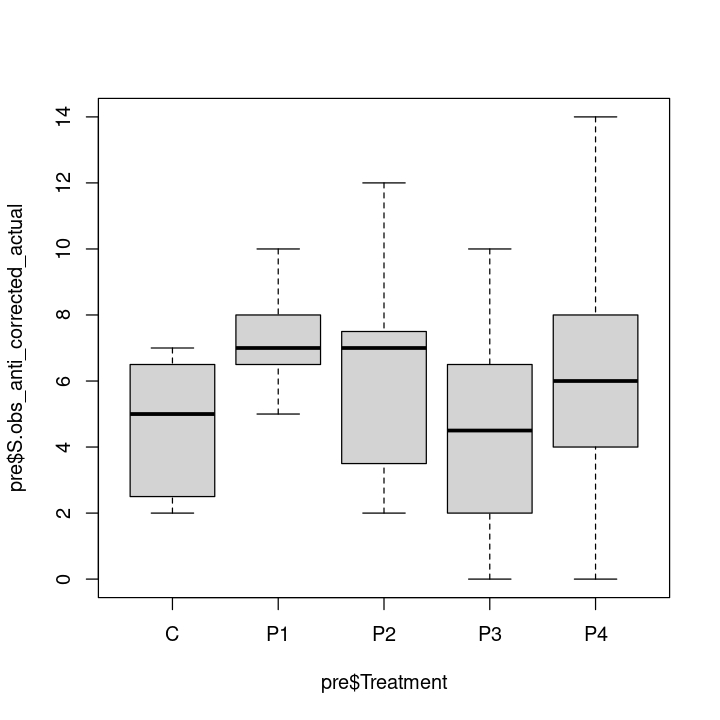

In [364]:
boxplot(pre$S.obs_anti_corrected_actual ~ pre$Treatment)

In [365]:
postAACactuallmer <- lme4::lmer(log10(S.obs_anti_corrected_actual+1) ~ Day + Treatment + Day*Treatment + (1 | FrogID), data = post)

In [366]:
summary(postAACactuallmer)

Linear mixed model fit by REML ['lmerMod']
Formula: log10(S.obs_anti_corrected_actual + 1) ~ Day + Treatment + Day *  
    Treatment + (1 | FrogID)
   Data: post

REML criterion at convergence: 63.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.41537 -0.53853  0.06434  0.68791  1.82800 

Random effects:
 Groups   Name        Variance Std.Dev.
 FrogID   (Intercept) 0.004393 0.06628 
 Residual             0.060972 0.24692 
Number of obs: 146, groups:  FrogID, 18

Fixed effects:
                  Estimate Std. Error t value
(Intercept)      0.7191404  0.1097326   6.554
Day             -0.0013608  0.0081905  -0.166
TreatmentP1     -0.2753378  0.1563540  -1.761
TreatmentP2     -0.3389719  0.1545336  -2.194
TreatmentP3     -0.2415874  0.1528299  -1.581
TreatmentP4     -0.3230818  0.1528299  -2.114
Day:TreatmentP1  0.0149582  0.0115304   1.297
Day:TreatmentP2  0.0120927  0.0114443   1.057
Day:TreatmentP3  0.0004765  0.0113849   0.042
Day:TreatmentP4  0.0134731  0.011384

In [367]:
Anova(postAACactuallmer, test="Chisq")

Chisq     Df Pr(>Chisq) 
Day            2.932658 1  0.086804476
Treatment     16.558375 4  0.002354531
Day:Treatment  3.285878 4  0.511172847

In [368]:
fixed.postAACactuallmer <- data.frame(fixef(postAAClmer))

In [369]:
fixed.postAACactuallmer

fixef.postAAClmer.
(Intercept)      0.772673898      
Day             -0.003594720      
TreatmentP1     -0.260078995      
TreatmentP2     -0.350213926      
TreatmentP3     -0.304692711      
TreatmentP4     -0.548363076      
Day:TreatmentP1  0.016507226      
Day:TreatmentP2  0.011814381      
Day:TreatmentP3  0.009529993      
Day:TreatmentP4  0.022257705

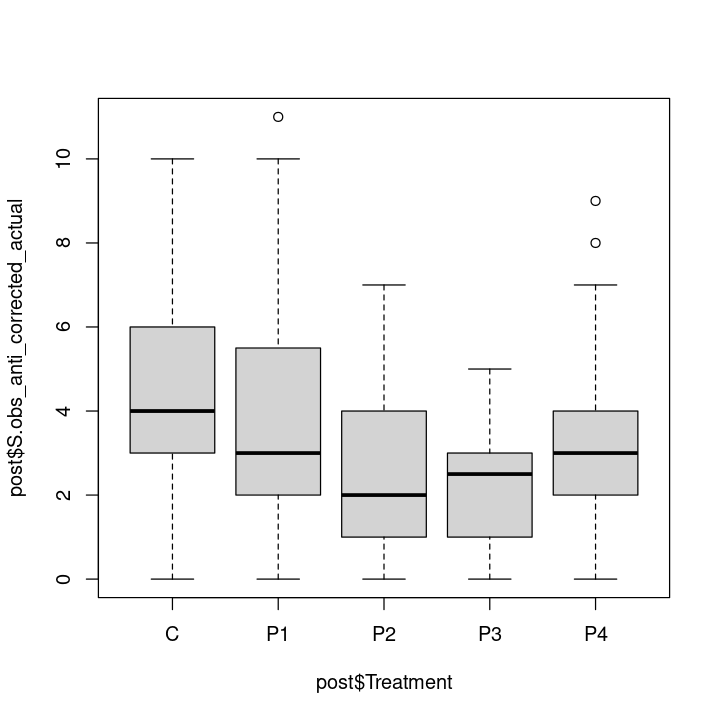

In [370]:
boxplot(post$S.obs_anti_corrected_actual ~ post$Treatment)

In [371]:
emmeans(postAACactuallmer, list(pairwise ~ Treatment), adjust = "tukey")

NOTE: Results may be misleading due to involvement in interactions



$`emmeans of Treatment`
 Treatment emmean     SE    df lower.CL upper.CL
 C          0.702 0.0486  92.8    0.606    0.799
 P1         0.611 0.0506 104.3    0.510    0.711
 P2         0.512 0.0494  93.5    0.414    0.610
 P3         0.467 0.0486  92.8    0.370    0.563
 P4         0.545 0.0486  92.8    0.448    0.641

Degrees-of-freedom method: kenward-roger 
Results are given on the log10(mu + 1) (not the response) scale. 
Confidence level used: 0.95 

$`pairwise differences of Treatment`
 1       estimate     SE  df t.ratio p.value
 C - P1    0.0918 0.0656 121   1.400  0.6288
 C - P2    0.1906 0.0644 121   2.962  0.0296
 C - P3    0.2357 0.0638 121   3.697  0.0030
 C - P4    0.1578 0.0638 121   2.475  0.1032
 P1 - P2   0.0988 0.0662 122   1.493  0.5693
 P1 - P3   0.1439 0.0656 121   2.194  0.1891
 P1 - P4   0.0660 0.0656 121   1.006  0.8524
 P2 - P3   0.0451 0.0644 121   0.701  0.9559
 P2 - P4  -0.0328 0.0644 121  -0.510  0.9862
 P3 - P4  -0.0779 0.0638 121  -1.222  0.7384

Note: cont

In [372]:
emmeans(postAACactuallmer, list(pairwise ~ Day), adjust = "tukey")

NOTE: Results may be misleading due to involvement in interactions



$`emmeans of Day`
  Day emmean     SE   df lower.CL upper.CL
 12.3  0.567 0.0272 13.6    0.509    0.626

Results are averaged over the levels of: Treatment 
Degrees-of-freedom method: kenward-roger 
Results are given on the log10(mu + 1) (not the response) scale. 
Confidence level used: 0.95 

$` of Day`
 1         estimate SE df z.ratio p.value
 (nothing)   nonEst NA NA      NA      NA

Results are averaged over the levels of: Treatment 
Note: contrasts are still on the log10(mu + 1) scale. Consider using
      regrid() if you want contrasts of back-transformed estimates. 
Degrees-of-freedom method: kenward-roger 


In [373]:
### ALPHA DIVERSITY: ANTI-Bd Ratios (excluding probiotics) ###

In [374]:
#Relative abundance anti-Bd visiualizations and preliminary stats

In [375]:
#using corrected ratios column, anti_rare_corrected is anti-Bd bacterial relative abundance corrected to remove probiotic sequence count

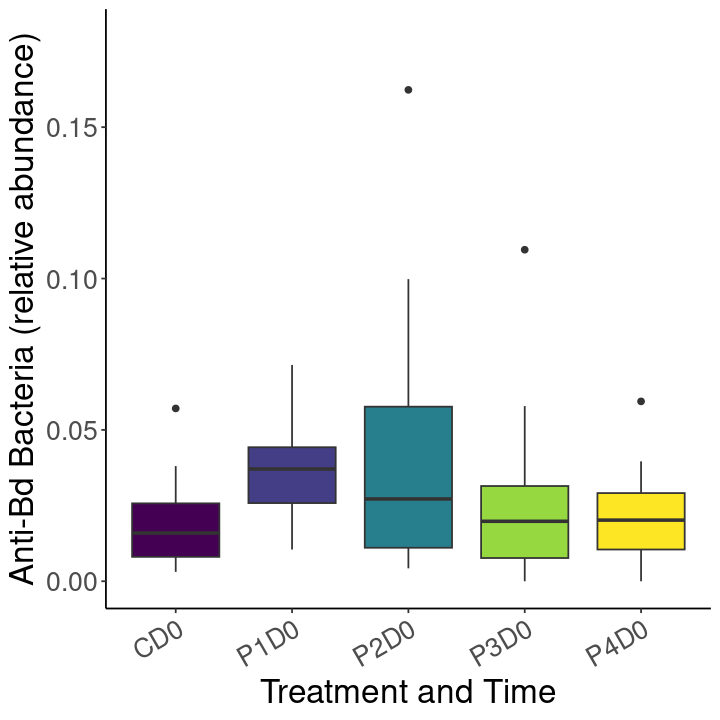

In [376]:
ggplot(data = df0, aes(x=TrmtTP, y=anti_rare_corrected, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Anti-Bd Bacteria (relative abundance)") + xlab("Treatment and Time")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF")) + ylim(0, 0.18) + theme(legend.position="none")


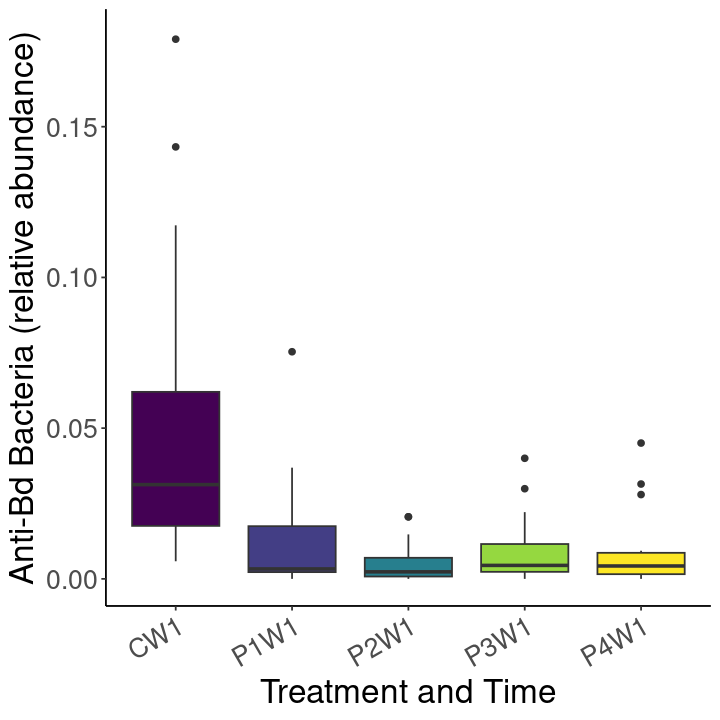

In [377]:
ggplot(data = df1, aes(x=TrmtTP, y=anti_rare_corrected, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Anti-Bd Bacteria (relative abundance)") + xlab("Treatment and Time") + theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 0.18) + theme(legend.position="none")

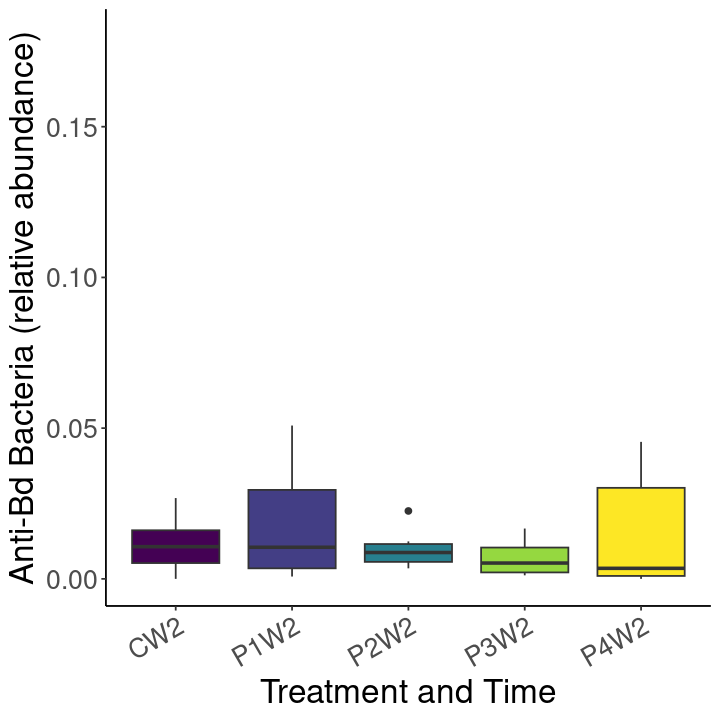

In [378]:
ggplot(data = df2, aes(x=TrmtTP, y=anti_rare_corrected, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Anti-Bd Bacteria (relative abundance)") + xlab("Treatment and Time")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 0.18) + theme(legend.position="none")

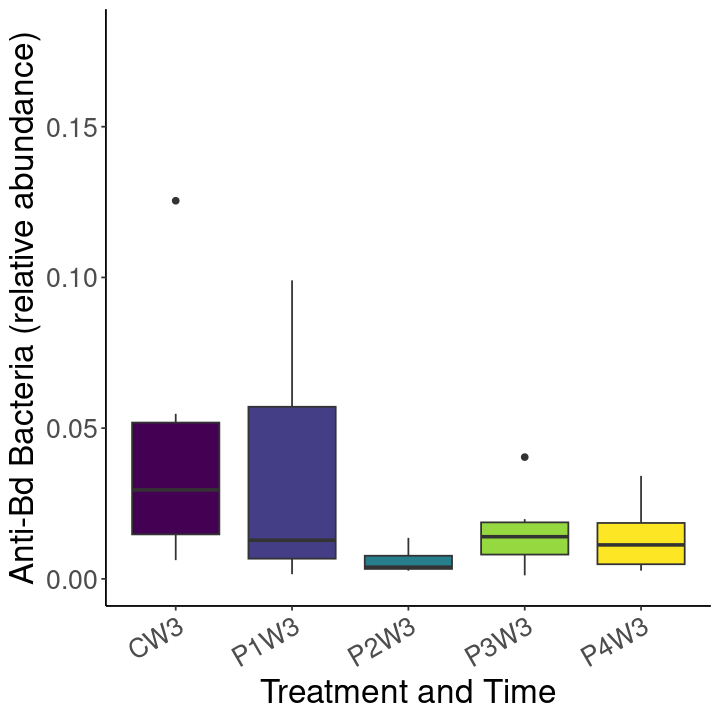

In [379]:
ggplot(data = df3, aes(x=TrmtTP, y=anti_rare_corrected, fill=TrmtTP))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("Anti-Bd Bacteria (relative abundance)") + xlab("Treatment and Time")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 0.18) + theme(legend.position="none")

In [380]:
summary_stats3 <- dfxk8 %>%
  group_by(Treatment, DayWeekNo) %>%
  summarise(
    mean_anti_rare_corrected = mean(anti_rare_corrected, na.rm = TRUE),
    sd_anti_rare_corrected = sd(anti_rare_corrected, na.rm = TRUE),
    .groups = "drop")

In [381]:
df_with_summary3 <- dfxk8 %>%
  left_join(summary_stats3, by = c("Treatment", "DayWeekNo"))

In [382]:
colnames(dfxk8)
colnames(df_with_summary3)

[1] "Row.names.x"                         "quant_reading"                      
 [3] "Treatment"                           "FrogID"                             
 [5] "FrogNo"                              "DayWeekNo"                          
 [7] "Day"                                 "Sample.type"                        
 [9] "TrmtTP"                              "TubeLabel"                          
[11] "ExtractionDate"                      "ExtColumn"                          
[13] "ExtRow"                              "Plate"                              
[15] "PCR.Date"                            "Clean.Date"                         
[17] "Notes"                               "S.obs"                              
[19] "S.chao1"                             "se.chao1.x"                         
[21] "S.ACE"                               "se.ACE.x"                           
[23] "sample_sums.xk7."                    "Row.names.y"                        
[25] "S.obs_rare"                          "S.chao1_rare"                       
[27] "se.chao1.y"                          "S.ACE_rare"                         
[29] "se.ACE.y"                            "sample_sums.xk7Rare."               
[31] "Row.names"                           "S.obs_anti"                         
[33] "S.obs_anti_corrected_theoretical"    "S.obs_anti_corrected_actual"        
[35] "S.chao1_anti"                        "se.chao1"                           
[37] "S.ACE_anti"                          "se.ACE"                             
[39] "sample_sums.xk7Anti."                "anti_rare_ratio"                    
[41] "anti_rare_corrected"                 "richness_total_ASV_9_10_18"         
[43] "ASV_9_Stenotrophomonas_THA2.2_P2"    "ASV_10_Pseudomonas_RSB5.11_ASV10_P3"
[45] "ASV_18_Pseudomonas_RSB5.4_ASV18_P1"  "CSF1"                               
[47] "FOXP3"                               "IL10"                               
[49] "IL34"                                "TGFB"                               
[51] "TLR2"                                "TLR6"                               
[53] "TNFA"                                "qPCR"                               
[55] "SampleID"

[1] "Row.names.x"                         "quant_reading"                      
 [3] "Treatment"                           "FrogID"                             
 [5] "FrogNo"                              "DayWeekNo"                          
 [7] "Day"                                 "Sample.type"                        
 [9] "TrmtTP"                              "TubeLabel"                          
[11] "ExtractionDate"                      "ExtColumn"                          
[13] "ExtRow"                              "Plate"                              
[15] "PCR.Date"                            "Clean.Date"                         
[17] "Notes"                               "S.obs"                              
[19] "S.chao1"                             "se.chao1.x"                         
[21] "S.ACE"                               "se.ACE.x"                           
[23] "sample_sums.xk7."                    "Row.names.y"                        
[25] "S.obs_rare"                          "S.chao1_rare"                       
[27] "se.chao1.y"                          "S.ACE_rare"                         
[29] "se.ACE.y"                            "sample_sums.xk7Rare."               
[31] "Row.names"                           "S.obs_anti"                         
[33] "S.obs_anti_corrected_theoretical"    "S.obs_anti_corrected_actual"        
[35] "S.chao1_anti"                        "se.chao1"                           
[37] "S.ACE_anti"                          "se.ACE"                             
[39] "sample_sums.xk7Anti."                "anti_rare_ratio"                    
[41] "anti_rare_corrected"                 "richness_total_ASV_9_10_18"         
[43] "ASV_9_Stenotrophomonas_THA2.2_P2"    "ASV_10_Pseudomonas_RSB5.11_ASV10_P3"
[45] "ASV_18_Pseudomonas_RSB5.4_ASV18_P1"  "CSF1"                               
[47] "FOXP3"                               "IL10"                               
[49] "IL34"                                "TGFB"                               
[51] "TLR2"                                "TLR6"                               
[53] "TNFA"                                "qPCR"                               
[55] "SampleID"                            "mean_anti_rare_corrected"           
[57] "sd_anti_rare_corrected"

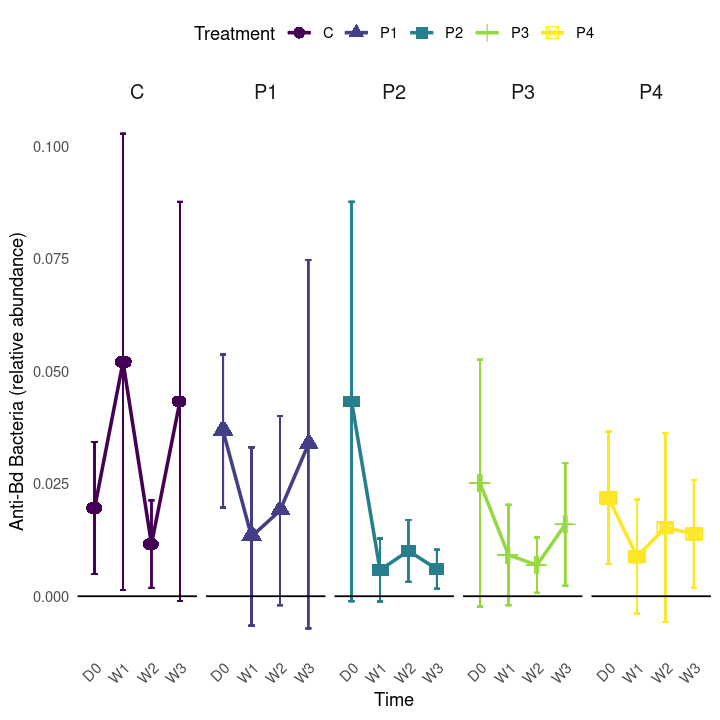

In [383]:
ggplot(df_with_summary3, aes(x = DayWeekNo, y = mean_anti_rare_corrected, group = Treatment, color = Treatment)) +
  geom_line(aes(group = Treatment), linewidth = 1) +
  geom_point(aes(shape = Treatment), size = 3, position = position_jitter(width = 0.1, height = 0)) +
  geom_errorbar(
    aes(ymin = mean_anti_rare_corrected - sd_anti_rare_corrected,
        ymax = mean_anti_rare_corrected + sd_anti_rare_corrected),
    width = 0.2                                      
  ) +
  labs(
    x = "Time", 
    y = "Anti-Bd Bacteria (relative abundance)"  
  ) +
  scale_color_manual(values = c(
    "C" = "#440154",
    "P1" = "#433E85FF",
    "P2" = "#277f8e",
    "P3" = "#95d840",
    "P4" = "#FDE725FF"
  )) +
  theme_minimal() +                                
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1), 
    panel.grid = element_blank(),                      
    legend.position = "top",                        
    strip.text = element_text(size = 12),              
    plot.title = element_text(hjust = 0.5, size = 16) 
  ) +
  facet_wrap(~ Treatment, nrow = 1, scales = "free_x") + 
  geom_vline(xintercept = 0, color = "black", linetype = "solid", size = 0.5) + 
  geom_hline(aes(yintercept = 0), color = "black", linetype = "solid", size = 0.5) 

In [384]:
## Not different in pretreatment

In [385]:
preAR <- aov(anti_rare_corrected ~ Treatment, data = pre)

In [386]:
summary(preAR)

            Df  Sum Sq   Mean Sq F value Pr(>F)  
Treatment    4 0.00653 0.0016319   2.452 0.0532 .
Residuals   75 0.04991 0.0006655                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [387]:
TukeyHSD(preAR)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = anti_rare_corrected ~ Treatment, data = pre)

$Treatment
              diff          lwr         upr     p adj
P1-C   0.017087379 -0.008406833 0.042581590 0.3404667
P2-C   0.023676375 -0.002239257 0.049592007 0.0897927
P3-C   0.005509709 -0.019984503 0.031003920 0.9740324
P4-C   0.002250143 -0.022866356 0.027366642 0.9991129
P2-P1  0.006588997 -0.019326636 0.032504629 0.9534444
P3-P1 -0.011577670 -0.037071882 0.013916542 0.7105791
P4-P1 -0.014837236 -0.039953735 0.010279263 0.4700729
P3-P2 -0.018166667 -0.044082299 0.007748966 0.2958691
P4-P2 -0.021426233 -0.046970384 0.004117919 0.1424838
P4-P3 -0.003259566 -0.028376065 0.021856933 0.9962227


In [388]:
## Anti-Bd RA, strong treatment effect, no time effect
## This is using the corrected values. Adding Bd-inhibitory probiotic decreases the relative abundance of other Bd-inhibitory taxa

In [389]:
postARlmer <- lme4::lmer(anti_rare_corrected ~ Day + Treatment + Day*Treatment + (1 | FrogID), data = post)

boundary (singular) fit: see help('isSingular')



In [390]:
summary(postARlmer)

Linear mixed model fit by REML ['lmerMod']
Formula: anti_rare_corrected ~ Day + Treatment + Day * Treatment + (1 |  
    FrogID)
   Data: post

REML criterion at convergence: -564.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6571 -0.4090 -0.1951  0.2028  5.2187 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 FrogID   (Intercept) 1.838e-21 4.288e-11
 Residual             6.345e-04 2.519e-02
Number of obs: 146, groups:  FrogID, 18

Fixed effects:
                  Estimate Std. Error t value
(Intercept)      0.0577445  0.0110246   5.238
Day             -0.0012720  0.0008213  -1.549
TreatmentP1     -0.0562136  0.0159375  -3.527
TreatmentP2     -0.0520564  0.0157557  -3.304
TreatmentP3     -0.0523700  0.0155911  -3.359
TreatmentP4     -0.0518632  0.0155911  -3.326
Day:TreatmentP1  0.0026718  0.0011757   2.273
Day:TreatmentP2  0.0013579  0.0011672   1.163
Day:TreatmentP3  0.0016580  0.0011614   1.428
Day:TreatmentP4  0.0017013  0.0011614   1.465

Correlatio

In [391]:
## Anti-Bd bac richness, strong treatment effect, no time effect

In [392]:
Anova(postARlmer, test="Chisq")

Chisq      Df Pr(>Chisq)  
Day            0.2779646 1  5.980384e-01
Treatment     38.7890023 4  7.701730e-08
Day:Treatment  5.3944837 4  2.491613e-01

In [393]:
fixed.postARlmer <- data.frame(fixef(postARlmer))

In [394]:
fixed.postARlmer

fixef.postARlmer.
(Intercept)      0.057744452     
Day             -0.001271960     
TreatmentP1     -0.056213627     
TreatmentP2     -0.052056381     
TreatmentP3     -0.052369972     
TreatmentP4     -0.051863153     
Day:TreatmentP1  0.002671838     
Day:TreatmentP2  0.001357921     
Day:TreatmentP3  0.001657998     
Day:TreatmentP4  0.001701341

In [395]:
emmeans(postARlmer, list(pairwise ~ Treatment), adjust = "tukey")

NOTE: Results may be misleading due to involvement in interactions



$`emmeans of Treatment`
 Treatment  emmean      SE  df  lower.CL upper.CL
 C         0.04214 0.00462 116  0.032988   0.0513
 P1        0.01870 0.00487 125  0.009065   0.0283
 P2        0.00674 0.00470 116 -0.002572   0.0161
 P3        0.01011 0.00462 116  0.000956   0.0193
 P4        0.01115 0.00462 116  0.001995   0.0203

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$`pairwise differences of Treatment`
 1       estimate      SE  df t.ratio p.value
 C - P1   0.02344 0.00669 124   3.504  0.0057
 C - P2   0.03540 0.00656 123   5.395  <.0001
 C - P3   0.03203 0.00650 123   4.924  <.0001
 C - P4   0.03099 0.00650 123   4.765  0.0001
 P1 - P2  0.01196 0.00674 125   1.773  0.3936
 P1 - P3  0.00859 0.00669 124   1.285  0.7011
 P1 - P4  0.00755 0.00669 124   1.129  0.7907
 P2 - P3 -0.00337 0.00656 123  -0.513  0.9859
 P2 - P4 -0.00441 0.00656 123  -0.672  0.9622
 P3 - P4 -0.00104 0.00650 123  -0.160  0.9999

Degrees-of-freedom method: kenward-roger 
P value adjustmen

In [396]:
###BETA DIVERSITY ANALYSES

In [397]:
##Jaccard metric

In [398]:
#Visualizations

In [399]:
beta_stats <- dfxk8 %>%
  group_by(Treatment, DayWeekNo)

In [400]:
#TrmtTP <- factor(TrmtTP)

In [401]:
jacc_PF <- phyloseq::distance(xk8, "jaccard", binary = T)

In [402]:
jacc.ordPF <- ordinate(xk8, method = "PCoA", jacc_PF)

In [403]:
p_jaccF <- plot_ordination(xk8, jacc.ordPF, color = "TrmtTP", shape = "DayWeekNo", axes = c(2,3))

In [404]:
palette.colors(palette = "Okabe-Ito")

black        orange       skyblue   bluishgreen        yellow 
    "#000000"     "#E69F00"     "#56B4E9"     "#009E73"     "#F0E442" 
         blue    vermillion reddishpurple          gray 
    "#0072B2"     "#D55E00"     "#CC79A7"     "#999999"

In [405]:
c("#E69F00", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

[1] "#E69F00" "#009E73" "#F0E442" "#0072B2" "#D55E00" "#CC79A7"

In [406]:
p_jaccF_plot <- p_jaccF + geom_point(size = 3)  +theme_bw() +theme_classic()+ 
  theme(text = element_text(size = 20))

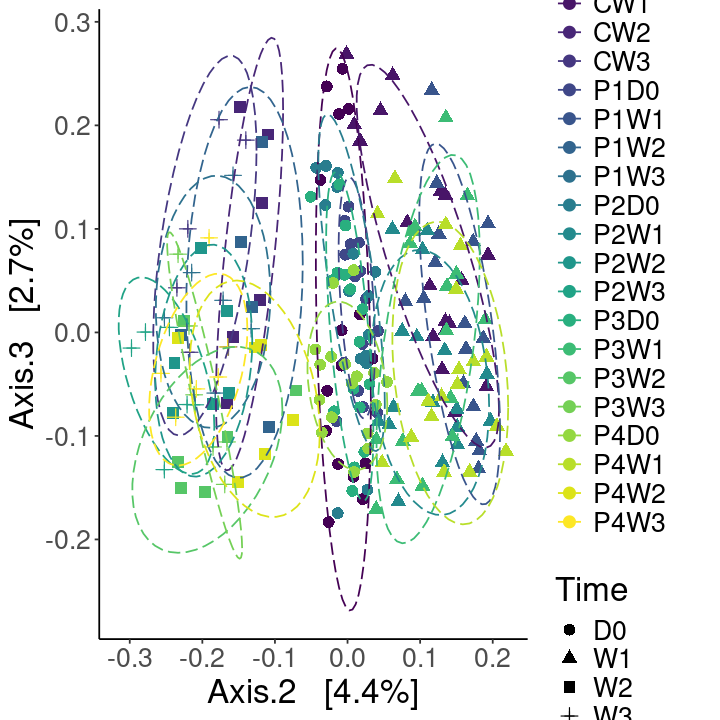

In [407]:
p_jaccF_plot + scale_color_viridis(discrete = TRUE) + stat_ellipse(aes(group=TrmtTP), linetype = 5, level = 0.8, type = "t") + guides(shape = guide_legend(title = "Time"), color = guide_legend(title = "Treatment"))

options(repr.plot.width=8, repr.plot.height=8)

In [408]:
jacc_xk0 <- phyloseq::distance(xk0, "jaccard", binary = T)

In [409]:
jacc_xk1 <- phyloseq::distance(xk1, "jaccard", binary = T)

In [410]:
jacc_xk2 <- phyloseq::distance(xk2, "jaccard", binary = T)

In [411]:
jacc_xk3 <- phyloseq::distance(xk3, "jaccard", binary = T)

In [412]:
#Statistics

In [413]:
jacc_adonis0 <- adonis2(jacc_xk0 ~ TrmtTP, data = df0)

In [414]:
jacc_adonis1 <- adonis2(jacc_xk1 ~ TrmtTP, data = df1)

In [415]:
jacc_adonis2 <- adonis2(jacc_xk2 ~ TrmtTP, data = df2)

In [416]:
jacc_adonis3 <- adonis2(jacc_xk3 ~ TrmtTP, data = df3)

In [417]:
jacc_adonis0

Df SumOfSqs  R2         F        Pr(>F)
Model     4  1.872419 0.07379214 1.493836 0.001 
Residual 75 23.501819 0.92620786       NA    NA 
Total    79 25.374238 1.00000000       NA    NA

In [418]:
jacc_adonis1

Df SumOfSqs R2         F        Pr(>F)
Model     4  2.52224 0.08975534 2.021417 0.001 
Residual 82 25.57904 0.91024466       NA    NA 
Total    86 28.10128 1.00000000       NA    NA

In [419]:
jacc_adonis2

Df SumOfSqs R2        F       Pr(>F)
Model     4 1.797741 0.1854998 1.36648 0.001 
Residual 24 7.893599 0.8145002      NA    NA 
Total    28 9.691340 1.0000000      NA    NA

In [420]:
jacc_adonis3

Df SumOfSqs  R2        F        Pr(>F)
Model     4  1.755372 0.1707417 1.286855 0.001 
Residual 25  8.525490 0.8292583       NA    NA 
Total    29 10.280862 1.0000000       NA    NA

In [421]:
pairwise.adonis(jacc_xk0, df0$TrmtTP)

pairs        Df SumsOfSqs F.Model  R2         p.value p.adjusted sig
1  CD0 vs P1D0  1  0.7011593 2.280110 0.07063514 0.001   0.01       *  
2  CD0 vs P2D0  1  0.5595800 1.705120 0.05553212 0.003   0.03       .  
3  CD0 vs P3D0  1  0.4272236 1.286992 0.04113506 0.074   0.74          
4  CD0 vs P4D0  1  0.4867472 1.516988 0.04665217 0.027   0.27          
5  P1D0 vs P2D0 1  0.3400314 1.140640 0.03784392 0.145   1.00          
6  P1D0 vs P3D0 1  0.4527944 1.494929 0.04746570 0.004   0.04       .  
7  P1D0 vs P4D0 1  0.4795690 1.638243 0.05019396 0.002   0.02       .  
8  P2D0 vs P3D0 1  0.3607994 1.115670 0.03704617 0.171   1.00          
9  P2D0 vs P4D0 1  0.4918881 1.575467 0.04989528 0.006   0.06          
10 P3D0 vs P4D0 1  0.3786145 1.196674 0.03716761 0.093   0.93

In [422]:
pairwise.adonis(jacc_xk1, df1$TrmtTP)

pairs        Df SumsOfSqs F.Model  R2         p.value p.adjusted sig
1  CW1 vs P1W1  1  0.6792969 2.155226 0.06310090 0.001   0.01       *  
2  CW1 vs P2W1  1  0.7018072 2.263474 0.06418751 0.001   0.01       *  
3  CW1 vs P3W1  1  0.7098192 2.229928 0.06154933 0.001   0.01       *  
4  CW1 vs P4W1  1  0.6619517 2.065713 0.05727637 0.002   0.02       .  
5  P1W1 vs P2W1 1  0.5782466 1.917856 0.05826188 0.001   0.01       *  
6  P1W1 vs P3W1 1  0.6713729 2.161902 0.06328399 0.001   0.01       *  
7  P1W1 vs P4W1 1  0.6073913 1.941708 0.05720715 0.001   0.01       *  
8  P2W1 vs P3W1 1  0.5061625 1.656511 0.04779797 0.001   0.01       *  
9  P2W1 vs P4W1 1  0.6260835 2.034349 0.05806726 0.001   0.01       *  
10 P3W1 vs P4W1 1  0.5611964 1.775481 0.04962843 0.001   0.01       *

In [423]:
pairwise.adonis(jacc_xk2, df2$TrmtTP)

pairs        Df SumsOfSqs F.Model  R2        p.value p.adjusted sig
1  CW2 vs P1W2  1  0.4424841 1.251206 0.1220545 0.034   0.34          
2  CW2 vs P2W2  1  0.4760785 1.460006 0.1274001 0.008   0.08          
3  CW2 vs P3W2  1  0.4964390 1.471442 0.1282700 0.006   0.06          
4  CW2 vs P4W2  1  0.5456018 1.572503 0.1358827 0.003   0.03       .  
5  P1W2 vs P2W2 1  0.4015728 1.269033 0.1235787 0.008   0.08          
6  P1W2 vs P3W2 1  0.4584388 1.393437 0.1340689 0.012   0.12          
7  P1W2 vs P4W2 1  0.3861254 1.136852 0.1121504 0.106   1.00          
8  P2W2 vs P3W2 1  0.4117765 1.354986 0.1193296 0.002   0.02       .  
9  P2W2 vs P4W2 1  0.4604774 1.468928 0.1280790 0.006   0.06          
10 P3W2 vs P4W2 1  0.4062656 1.250890 0.1111814 0.026   0.26

In [424]:
pairwise.adonis(jacc_xk3, df3$TrmtTP)

pairs        Df SumsOfSqs F.Model  R2         p.value p.adjusted sig
1  CW3 vs P1W3  1  0.4986447 1.435024 0.12549378 0.006   0.06          
2  CW3 vs P2W3  1  0.5203367 1.597796 0.13776721 0.002   0.02       .  
3  CW3 vs P3W3  1  0.4488411 1.279013 0.11339763 0.034   0.34          
4  CW3 vs P4W3  1  0.4627613 1.325854 0.11706437 0.010   0.10          
5  P1W3 vs P2W3 1  0.4598905 1.410237 0.12359404 0.004   0.04       .  
6  P1W3 vs P3W3 1  0.4224130 1.202164 0.10731534 0.042   0.42          
7  P1W3 vs P4W3 1  0.4204310 1.203024 0.10738389 0.031   0.31          
8  P2W3 vs P3W3 1  0.3771795 1.144513 0.10269746 0.086   0.86          
9  P2W3 vs P4W3 1  0.4172389 1.273406 0.11295664 0.011   0.11          
10 P3W3 vs P4W3 1  0.3606922 1.022010 0.09272448 0.343   1.00

In [425]:
##Bray Curtis Metric

In [426]:
#Visualizations

In [427]:
bray_PF <- phyloseq::distance(xk8, "bray")

In [428]:
bray.ordPF <- ordinate(xk8, method = "PCoA", bray_PF)

In [429]:
p_brayF <- plot_ordination(xk8, bray.ordPF, color = "TrmtTP", shape = "DayWeekNo", axes = c(1,2))

In [430]:
p_brayF_plot <- p_brayF + geom_point(size = 3)  +theme_bw() +theme_classic()+ 
  theme(text = element_text(size = 20))

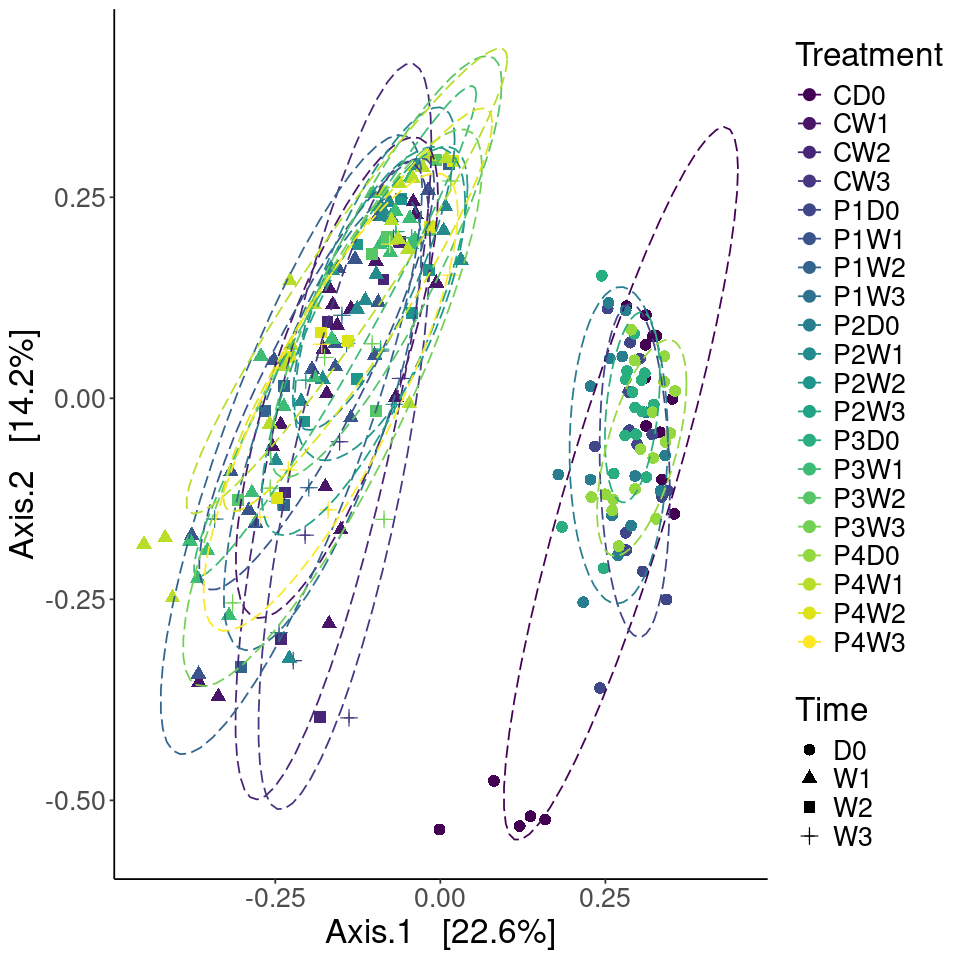

In [431]:
p_brayF_plot + scale_color_viridis(discrete = TRUE) + stat_ellipse(aes(group=TrmtTP), linetype = 5, level = 0.8, type = "t") + guides(shape = guide_legend(title = "Time"), color = guide_legend(title = "Treatment"))

options(repr.plot.width=8, repr.plot.height=8)

In [432]:
bray_xk0 <- phyloseq::distance(xk0, "bray")

In [433]:
bray_xk1 <- phyloseq::distance(xk1, "bray")

In [434]:
bray_xk2 <- phyloseq::distance(xk2, "bray")

In [435]:
bray_xk3 <- phyloseq::distance(xk3, "bray")

In [436]:
bray.ord0 <- ordinate(xk0, method = "PCoA", bray_xk0)

In [437]:
bray.ord1 <- ordinate(xk1, method = "PCoA", bray_xk1)

In [438]:
bray.ord2 <- ordinate(xk2, method = "PCoA", bray_xk2)

In [439]:
bray.ord3 <- ordinate(xk3, method = "PCoA", bray_xk3)

In [440]:
##Look at the three levels made earlier, by species type

In [441]:
p_bray0 <- plot_ordination(xk0, bray.ord0, color = "TrmtTP", shape = "TrmtTP", axes = c(2,3)) + guides(shape = guide_legend(title = "Treatment"), color = guide_legend(title = "Treatment"))

In [442]:
p_bray1 <- plot_ordination(xk1, bray.ord1, color = "TrmtTP", shape = "TrmtTP", axes = c(2,3)) + guides(shape = guide_legend(title = "Treatment"), color = guide_legend(title = "Treatment"))

In [443]:
p_bray2 <- plot_ordination(xk2, bray.ord2, color = "TrmtTP", shape="TrmtTP", axes = c(2,3)) + guides(shape = guide_legend(title = "Treatment"), color = guide_legend(title = "Treatment"))

In [444]:
p_bray3 <- plot_ordination(xk3, bray.ord3, color = "TrmtTP", shape = "TrmtTP", axes = c(2,3)) + guides(shape = guide_legend(title = "Treatment"), color = guide_legend(title = "Treatment"))

In [445]:
p_bray0_plot <- p_bray0 + geom_point(size = 3)  +theme_bw() +theme_classic()+ 
  theme(text = element_text(size = 20))+theme(legend.position="none")

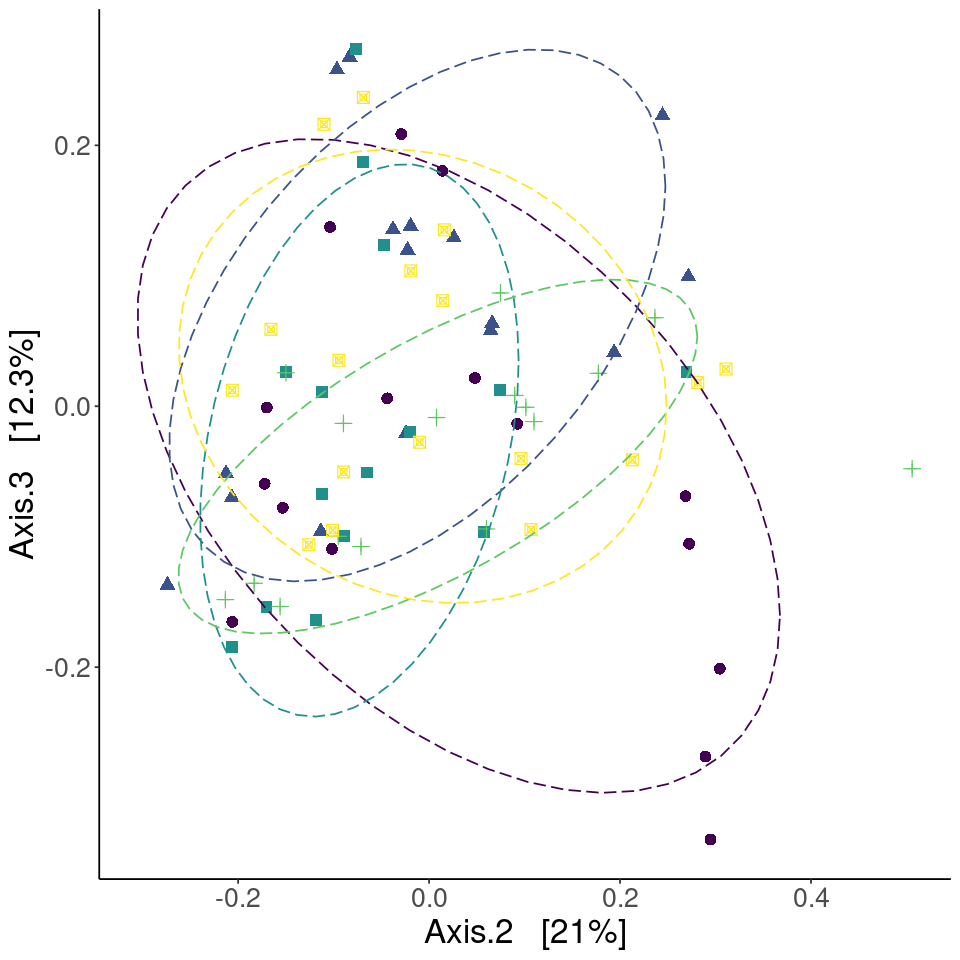

In [446]:
p_bray0_plot + scale_color_viridis(discrete = TRUE) + stat_ellipse(aes(group=TrmtTP), linetype = 5, level = 0.8, type = "t")

options(repr.plot.width=6, repr.plot.height=6)

In [447]:
p_bray1_plot <- p_bray1 + geom_point(size = 3)  +theme_bw() +theme_classic()+ 
  theme(text = element_text(size = 20))+theme(legend.position="none")

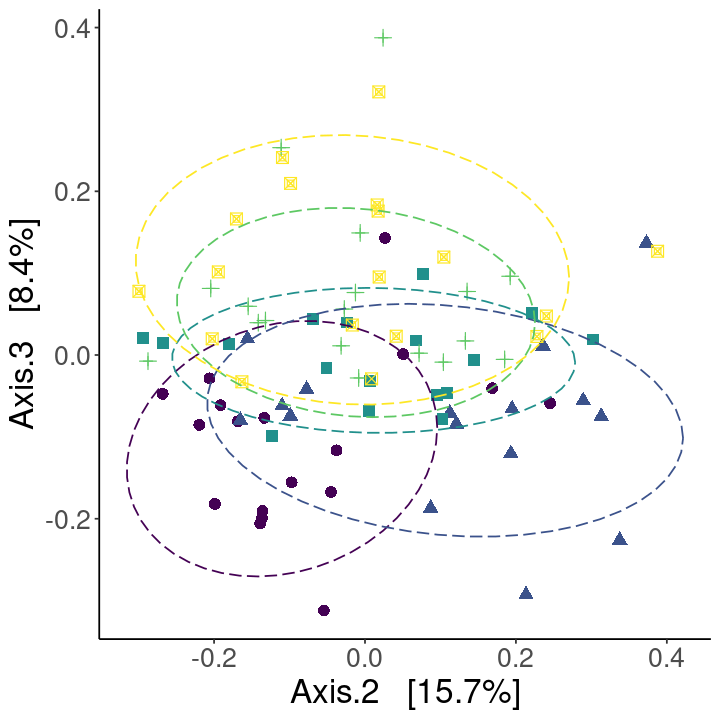

In [448]:
p_bray1_plot + scale_color_viridis(discrete = TRUE) + stat_ellipse(aes(group=TrmtTP), linetype = 5, level = 0.8, type = "t")

options(repr.plot.width=6, repr.plot.height=6)

In [449]:
p_bray2_plot <- p_bray2 + geom_point(size = 3)  +theme_bw() +theme_classic()+ 
  theme(text = element_text(size = 20))+theme(legend.position="none")

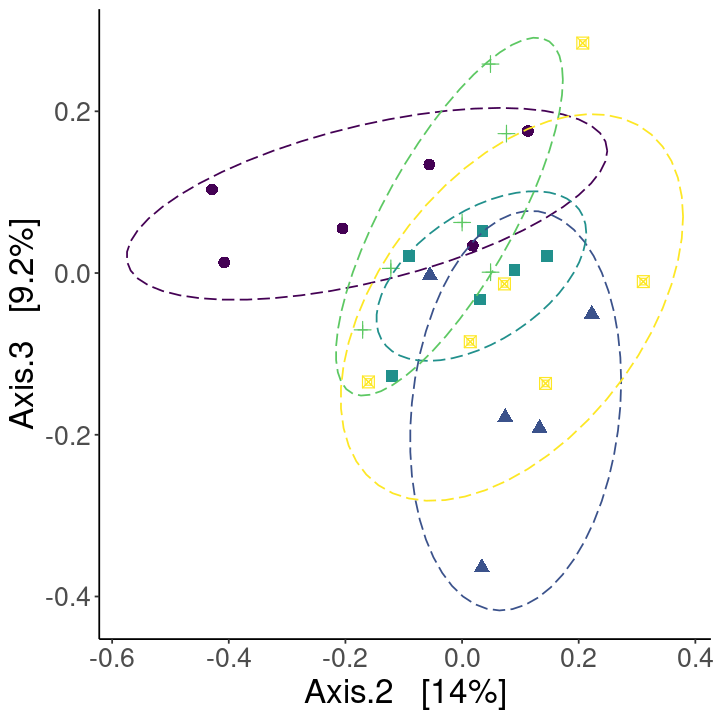

In [450]:
p_bray2_plot + scale_color_viridis(discrete = TRUE) + stat_ellipse(aes(group=TrmtTP), linetype = 5, level = 0.8, type = "t")

options(repr.plot.width=6, repr.plot.height=6)

In [451]:
p_bray3_plot <- p_bray3 + geom_point(size = 3)  +theme_bw() +theme_classic()+ 
  theme(text = element_text(size = 20))+theme(legend.position="none")

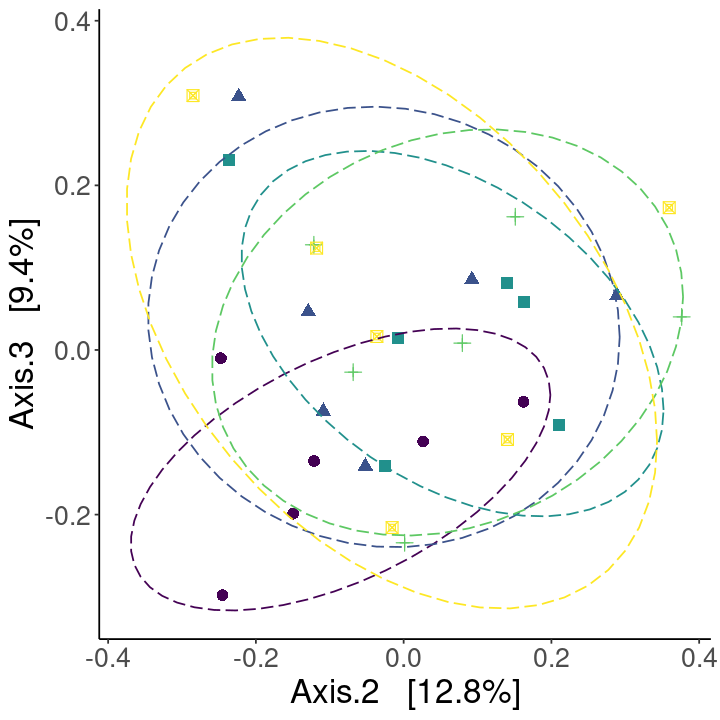

In [452]:
p_bray3_plot + scale_color_viridis(discrete = TRUE) + stat_ellipse(aes(group=TrmtTP), linetype = 5, level = 0.8, type = "t")

options(repr.plot.width=6, repr.plot.height=6)

In [453]:
#Statistics

In [454]:
bray_adonis0 <- adonis2(bray_xk0 ~ TrmtTP, data = df0)

In [455]:
bray_adonis1 <- adonis2(bray_xk1 ~ TrmtTP, data = df1)

In [456]:
bray_adonis2 <- adonis2(bray_xk2 ~ TrmtTP, data = df2)

In [457]:
bray_adonis3 <- adonis2(bray_xk3 ~ TrmtTP, data = df3)

In [458]:
bray_adonis0

Df SumOfSqs R2        F        Pr(>F)
Model     4 1.196119 0.1202886 2.563808 0.001 
Residual 75 8.747625 0.8797114       NA    NA 
Total    79 9.943744 1.0000000       NA    NA

In [459]:
bray_adonis1

Df SumOfSqs  R2        F        Pr(>F)
Model     4  2.786191 0.1801103 4.503363 0.001 
Residual 82 12.683170 0.8198897       NA    NA 
Total    86 15.469361 1.0000000       NA    NA

In [460]:
bray_adonis2

Df SumOfSqs R2        F        Pr(>F)
Model     4 1.195405 0.2128674 1.622604 0.004 
Residual 24 4.420319 0.7871326       NA    NA 
Total    28 5.615724 1.0000000       NA    NA

In [461]:
bray_adonis3

Df SumOfSqs R2        F        Pr(>F)
Model     4 1.153076 0.1572125 1.165867 0.154 
Residual 25 6.181430 0.8427875       NA    NA 
Total    29 7.334506 1.0000000       NA    NA

In [462]:
pairwise.adonis(bray_xk0, df0$TrmtTP)

pairs        Df SumsOfSqs F.Model  R2         p.value p.adjusted sig
1  CD0 vs P1D0  1  0.4692451 3.421686 0.10237922 0.009   0.09          
2  CD0 vs P2D0  1  0.4253558 2.970103 0.09290252 0.024   0.24          
3  CD0 vs P3D0  1  0.4994309 3.523028 0.10509276 0.019   0.19          
4  CD0 vs P4D0  1  0.4145187 2.934301 0.08647006 0.022   0.22          
5  P1D0 vs P2D0 1  0.1386802 1.419712 0.04667080 0.197   1.00          
6  P1D0 vs P3D0 1  0.3296631 3.372547 0.10105753 0.014   0.14          
7  P1D0 vs P4D0 1  0.1847818 1.872659 0.05696705 0.069   0.69          
8  P2D0 vs P3D0 1  0.1982500 1.934814 0.06254486 0.067   0.67          
9  P2D0 vs P4D0 1  0.2038874 1.974452 0.06175092 0.057   0.57          
10 P3D0 vs P4D0 1  0.1275908 1.236972 0.03837122 0.243   1.00

In [463]:
pairwise.adonis(bray_xk1, df1$TrmtTP)

pairs        Df SumsOfSqs F.Model  R2         p.value p.adjusted sig
1  CW1 vs P1W1  1  0.7913853 5.067344 0.13670642 0.001   0.01       *  
2  CW1 vs P2W1  1  0.7438431 4.841280 0.12793646 0.001   0.01       *  
3  CW1 vs P3W1  1  0.7459338 4.399175 0.11456430 0.001   0.01       *  
4  CW1 vs P4W1  1  0.8338653 5.009279 0.12841251 0.001   0.01       *  
5  P1W1 vs P2W1 1  0.6864715 5.073085 0.14063353 0.001   0.01       *  
6  P1W1 vs P3W1 1  0.9013971 5.899190 0.15565477 0.001   0.01       *  
7  P1W1 vs P4W1 1  0.7790626 5.210827 0.14003524 0.001   0.01       *  
8  P2W1 vs P3W1 1  0.6962275 4.629949 0.12303894 0.004   0.04       .  
9  P2W1 vs P4W1 1  0.2953075 2.006400 0.05731522 0.071   0.71          
10 P3W1 vs P4W1 1  0.5025378 3.077595 0.08300417 0.006   0.06

In [464]:
pairwise.adonis(bray_xk2, df2$TrmtTP)

pairs        Df SumsOfSqs F.Model   R2         p.value p.adjusted sig
1  CW2 vs P1W2  1  0.3844091 1.6886100 0.15798219 0.085   0.85          
2  CW2 vs P2W2  1  0.3964772 2.1394861 0.17624190 0.039   0.39          
3  CW2 vs P3W2  1  0.3234690 1.5656828 0.13537314 0.097   0.97          
4  CW2 vs P4W2  1  0.3967810 1.7705410 0.15042138 0.074   0.74          
5  P1W2 vs P2W2 1  0.3394825 2.2201313 0.19787035 0.036   0.36          
6  P1W2 vs P3W2 1  0.3647511 2.0658633 0.18668795 0.039   0.39          
7  P1W2 vs P4W2 1  0.2293006 1.1698532 0.11503147 0.278   1.00          
8  P2W2 vs P3W2 1  0.2099313 1.5066573 0.13093788 0.088   0.88          
9  P2W2 vs P4W2 1  0.1811612 1.1550846 0.10354781 0.335   1.00          
10 P3W2 vs P4W2 1  0.1729599 0.9710131 0.08850715 0.435   1.00

In [465]:
pairwise.adonis(bray_xk3, df3$TrmtTP)

pairs        Df SumsOfSqs F.Model   R2         p.value p.adjusted sig
1  CW3 vs P1W3  1  0.3457866 1.3396357 0.11813745 0.148   1.00          
2  CW3 vs P2W3  1  0.4102834 1.8953188 0.15933316 0.027   0.27          
3  CW3 vs P3W3  1  0.3531122 1.2578423 0.11173032 0.192   1.00          
4  CW3 vs P4W3  1  0.4094498 1.5647176 0.13530098 0.052   0.52          
5  P1W3 vs P2W3 1  0.2496101 1.1960842 0.10683059 0.219   1.00          
6  P1W3 vs P3W3 1  0.2557965 0.9371695 0.08568666 0.527   1.00          
7  P1W3 vs P4W3 1  0.2041374 0.8040266 0.07441916 0.756   1.00          
8  P2W3 vs P3W3 1  0.2430050 1.0506148 0.09507297 0.401   1.00          
9  P2W3 vs P4W3 1  0.2228208 1.0498237 0.09500819 0.381   1.00          
10 P3W3 vs P4W3 1  0.1886882 0.6824108 0.06388173 0.824   1.00

In [466]:
#Also examining beta dispersion, between treatments by timepoint
#doing each timepoint separate, pairwise comparison if omnibus differences present

In [467]:
#timepoint D0, day 0 beta dispersion

In [468]:
#Jaccard

In [469]:
filtered_data_D0 <- dfxk8 %>%
        filter(DayWeekNo == "D0")

In [470]:
sample_ids_D0 <- filtered_data_D0$SampleID

In [471]:
labels <- attr(jacc_PF, "Labels")

In [472]:
sample_ids_subset_D0 <- sample_ids_D0[sample_ids_D0 %in% labels]

In [473]:
jacc_PF_matrix <- as.matrix(jacc_PF)
subset_jacc_D0 <- jacc_PF_matrix[sample_ids_subset_D0, sample_ids_subset_D0]

In [474]:
filtered_data_D0$Treatment <- as.factor(filtered_data_D0$Treatment)

In [475]:
subset_jacc_dist_D0 <- as.dist(subset_jacc_D0)

In [476]:
beta_dispersion_D0 <- betadisper(subset_jacc_dist_D0, filtered_data_D0$Treatment)

In [477]:
beta_dispersion_D0


	Homogeneity of multivariate dispersions

Call: betadisper(d = subset_jacc_dist_D0, group =
filtered_data_D0$Treatment)

No. of Positive Eigenvalues: 79
No. of Negative Eigenvalues: 0

Average distance to median:
     C     P1     P2     P3     P4 
0.5612 0.5103 0.5451 0.5526 0.5356 

Eigenvalues for PCoA axes:
(Showing 8 of 79 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1.7397 1.3753 1.1822 0.8911 0.7504 0.6700 0.5735 0.5213 

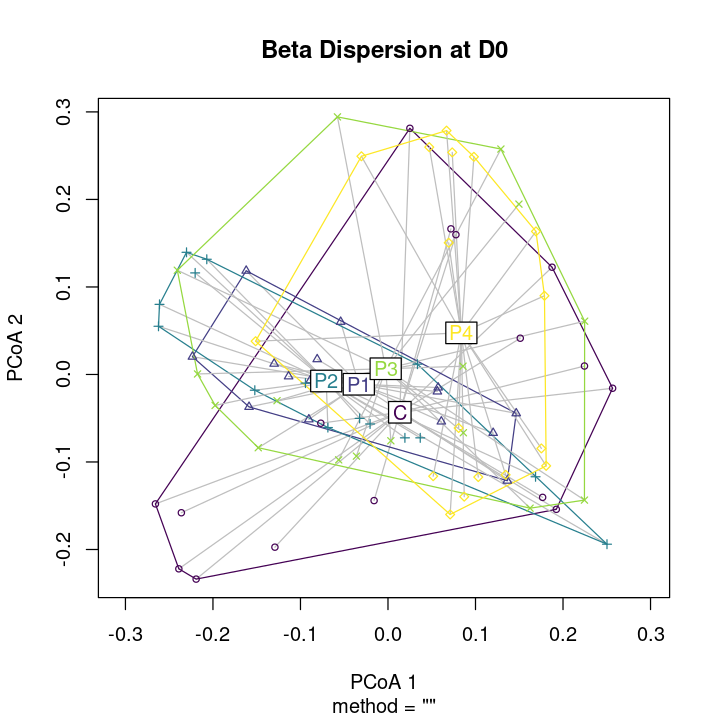

In [478]:
plot(beta_dispersion_D0, main = "Beta Dispersion at D0", col =c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))

In [479]:
anova_result_D0 <- anova(beta_dispersion_D0)
  
print(anova_result_D0)

Analysis of Variance Table

Response: Distances
          Df   Sum Sq   Mean Sq F value    Pr(>F)    
Groups     4 0.024557 0.0061392  5.4913 0.0006226 ***
Residuals 75 0.083850 0.0011180                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [480]:
pairwise_comparisons_D0 <- pairwise.t.test(beta_dispersion_D0$distances, filtered_data_D0$Treatment, p.adjust.method = "bonferroni")

print(pairwise_comparisons_D0)


	Pairwise comparisons using t tests with pooled SD 

data:  beta_dispersion_D0$distances and filtered_data_D0$Treatment 

   C       P1      P2      P3     
P1 0.00049 -       -       -      
P2 1.00000 0.04972 -       -      
P3 1.00000 0.00602 1.00000 -      
P4 0.30701 0.33012 1.00000 1.00000

P value adjustment method: bonferroni 


In [481]:
#timepoint W1, week 1 beta dispersion

In [482]:
#jaccard

In [483]:
filtered_data_W1 <- dfxk8 %>%
        filter(DayWeekNo == "W1")

In [484]:
sample_ids_W1 <- filtered_data_W1$SampleID

In [485]:
sample_ids_subset_W1 <- sample_ids_W1[sample_ids_W1 %in% labels]

In [486]:
subset_jacc_W1 <- jacc_PF_matrix[sample_ids_subset_W1, sample_ids_subset_W1]

In [487]:
filtered_data_W1$Treatment <- as.factor(filtered_data_W1$Treatment)

In [488]:
subset_jacc_dist_W1 <- as.dist(subset_jacc_W1)

In [489]:
beta_dispersion_W1 <- betadisper(subset_jacc_dist_W1, filtered_data_W1$Treatment)

In [490]:
beta_dispersion_W1


	Homogeneity of multivariate dispersions

Call: betadisper(d = subset_jacc_dist_W1, group =
filtered_data_W1$Treatment)

No. of Positive Eigenvalues: 86
No. of Negative Eigenvalues: 0

Average distance to median:
     C     P1     P2     P3     P4 
0.5513 0.5356 0.5273 0.5438 0.5465 

Eigenvalues for PCoA axes:
(Showing 8 of 86 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1.5294 0.9966 0.8853 0.8444 0.7619 0.7485 0.6627 0.6368 

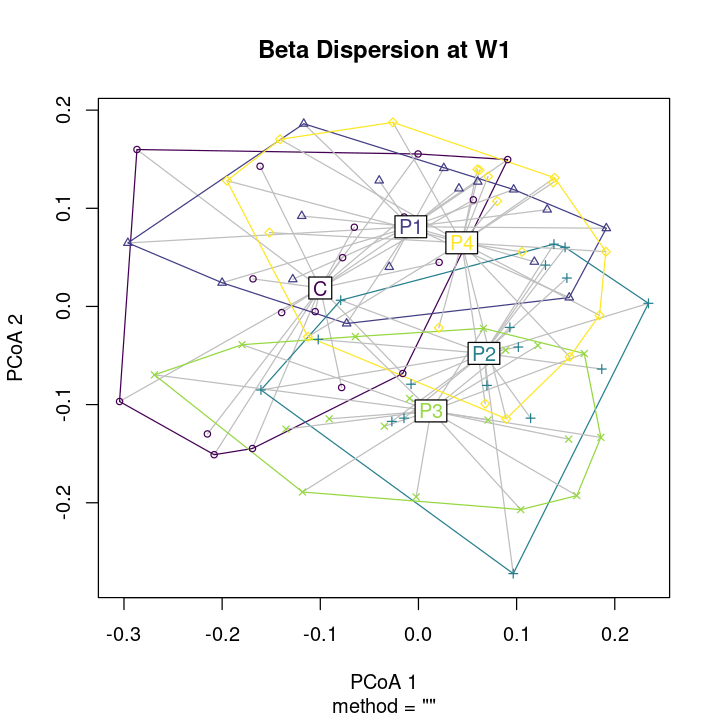

In [491]:
plot(beta_dispersion_W1, main = "Beta Dispersion at W1", col =c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))

In [492]:
anova_result_W1 <- anova(beta_dispersion_W1)
  
print(anova_result_W1)

Analysis of Variance Table

Response: Distances
          Df   Sum Sq   Mean Sq F value Pr(>F)
Groups     4 0.006242 0.0015606  1.2779 0.2854
Residuals 82 0.100141 0.0012212               


In [493]:
#timepoint W2, week 2 beta dispersion

In [494]:
#jaccard

In [495]:
filtered_data_W2 <- dfxk8 %>%
        filter(DayWeekNo == "W2")

In [496]:
sample_ids_W2 <- filtered_data_W2$SampleID

In [497]:
sample_ids_subset_W2 <- sample_ids_W2[sample_ids_W2 %in% labels]

In [498]:
subset_jacc_W2 <- jacc_PF_matrix[sample_ids_subset_W2, sample_ids_subset_W2]

In [499]:
filtered_data_W2$Treatment <- as.factor(filtered_data_W2$Treatment)

In [500]:
subset_jacc_dist_W2 <- as.dist(subset_jacc_W2)

In [501]:
beta_dispersion_W2 <- betadisper(subset_jacc_dist_W2, filtered_data_W2$Treatment)

In [502]:
beta_dispersion_W2


	Homogeneity of multivariate dispersions

Call: betadisper(d = subset_jacc_dist_W2, group =
filtered_data_W2$Treatment)

No. of Positive Eigenvalues: 28
No. of Negative Eigenvalues: 0

Average distance to median:
     C     P1     P2     P3     P4 
0.5460 0.5258 0.4930 0.5104 0.5273 

Eigenvalues for PCoA axes:
(Showing 8 of 28 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
0.7261 0.5865 0.5747 0.5064 0.4729 0.4299 0.4077 0.3973 

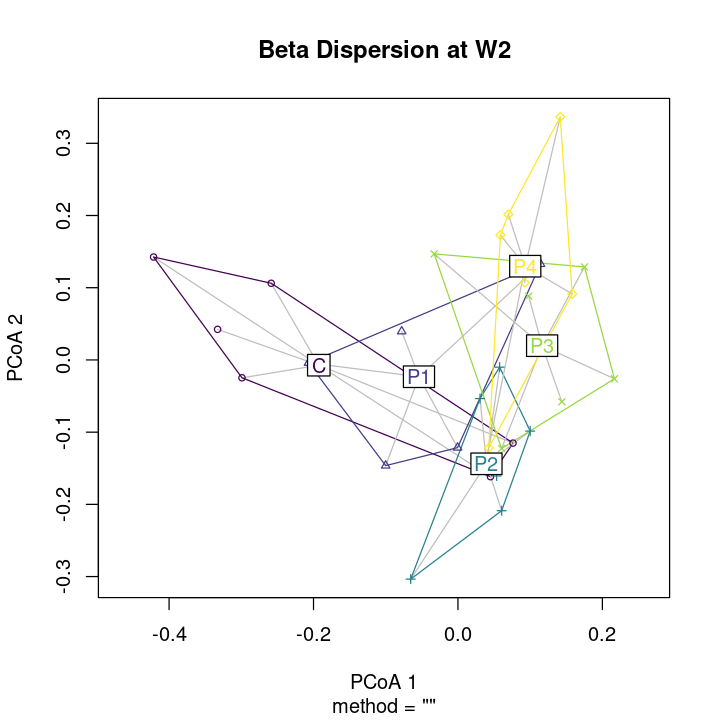

In [503]:
plot(beta_dispersion_W2, main = "Beta Dispersion at W2", col =c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))

In [504]:
anova_result_W2 <- anova(beta_dispersion_W2)
  
print(anova_result_W2)

Analysis of Variance Table

Response: Distances
          Df   Sum Sq   Mean Sq F value Pr(>F)
Groups     4 0.009468 0.0023670  1.3672 0.2748
Residuals 24 0.041548 0.0017312               


In [505]:
#timepoint W3, week 3 beta dispersion

In [506]:
#jaccard

In [507]:
filtered_data_W3 <- dfxk8 %>%
        filter(DayWeekNo == "W3")

In [508]:
sample_ids_W3 <- filtered_data_W3$SampleID

In [509]:
sample_ids_subset_W3 <- sample_ids_W3[sample_ids_W3 %in% labels]

In [510]:
subset_jacc_W3 <- jacc_PF_matrix[sample_ids_subset_W3, sample_ids_subset_W3]

In [511]:
filtered_data_W3$Treatment <- as.factor(filtered_data_W3$Treatment)

In [512]:
subset_jacc_dist_W3 <- as.dist(subset_jacc_W3)

In [513]:
beta_dispersion_W3 <- betadisper(subset_jacc_dist_W3, filtered_data_W3$Treatment)

In [514]:
beta_dispersion_W3


	Homogeneity of multivariate dispersions

Call: betadisper(d = subset_jacc_dist_W3, group =
filtered_data_W3$Treatment)

No. of Positive Eigenvalues: 29
No. of Negative Eigenvalues: 0

Average distance to median:
     C     P1     P2     P3     P4 
0.5370 0.5382 0.5030 0.5432 0.5407 

Eigenvalues for PCoA axes:
(Showing 8 of 29 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
0.6946 0.5980 0.5620 0.5095 0.4646 0.4416 0.4197 0.4086 

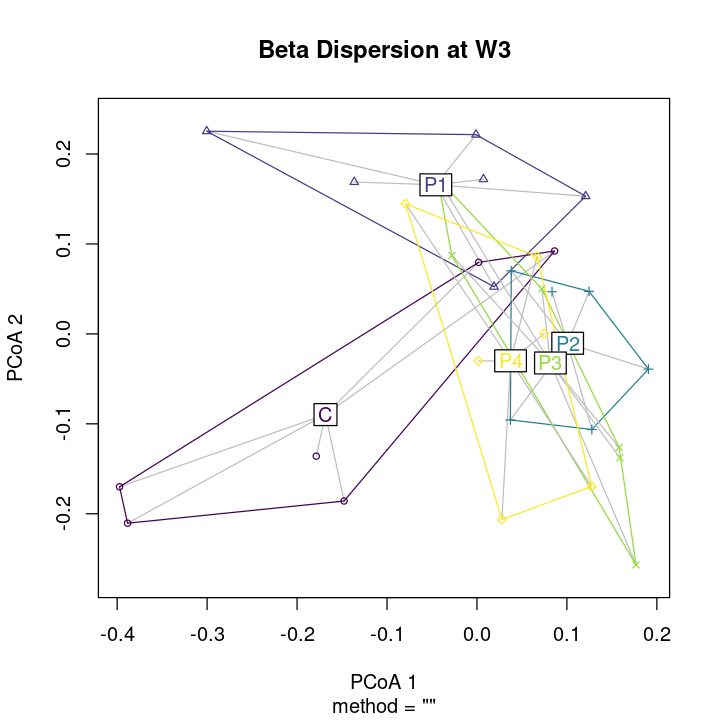

In [515]:
plot(beta_dispersion_W3, main = "Beta Dispersion at W3", col =c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))

In [516]:
anova_result_W3 <- anova(beta_dispersion_W3)
  
print(anova_result_W3)

Analysis of Variance Table

Response: Distances
          Df   Sum Sq    Mean Sq F value Pr(>F)
Groups     4 0.006634 0.00165849  2.0971 0.1113
Residuals 25 0.019772 0.00079086               


In [517]:
#timepoint D0, day 0 beta dispersion
#bray-curtis

In [518]:
labels2 <- attr(bray_PF, "Labels")

In [519]:
sample_ids_subset_D0 <- sample_ids_D0[sample_ids_D0 %in% labels2]

In [520]:
bray_PF_matrix <- as.matrix(bray_PF)
subset_bray_D0 <- bray_PF_matrix[sample_ids_subset_D0, sample_ids_subset_D0]

In [521]:
subset_bray_D0 <- bray_PF_matrix[sample_ids_subset_D0, sample_ids_subset_D0]

In [522]:
filtered_data_D0$Treatment <- as.factor(filtered_data_D0$Treatment)

In [523]:
subset_bray_dist_D0 <- as.dist(subset_bray_D0)

In [524]:
beta_dispersion_bray_D0 <- betadisper(subset_bray_dist_D0, filtered_data_D0$Treatment)

In [525]:
beta_dispersion_bray_D0


	Homogeneity of multivariate dispersions

Call: betadisper(d = subset_bray_dist_D0, group =
filtered_data_D0$Treatment)

No. of Positive Eigenvalues: 49
No. of Negative Eigenvalues: 30

Average distance to median:
     C     P1     P2     P3     P4 
0.3822 0.2867 0.3010 0.2980 0.2998 

Eigenvalues for PCoA axes:
(Showing 8 of 79 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
2.8778 2.0877 1.2235 0.8004 0.5604 0.3514 0.2605 0.2382 

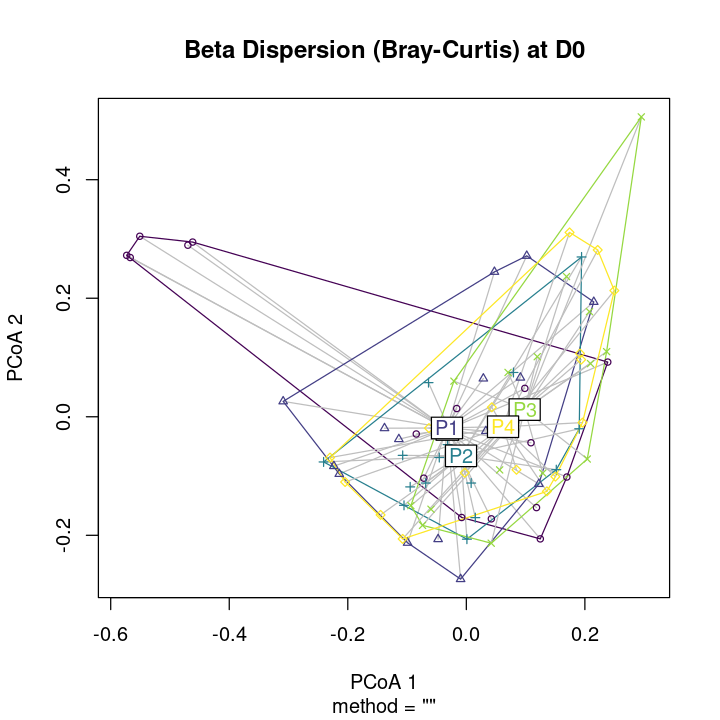

In [526]:
plot(beta_dispersion_bray_D0, main = "Beta Dispersion (Bray-Curtis) at D0", col =c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))

In [527]:
anova_result_bray_D0 <- anova(beta_dispersion_bray_D0)
  
print(anova_result_bray_D0)

Analysis of Variance Table

Response: Distances
          Df  Sum Sq  Mean Sq F value Pr(>F)
Groups     4 0.09644 0.024111  1.7779 0.1422
Residuals 75 1.01710 0.013561               


In [528]:
#timepoint W1, week 1 beta dispersion
#bray-curtis

In [529]:
sample_ids_subset_W1 <- sample_ids_W1[sample_ids_W1 %in% labels2]

In [530]:
subset_bray_W1 <- bray_PF_matrix[sample_ids_subset_W1, sample_ids_subset_W1]

In [531]:
filtered_data_W1$Treatment <- as.factor(filtered_data_W1$Treatment)

In [532]:
subset_bray_dist_W1 <- as.dist(subset_bray_W1)

In [533]:
beta_dispersion_bray_W1 <- betadisper(subset_bray_dist_W1, filtered_data_W1$Treatment)

In [534]:
beta_dispersion_bray_W1


	Homogeneity of multivariate dispersions

Call: betadisper(d = subset_bray_dist_W1, group =
filtered_data_W1$Treatment)

No. of Positive Eigenvalues: 50
No. of Negative Eigenvalues: 36

Average distance to median:
     C     P1     P2     P3     P4 
0.3871 0.3492 0.3375 0.3873 0.3746 

Eigenvalues for PCoA axes:
(Showing 8 of 86 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
4.1956 2.4348 1.2949 1.1641 0.9959 0.9298 0.5590 0.5173 

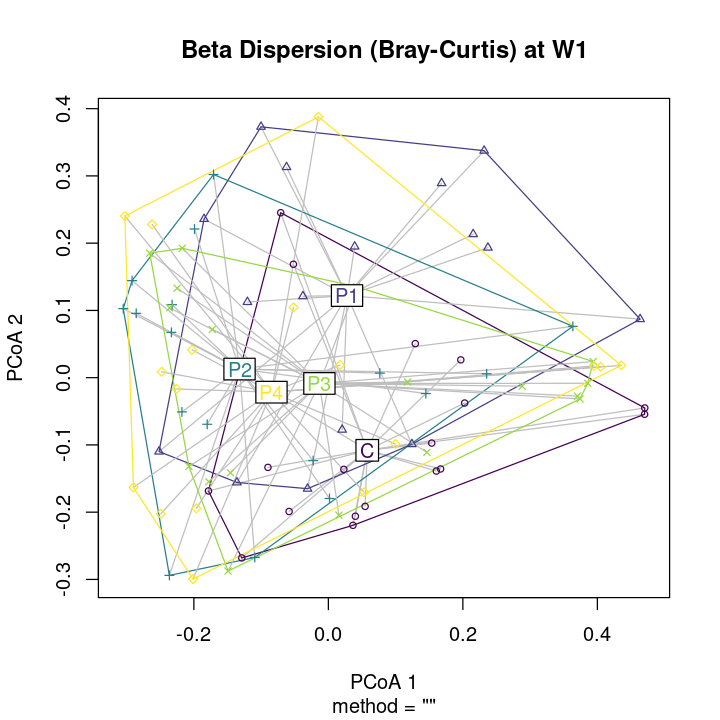

In [535]:
plot(beta_dispersion_bray_W1, main = "Beta Dispersion (Bray-Curtis) at W1", col =c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))

In [536]:
anova_result_bray_W1 <- anova(beta_dispersion_bray_W1)
  
print(anova_result_bray_W1)

Analysis of Variance Table

Response: Distances
          Df  Sum Sq   Mean Sq F value Pr(>F)
Groups     4 0.03559 0.0088984  0.7125 0.5858
Residuals 82 1.02417 0.0124899               


In [537]:
#timepoint W2, week 2 beta dispersion
#bray-curtis

In [538]:
sample_ids_subset_W2 <- sample_ids_W2[sample_ids_W2 %in% labels2]

In [539]:
subset_bray_W2 <- bray_PF_matrix[sample_ids_subset_W2, sample_ids_subset_W2]

In [540]:
filtered_data_W2$Treatment <- as.factor(filtered_data_W2$Treatment)

In [541]:
subset_bray_dist_W2 <- as.dist(subset_bray_W2)

In [542]:
beta_dispersion_bray_W2 <- betadisper(subset_bray_dist_W2, filtered_data_W2$Treatment)

In [543]:
beta_dispersion_bray_W2


	Homogeneity of multivariate dispersions

Call: betadisper(d = subset_bray_dist_W2, group =
filtered_data_W2$Treatment)

No. of Positive Eigenvalues: 25
No. of Negative Eigenvalues: 3

Average distance to median:
     C     P1     P2     P3     P4 
0.4519 0.3807 0.3067 0.3478 0.3979 

Eigenvalues for PCoA axes:
(Showing 8 of 28 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1.3497 0.7848 0.5186 0.4223 0.3947 0.3622 0.2794 0.2621 

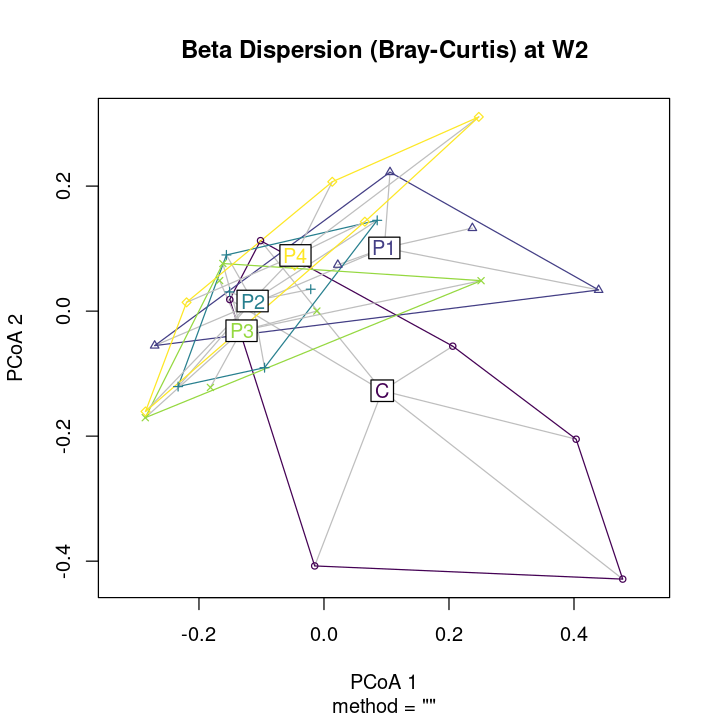

In [544]:
plot(beta_dispersion_bray_W2, main = "Beta Dispersion (Bray-Curtis) at W2", col =c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))

In [545]:
anova_result_bray_W2 <- anova(beta_dispersion_bray_W2)
  
print(anova_result_bray_W2)

Analysis of Variance Table

Response: Distances
          Df   Sum Sq  Mean Sq F value Pr(>F)
Groups     4 0.071116 0.017779  1.3978 0.2647
Residuals 24 0.305259 0.012719               


In [546]:
#timepoint W3, week 3 beta dispersion
#bray-curtis

In [547]:
sample_ids_subset_W3 <- sample_ids_W3[sample_ids_W3 %in% labels2]

In [548]:
subset_bray_W3 <- bray_PF_matrix[sample_ids_subset_W3, sample_ids_subset_W3]

In [549]:
filtered_data_W3$Treatment <- as.factor(filtered_data_W3$Treatment)

In [550]:
subset_bray_dist_W3 <- as.dist(subset_bray_W3)

In [551]:
beta_dispersion_bray_W3 <- betadisper(subset_bray_dist_W3, filtered_data_W3$Treatment)

In [552]:
beta_dispersion_bray_W3


	Homogeneity of multivariate dispersions

Call: betadisper(d = subset_bray_dist_W3, group =
filtered_data_W3$Treatment)

No. of Positive Eigenvalues: 27
No. of Negative Eigenvalues: 2

Average distance to median:
     C     P1     P2     P3     P4 
0.4600 0.4440 0.3686 0.4846 0.4563 

Eigenvalues for PCoA axes:
(Showing 8 of 29 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1.3410 0.9411 0.6877 0.5716 0.4719 0.4067 0.3579 0.3255 

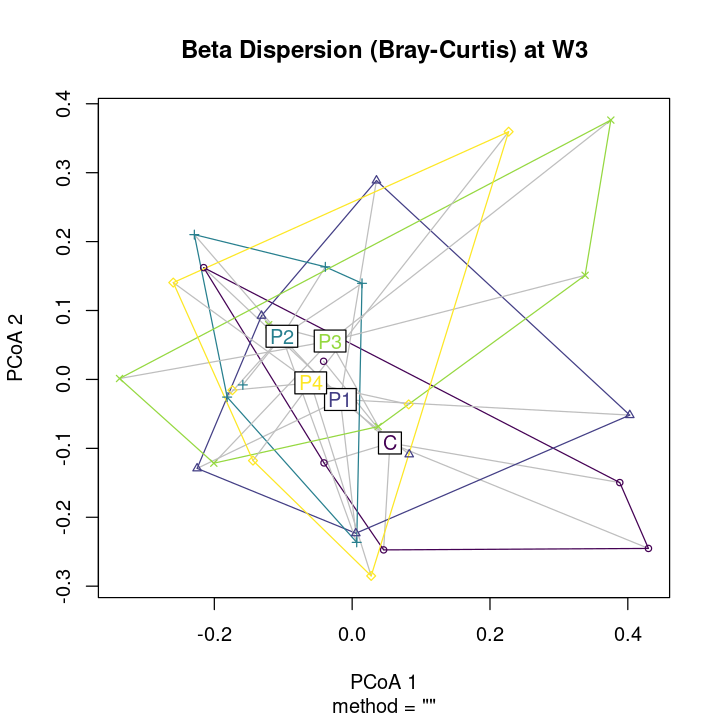

In [553]:
plot(beta_dispersion_bray_W3, main = "Beta Dispersion (Bray-Curtis) at W3", col =c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))

In [554]:
anova_result_bray_W3 <- anova(beta_dispersion_bray_W3)
  
print(anova_result_bray_W3)

Analysis of Variance Table

Response: Distances
          Df  Sum Sq  Mean Sq F value Pr(>F)
Groups     4 0.04633 0.011583  0.8515 0.5062
Residuals 25 0.34006 0.013603               


In [555]:
### qPCR ANALYSES AND FIGURES, qPCR CORRELATION WITH PROBIOTICS

In [556]:
## read excel not good with NAs
#qOnly <- read_excel("xeno_qpcr-meta.xlsx")

In [557]:
setwd("/home/joe/Documents/Smithsonian/XenopusProbioticProject/Carly_Stats/Xeno_Probiotic_results")

In [558]:
getwd()

[1] "/home/joe/Documents/Smithsonian/XenopusProbioticProject/Carly_Stats/Xeno_Probiotic_results"

In [559]:
qOnly <- read.csv("xeno_qpcr-meta.csv")

In [560]:
str(qOnly)

'data.frame':	90 obs. of  12 variables:
 $ SampleID : chr  "CF1W1" "CF2W1" "CF3W1" "CF4W1" ...
 $ Time     : chr  "W1" "W1" "W1" "W1" ...
 $ Treatment: chr  "C" "C" "C" "C" ...
 $ FrogID   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CSF1     : num  2.32 1.94 1.39 3.7 2.04 ...
 $ FOXP3    : num  290 292 NA NA NA ...
 $ IL10     : num  553 385 1113 440 2077 ...
 $ IL34     : num  625 202 1468 583 2638 ...
 $ TGFB     : num  714 231 1675 666 3019 ...
 $ TLR2     : num  78.7 101.1 354.1 201.7 516.2 ...
 $ TLR6     : num  123.1 82 257 67.4 547.1 ...
 $ TNFA     : num  149 141 512 251 1249 ...


In [561]:
## We decided that zeros should be considered NAs in gene expression data

In [562]:
## qPCR data of gene expression change between treatments and over time

### CONCLUSION: CSF1, FOXP3, IL10 are not strongly linked and examined. IL10 is linked to IL34, TGFB, TLR2, TLR6, TNFA (these genes not examined)

### CSF1: At week 1 and 3, probiotic application does not affect CSF1 expression among treatments (Kruskal-Wallis p > 0.05)

### FOXP3: At week 1, probiotic application does affect FOXP3 expression among treatments (Kruskal-Wallis chi-squared = 11.976, df = 4, p-value = 0.018). The exposure of frogs to Pseudomonas RSB5.4 (P1) caused lower FOXP3 expression compared to frogs treated with the cocktail (P4; post-hoc p = 0.05) and to control frogs (p = 0.05). Additionally, the exposure of frogs to P3 caused lower FOXP3 expression compared to frogs treated with the cocktail (P4; p = 0.05). By week 3, the effects are no longer detected (Kruskal-Wallis p > 0.05).

### IL10: At week 1, probiotic application marginally affected IL10 expression among treatments (Kruskal-Wallis chi-squared = 9.2812, df = 4, p-value = 0.054). The exposure of frogs to the cocktail (P4) caused lower IL10 expression compared to frogs treated with Pseudomonas RSB5.4 (P1; p = 0.056).

### It appears there is an offset going on here maybe? The cocktail has increased expression of FOXP3 compared to P1 and P3, but then decreases expression of IL10.

In [563]:
qdf <- qOnly[,5:12]

In [564]:
str(qOnly)

'data.frame':	90 obs. of  12 variables:
 $ SampleID : chr  "CF1W1" "CF2W1" "CF3W1" "CF4W1" ...
 $ Time     : chr  "W1" "W1" "W1" "W1" ...
 $ Treatment: chr  "C" "C" "C" "C" ...
 $ FrogID   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CSF1     : num  2.32 1.94 1.39 3.7 2.04 ...
 $ FOXP3    : num  290 292 NA NA NA ...
 $ IL10     : num  553 385 1113 440 2077 ...
 $ IL34     : num  625 202 1468 583 2638 ...
 $ TGFB     : num  714 231 1675 666 3019 ...
 $ TLR2     : num  78.7 101.1 354.1 201.7 516.2 ...
 $ TLR6     : num  123.1 82 257 67.4 547.1 ...
 $ TNFA     : num  149 141 512 251 1249 ...


In [565]:
## need to remove NAs
## FOXP3 has a lot of NAs

In [566]:
sum(is.na(qdf))

[1] 30

In [567]:
qdf2 <- na.omit(qdf)

In [568]:
cor(qdf2)

CSF1       FOXP3     IL10       IL34       TGFB       TLR2      
CSF1   1.0000000 0.2992808 -0.3476719 -0.3680482 -0.3677570 -0.2865985
FOXP3  0.2992808 1.0000000  0.1382658  0.1319526  0.1329778  0.1738916
IL10  -0.3476719 0.1382658  1.0000000  0.9892532  0.9891197  0.9249106
IL34  -0.3680482 0.1319526  0.9892532  1.0000000  0.9999704  0.8976541
TGFB  -0.3677570 0.1329778  0.9891197  0.9999704  1.0000000  0.8975934
TLR2  -0.2865985 0.1738916  0.9249106  0.8976541  0.8975934  1.0000000
TLR6  -0.2916561 0.1908799  0.9797125  0.9656938  0.9655103  0.8864516
TNFA  -0.3482680 0.1423729  0.9842874  0.9718451  0.9717494  0.9195672
      TLR6       TNFA      
CSF1  -0.2916561 -0.3482680
FOXP3  0.1908799  0.1423729
IL10   0.9797125  0.9842874
IL34   0.9656938  0.9718451
TGFB   0.9655103  0.9717494
TLR2   0.8864516  0.9195672
TLR6   1.0000000  0.9472430
TNFA   0.9472430  1.0000000

In [569]:
## IL10 strongly correlated to IL34, TGFB, TLR2, TLR6, TNFA

#### Not sure here on what to pick, one and then report its strong correlation

### Final genes would be CSF1, FOXP3, IL10

## skewed distribution and can't achieve normality with some standard transformations for right skew

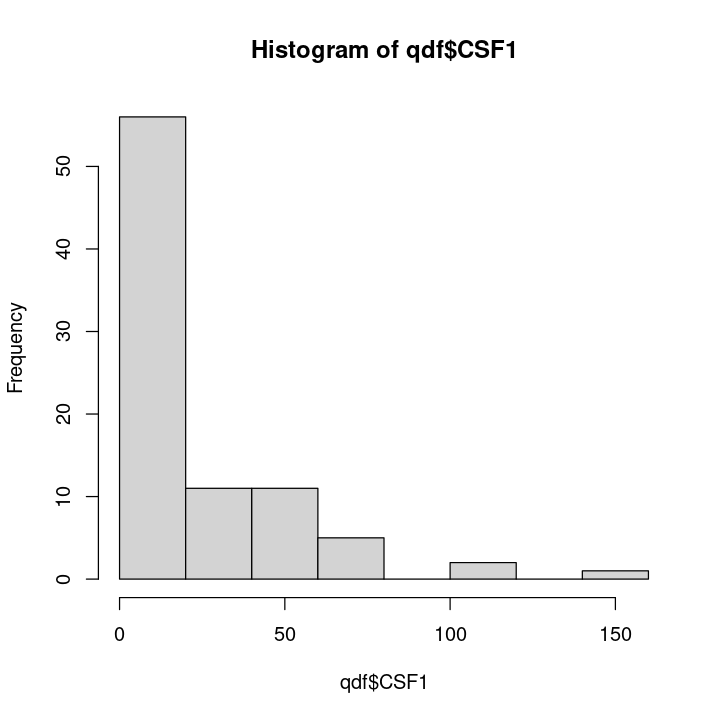

In [570]:
hist(qdf$CSF1)

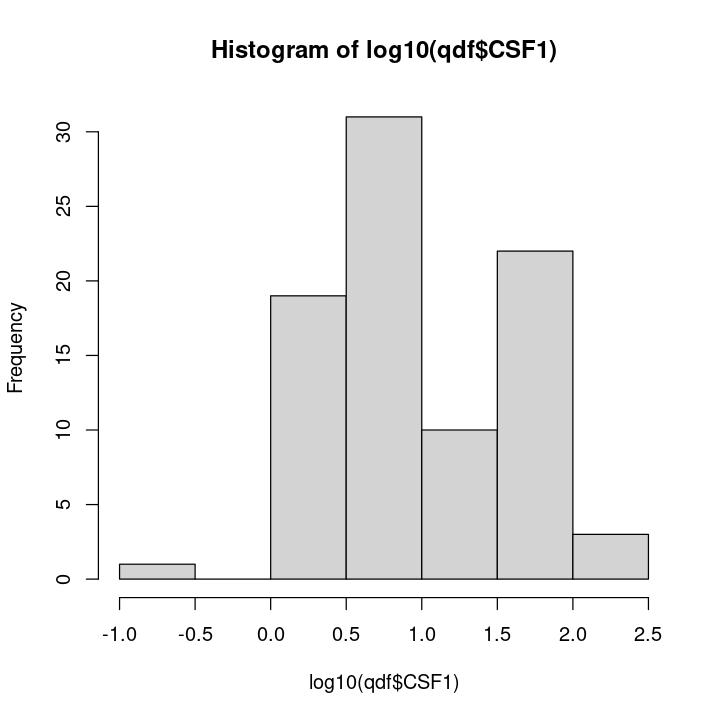

In [571]:
hist(log10(qdf$CSF1))

In [572]:
shapiro.test(log10(qdf$CSF1+1))


	Shapiro-Wilk normality test

data:  log10(qdf$CSF1 + 1)
W = 0.93786, p-value = 0.0004471


In [573]:
shapiro.test((qdf$CSF1)^(1/3))


	Shapiro-Wilk normality test

data:  (qdf$CSF1)^(1/3)
W = 0.91107, p-value = 1.974e-05


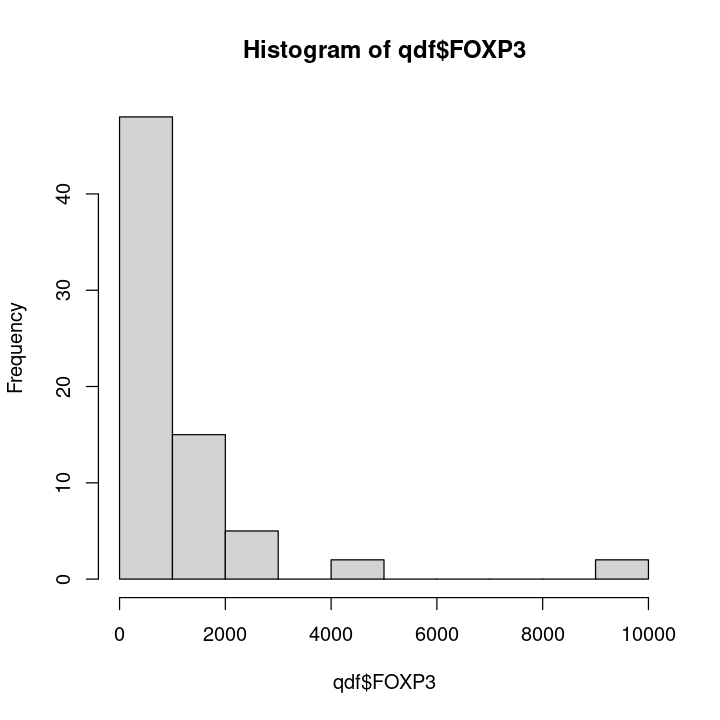

In [574]:
hist(qdf$FOXP3)

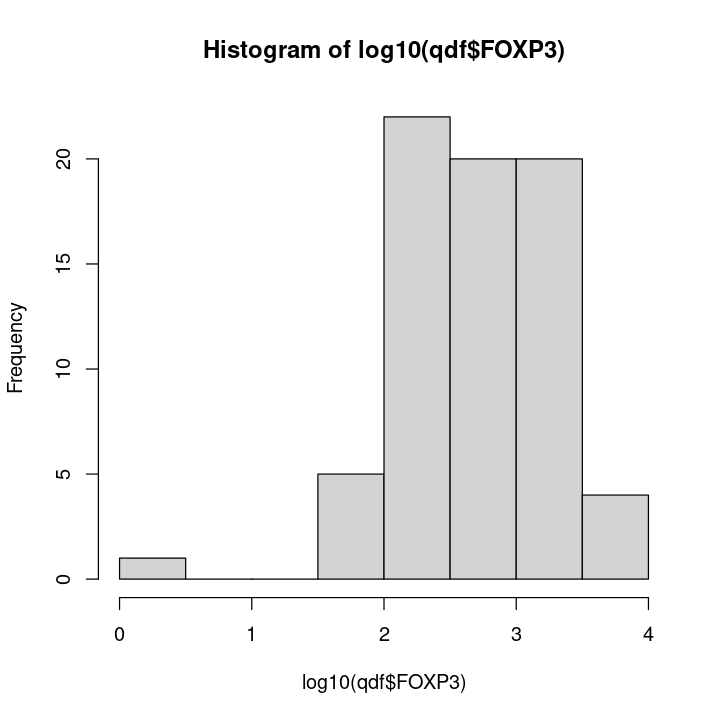

In [575]:
hist(log10(qdf$FOXP3))

In [576]:
shapiro.test(log10(qdf$FOXP3+1))


	Shapiro-Wilk normality test

data:  log10(qdf$FOXP3 + 1)
W = 0.95217, p-value = 0.008157


In [577]:
shapiro.test((qdf$FOXP3)^(1/3))


	Shapiro-Wilk normality test

data:  (qdf$FOXP3)^(1/3)
W = 0.9243, p-value = 0.0003348


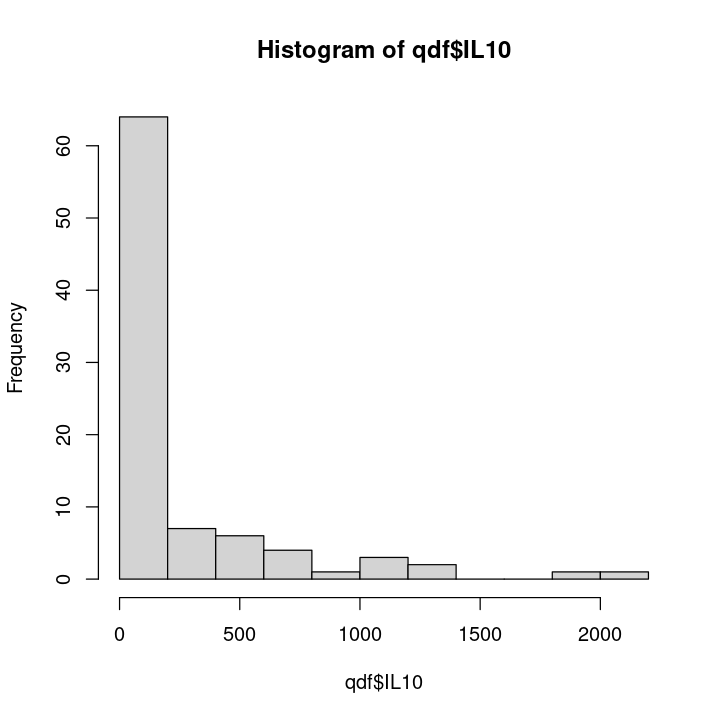

In [578]:
hist(qdf$IL10)

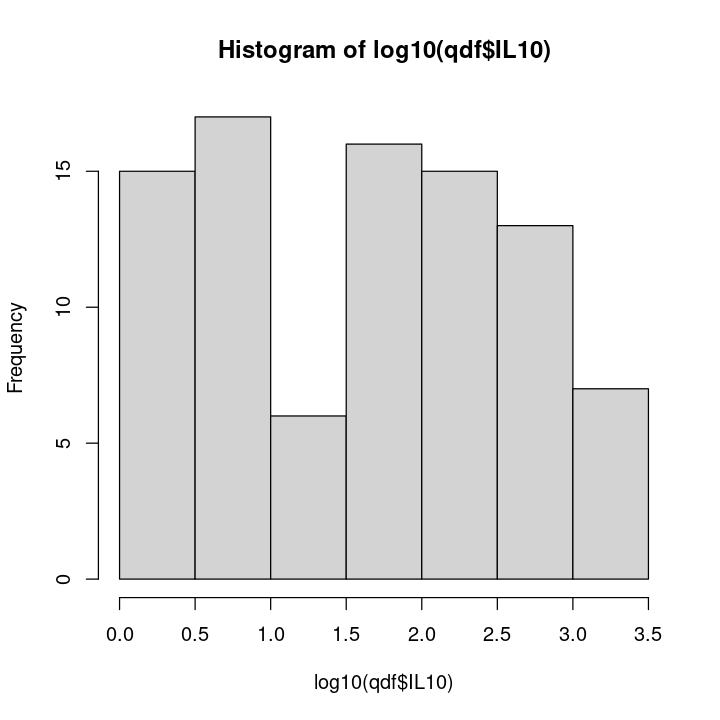

In [579]:
hist(log10(qdf$IL10))

In [580]:
shapiro.test(log10(qdf$IL10+1))


	Shapiro-Wilk normality test

data:  log10(qdf$IL10 + 1)
W = 0.93772, p-value = 0.0003423


In [581]:
shapiro.test((qdf$IL10)^(1/3))


	Shapiro-Wilk normality test

data:  (qdf$IL10)^(1/3)
W = 0.89284, p-value = 2.195e-06


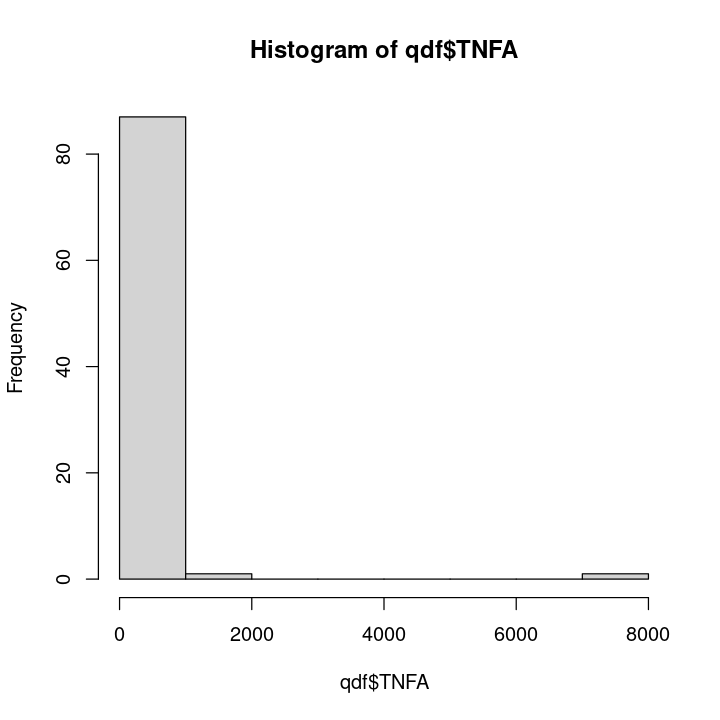

In [582]:
hist(qdf$TNFA)

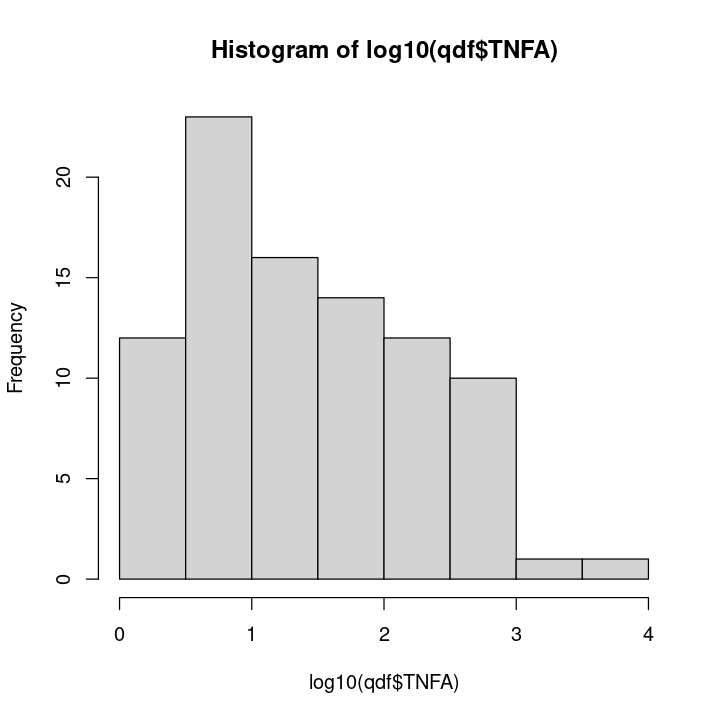

In [583]:
hist(log10(qdf$TNFA))

In [584]:
shapiro.test(log10(qdf$TNFA+1))


	Shapiro-Wilk normality test

data:  log10(qdf$TNFA + 1)
W = 0.94103, p-value = 0.0005274


In [585]:
shapiro.test((qdf$TNFA)^(1/3))


	Shapiro-Wilk normality test

data:  (qdf$TNFA)^(1/3)
W = 0.76444, p-value = 1.242e-10


In [586]:
wk1 <- qOnly[qOnly$Time =="W1",]

In [587]:
## CSF1: probiotic application does not affect CSF1 expression

In [588]:
kruskal.test(CSF1 ~ Treatment, data = wk1)


	Kruskal-Wallis rank sum test

data:  CSF1 by Treatment
Kruskal-Wallis chi-squared = 5.7175, df = 4, p-value = 0.2213


In [589]:
dunnTest(CSF1 ~ Treatment,
         data=wk1,
         method="bh")

Warning message:
“Treatment was coerced to a factor.”
Warning message:
“Some rows deleted from 'x' and 'g' because missing data.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Benjamini-Hochberg method.




   Comparison           Z    P.unadj     P.adj
1      C - P1  1.21369984 0.22486237 0.7495412
2      C - P2  0.95267946 0.34075250 0.6815050
3     P1 - P2 -0.21106185 0.83283901 0.9253767
4      C - P3  1.97144217 0.04867332 0.2433666
5     P1 - P3  0.77477237 0.43847418 0.5480927
6     P2 - P3  0.94977832 0.34222490 0.5703748
7      C - P4  0.03498954 0.97208808 0.9720881
8     P1 - P4 -1.20520147 0.22812553 0.5703138
9     P2 - P4 -0.93805267 0.34821735 0.4974534
10    P3 - P4 -1.97997385 0.04770647 0.4770647

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


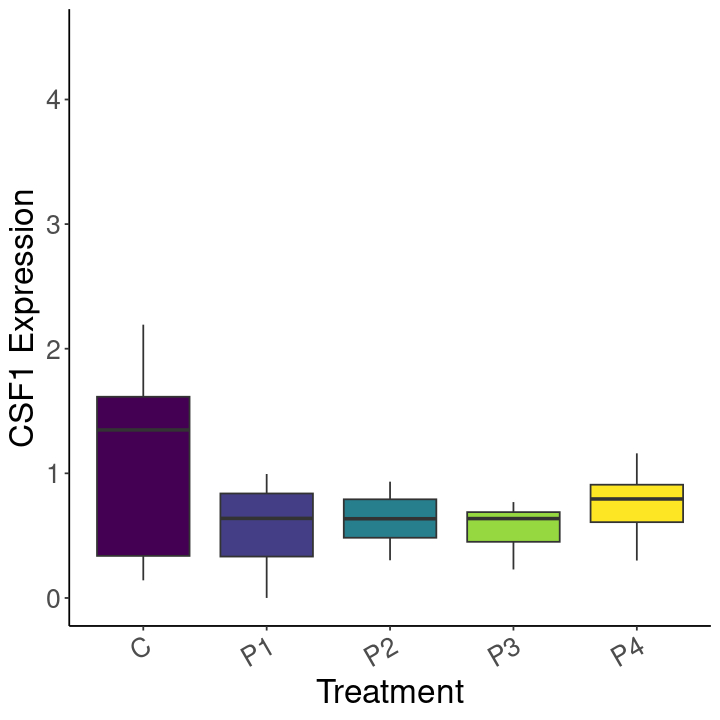

In [590]:
ggplot(data = wk1, aes(x=Treatment, y=log10(CSF1), fill=Treatment))+ geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("CSF1 Expression") + xlab("Treatment")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 4.5) + theme(legend.position="none")

In [591]:
##FOXP3: probiotic application affectS FOXP3 expression for C-P1 and P1-P4 comparisons

In [592]:
kruskal.test(FOXP3 ~ Treatment, data = wk1)


	Kruskal-Wallis rank sum test

data:  FOXP3 by Treatment
Kruskal-Wallis chi-squared = 11.976, df = 4, p-value = 0.01753


In [593]:
dunnTest(FOXP3 ~ Treatment,
         data=wk1,
         method="bh")

Warning message:
“Treatment was coerced to a factor.”
Warning message:
“Some rows deleted from 'x' and 'g' because missing data.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Benjamini-Hochberg method.




   Comparison          Z     P.unadj      P.adj
1      C - P1  2.9807061 0.002875847 0.02875847
2      C - P2  1.4566267 0.145219442 0.29043888
3     P1 - P2 -1.3392651 0.180484373 0.30080729
4      C - P3  2.0722577 0.038241418 0.12747139
5     P1 - P3 -0.6927233 0.488483184 0.61060398
6     P2 - P3  0.5960821 0.551120395 0.55112040
7      C - P4  0.5960948 0.551111890 0.61234654
8     P1 - P4 -2.6019905 0.009268441 0.04634220
9     P2 - P4 -0.9863507 0.323961043 0.46280149
10    P3 - P4 -1.6453442 0.099898840 0.24974710

Warning message:
“Removed 17 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 17 rows containing non-finite outside the scale range
(`stat_signif()`).”
Warning message in wilcox.test.default(c(2.46241736924717, 2.46542766907002, NA, :
“cannot compute exact p-value with ties”


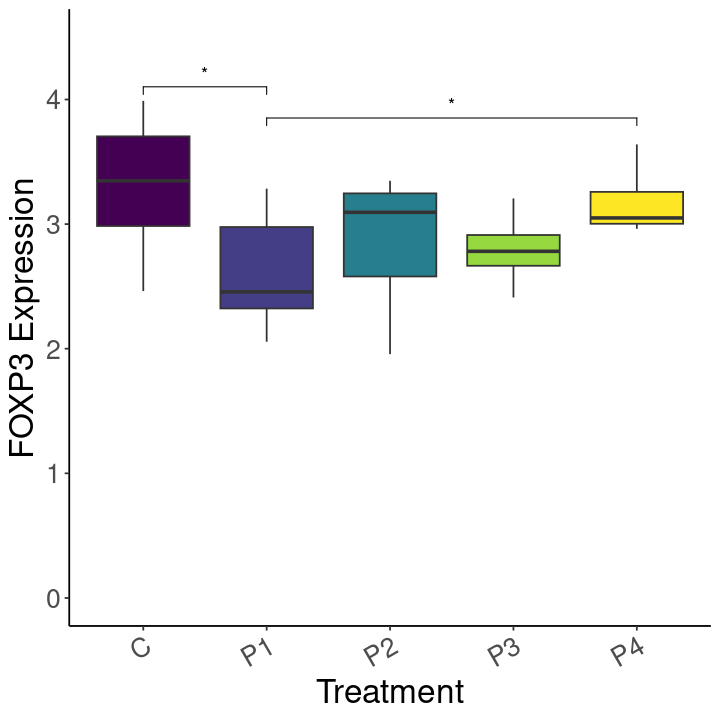

In [594]:
my_comparisons = list(c("C", "P1"), c("P1", "P4"))

ggplot(data = wk1, aes(x=Treatment, y=log10(FOXP3), fill=Treatment))+ geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("FOXP3 Expression") + xlab("Treatment")+ theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
  stat_compare_means(comparisons = my_comparisons, label.y = c(4, 3.75), symnum.args = list(cutpoints = c(0, 0.05), symbols = c("*")))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 4.5) + theme(legend.position="none")


In [595]:
##IL10: probiotic application does not affect IL10 expression

In [596]:
kruskal.test(IL10 ~ Treatment, data = wk1)


	Kruskal-Wallis rank sum test

data:  IL10 by Treatment
Kruskal-Wallis chi-squared = 9.2812, df = 4, p-value = 0.05444


In [597]:
dunnTest(CSF1 ~ Treatment,
         data=wk1,
         method="bh")

Warning message:
“Treatment was coerced to a factor.”
Warning message:
“Some rows deleted from 'x' and 'g' because missing data.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Benjamini-Hochberg method.




   Comparison           Z    P.unadj     P.adj
1      C - P1  1.21369984 0.22486237 0.7495412
2      C - P2  0.95267946 0.34075250 0.6815050
3     P1 - P2 -0.21106185 0.83283901 0.9253767
4      C - P3  1.97144217 0.04867332 0.2433666
5     P1 - P3  0.77477237 0.43847418 0.5480927
6     P2 - P3  0.94977832 0.34222490 0.5703748
7      C - P4  0.03498954 0.97208808 0.9720881
8     P1 - P4 -1.20520147 0.22812553 0.5703138
9     P2 - P4 -0.93805267 0.34821735 0.4974534
10    P3 - P4 -1.97997385 0.04770647 0.4770647

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


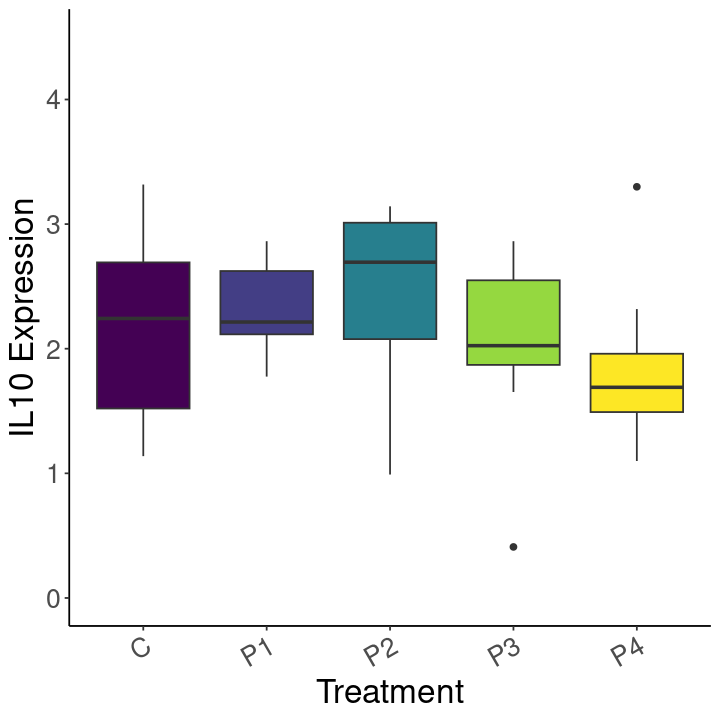

In [598]:
ggplot(data = wk1, aes(x=Treatment, y=log10(IL10), fill=Treatment))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("IL10 Expression") + xlab("Treatment")+ theme(axis.text.x = element_text(angle = 30, hjust = 1))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 4.5) + theme(legend.position="none")


In [599]:
##TNFA: probiotic application affectS FOXP3 expression for P1-P4 and P2-P4 comparisons

In [600]:
kruskal.test(TNFA ~ Treatment, data = wk1)


	Kruskal-Wallis rank sum test

data:  TNFA by Treatment
Kruskal-Wallis chi-squared = 12.823, df = 4, p-value = 0.01217


In [601]:
dunnTest(TNFA ~ Treatment,
         data=wk1,
         method="bh")

Warning message:
“Treatment was coerced to a factor.”
Warning message:
“Some rows deleted from 'x' and 'g' because missing data.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Benjamini-Hochberg method.




   Comparison          Z      P.unadj       P.adj
1      C - P1 -0.3446524 0.7303556701 0.730355670
2      C - P2 -1.1179536 0.2635868140 0.439311357
3     P1 - P2 -0.7808768 0.4348749301 0.543593663
4      C - P3  0.6417666 0.5210247198 0.578916355
5     P1 - P3  0.9864191 0.3239275066 0.462753581
6     P2 - P3  1.7456137 0.0808780933 0.202195233
7      C - P4  2.2699523 0.0232104751 0.077368250
8     P1 - P4  2.6146048 0.0089330754 0.044665377
9     P2 - P4  3.3380108 0.0008438048 0.008438048
10    P3 - P4  1.6281857 0.1034855143 0.206971029

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_signif()`).”


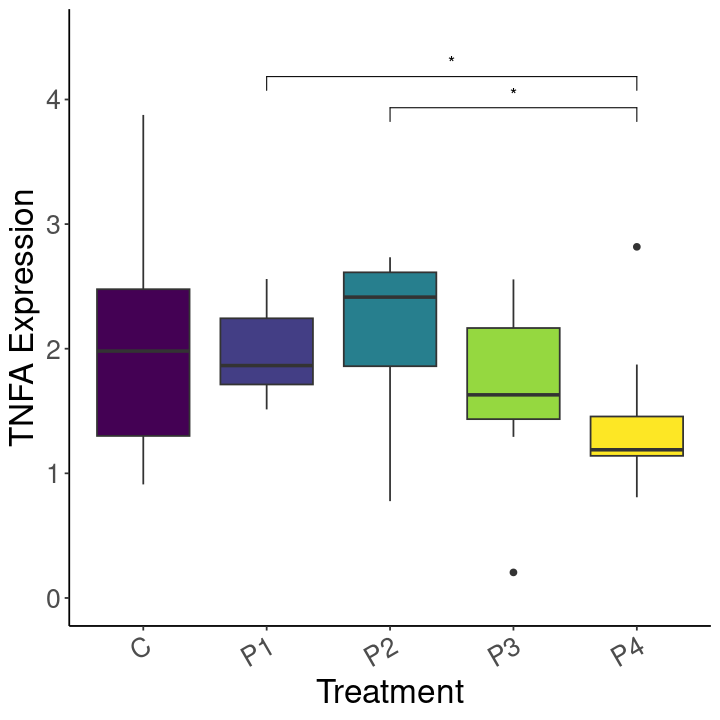

In [602]:
my_comparisons = list(c("P1", "P4"), c("P2", "P4"))

ggplot(data = wk1, aes(x=Treatment, y=log10(TNFA), fill=Treatment))+geom_boxplot()+theme_bw()+theme_classic()+
  theme(text = element_text(size = 20)) + ylab("TNFA Expression") + xlab("Treatment")+ theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
  stat_compare_means(comparisons = my_comparisons, label.y = c(4, 3.75), symnum.args = list(cutpoints = c(0, 0.05), symbols = c("*")))+
  scale_fill_manual(values=c("#440154","#433E85FF","#277f8e","#95d840","#FDE725FF"))+ ylim(0, 4.5) + theme(legend.position="none")

In [603]:
## Week 3, nothing significant

In [604]:
wk3 <- qOnly[qOnly$Time =="W3",]

In [605]:
kruskal.test(CSF1 ~ Treatment, data = wk3)


	Kruskal-Wallis rank sum test

data:  CSF1 by Treatment
Kruskal-Wallis chi-squared = 2.7103, df = 4, p-value = 0.6074


In [606]:
kruskal.test(FOXP3 ~ Treatment, data = wk3)


	Kruskal-Wallis rank sum test

data:  FOXP3 by Treatment
Kruskal-Wallis chi-squared = 4.988, df = 4, p-value = 0.2885


In [607]:
kruskal.test(IL10 ~ Treatment, data = wk3)


	Kruskal-Wallis rank sum test

data:  IL10 by Treatment
Kruskal-Wallis chi-squared = 3.9312, df = 4, p-value = 0.4154


In [608]:
kruskal.test(TNFA ~ Treatment, data = wk3)


	Kruskal-Wallis rank sum test

data:  TNFA by Treatment
Kruskal-Wallis chi-squared = 4.5707, df = 4, p-value = 0.3342


In [609]:
## What about their relationship to the abundance of each probiotic
## Week 1 would make sense to ask this

In [610]:
## Gene expression and probiotic relationships

### Want to ask is gene expression related to abundance of each probiotic. Prior question is does expression differ among treatments. Here we are zooming into each treatment group and looking for direct relationships. 
### Only asking at wk1
### To do so need to go into each treatment and ask about correlation between gene expression and probiotic seq counts
### Final genes would be CSF1, FOXP3, IL10 based on correlations above. We are still interested in CSF1 and all treatment groups. Putting CSF1 last for analysis in sequential sums of squares as nothing pulled out above.

#### Multiple linear regression (MLR)

### CONCLUSION: The amount of probiotics in any of the probiotic treatments were not directly correlated to gene expression for CSF1, FOXP3, IL10 (MLR: p > 0.05). 

In [611]:
wk1qm <- XPdfq[XPdfq$DayWeekNo ==  "W1",]

In [612]:
wk1qm <- wk1qm[wk1qm$qPCR ==  "Y",]

In [613]:
str(wk1qm)

'data.frame':	59 obs. of  54 variables:
 $ Row.names.x                        : chr  "CF10W1" "CF11W1" "CF12W1" "CF1W1" ...
 $ quant_reading                      : num  43.2 50.2 46.8 49 37.4 51.8 57 41 55.4 49.4 ...
 $ Treatment                          : chr  "C" "C" "C" "C" ...
 $ FrogID                             : chr  "F10" "F11" "F12" "F1" ...
 $ FrogNo                             : int  10 11 12 1 2 3 4 5 6 7 ...
 $ DayWeekNo                          : chr  "W1" "W1" "W1" "W1" ...
 $ Day                                : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Sample.type                        : chr  "swab" "swab" "swab" "swab" ...
 $ TrmtTP                             : chr  "CW1" "CW1" "CW1" "CW1" ...
 $ TubeLabel                          : chr  "CF10W1" "CF11W1" "CF12W1" "CF1W1" ...
 $ ExtractionDate                     : chr  "10/5/22" "10/13/22" "10/13/22" "10/3/22" ...
 $ ExtColumn                          : chr  "F" "B" "C" "E" ...
 $ ExtRow                             : int  8

In [614]:
wk1qm$CSF1

[1]  40.253105  39.944480  22.297875   2.321995   1.939701   1.385392
 [7]   3.696659   2.036857         NA  42.105866 155.973725  51.830155
[13]   3.346359   1.737966   4.193680   7.467685   6.105618   7.464253
[19]   6.711970   9.874380   1.750820   2.300213   1.000112   4.507950
[25]   2.369043         NA   4.157271   6.656819   4.302761   8.574945
[31]   2.741376   4.969423   6.780459   2.005146   4.340040   0.175989
[37]   1.970047   2.680120   5.029696   4.900528   5.882922   4.333555
[43]   3.041780   2.970590   4.867495   4.398213   1.692255   2.156053
[49]   6.522561   1.995221   5.945254   8.665149   2.923195  14.469701
[55]   5.670696   7.925778   9.214769   6.738357   4.525082

In [615]:
wk1qm$CSF1 <- as.numeric(wk1qm$CSF1)

In [616]:
wk1qm$FOXP3 <- as.numeric(wk1qm$FOXP3)

In [617]:
wk1qm$IL10 <- as.numeric(wk1qm$IL10)

In [618]:
## Transform the genes to get more normal, based on above

In [619]:
wk1qm$CSF1l <- log10(wk1qm$CSF1)

In [620]:
wk1qm$FOXP3l <- log10(wk1qm$FOXP3)

In [621]:
wk1qm$IL10l <- log10(wk1qm$IL10)

In [622]:
P1w1 <- wk1qm[wk1qm$Treatment == "P1",]

In [623]:
## need to think about type I, type II and Type III sums of squares
## lm reports type III, anova reports type I
## lm default type III, same as Type II if there is no interaction term
## I generally prefer sequential type I to capture shared variation
## Will use lm and anova, which is also the same as running it as aov

In [624]:
### NOTHING HERE for P1 and genes

In [625]:
P1w1m <- lm(ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~  FOXP3l + IL10l + CSF1l, data = P1w1)

In [626]:
vif(P1w1m)

FOXP3l    IL10l    CSF1l 
1.826853 3.328646 2.834210

In [627]:
## Above 10

In [628]:
## report this:

In [629]:
anova(P1w1m)

Df Sum Sq     Mean Sq   F value    Pr(>F)   
FOXP3l    1    5181.557  5181.557 0.11356630 0.7475955
IL10l     1    2060.060  2060.060 0.04515117 0.8387613
CSF1l     1    8605.805  8605.805 0.18861694 0.6792535
Residuals 6  273754.979 45625.830         NA        NA

In [630]:
## showing differeent sums of squares

In [631]:
summary(P1w1m)


Call:
lm(formula = ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ FOXP3l + IL10l + 
    CSF1l, data = P1w1)

Residuals:
     Min       1Q   Median       3Q      Max 
-272.798 -121.915   -8.229  103.057  311.775 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    525.8      969.9   0.542    0.607
FOXP3l         127.4      221.9   0.574    0.587
IL10l         -223.0      469.5  -0.475    0.652
CSF1l         -167.1      384.7  -0.434    0.679

Residual standard error: 213.6 on 6 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.05472,	Adjusted R-squared:  -0.4179 
F-statistic: 0.1158 on 3 and 6 DF,  p-value: 0.9476


In [632]:
Anova(P1w1m, type = "2")

Sum Sq     Df F value   Pr(>F)   
FOXP3l     15044.060 1  0.3297268 0.5866863
IL10l      10298.195 1  0.2257098 0.6515237
CSF1l       8605.805 1  0.1886169 0.6792535
Residuals 273754.979 6         NA        NA

In [633]:
Anova(P1w1m, type = "3")

Sum Sq     Df F value   Pr(>F)   
(Intercept)  13407.904 1  0.2938665 0.6072830
FOXP3l       15044.060 1  0.3297268 0.5866863
IL10l        10298.195 1  0.2257098 0.6515237
CSF1l         8605.805 1  0.1886169 0.6792535
Residuals   273754.979 6         NA        NA

In [634]:
### Exact same as above

In [635]:
P1w1mA <- aov(ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ FOXP3l  + IL10l +CSF1l, data = P1w1)

In [636]:
summary(P1w1mA)

            Df Sum Sq Mean Sq F value Pr(>F)
FOXP3l       1   5182    5182   0.114  0.748
IL10l        1   2060    2060   0.045  0.839
CSF1l        1   8606    8606   0.189  0.679
Residuals    6 273755   45626               
2 observations deleted due to missingness

In [637]:
## Looks better with log

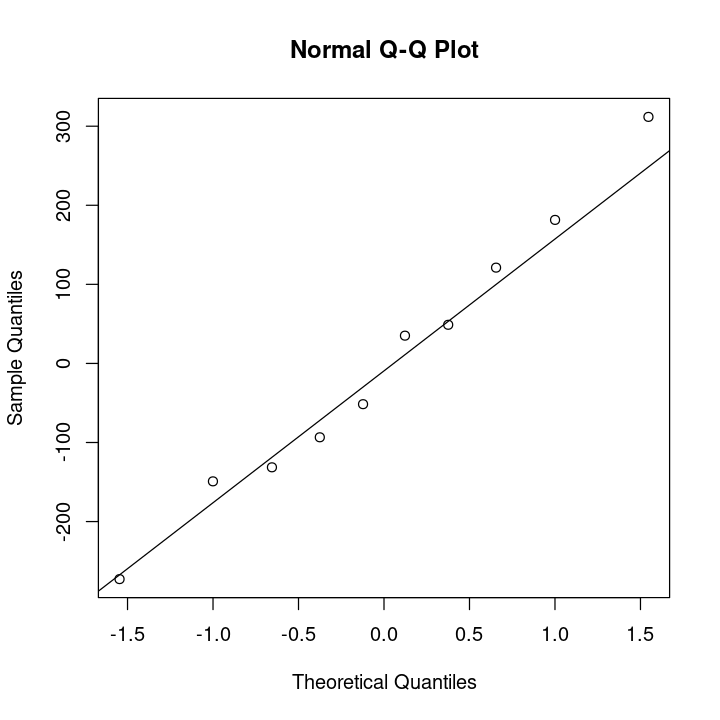

In [638]:
qqnorm(P1w1mA$residuals)
    qqline(P1w1mA$residuals)

In [639]:
P1w1mB <- lm(ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ FOXP3 + IL10 + CSF1, data = P1w1)

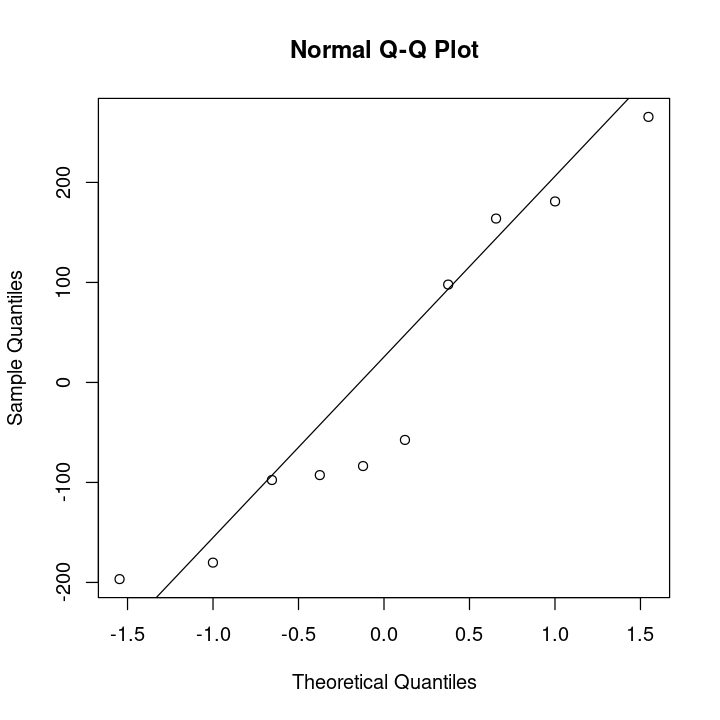

In [640]:
qqnorm(P1w1mB$residuals)
    qqline(P1w1mB$residuals)

In [641]:
### NOTHING HERE for P2 and genes

In [642]:
P2w1 <- wk1qm[wk1qm$Treatment == "P2",]

In [643]:
P2w1m <- lm(ASV_9_Stenotrophomonas_THA2.2_P2 ~ FOXP3l + IL10l +CSF1l, data = P2w1)

In [644]:
vif(P2w1m)

FOXP3l    IL10l    CSF1l 
8.627574 9.551983 1.431744

In [645]:
anova(P2w1m)

Df Sum Sq       Mean Sq      F value      Pr(>F)   
FOXP3l    1  3.786656e+04 3.786656e+04 1.181553e+00 0.3565716
IL10l     1  9.037510e-02 9.037510e-02 2.819980e-06 0.9987656
CSF1l     1  6.752674e+03 6.752674e+03 2.107041e-01 0.6774316
Residuals 3  9.614439e+04 3.204813e+04           NA        NA

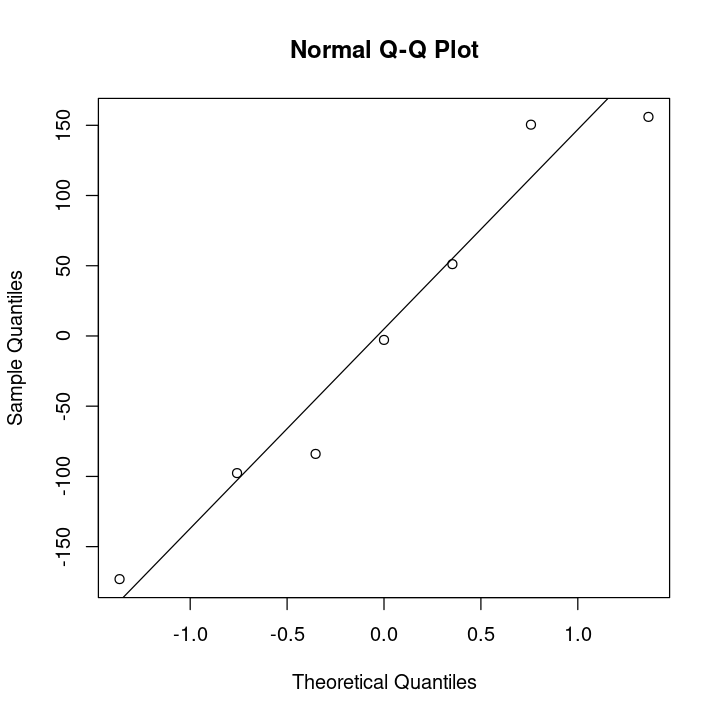

In [646]:
qqnorm(P2w1m$residuals)
    qqline(P2w1m$residuals)

In [647]:
## Looks okay, not better on no log scale:

In [648]:
P2w1mA <- lm(ASV_9_Stenotrophomonas_THA2.2_P2 ~ FOXP3 + IL10 +CSF1, data = P2w1)

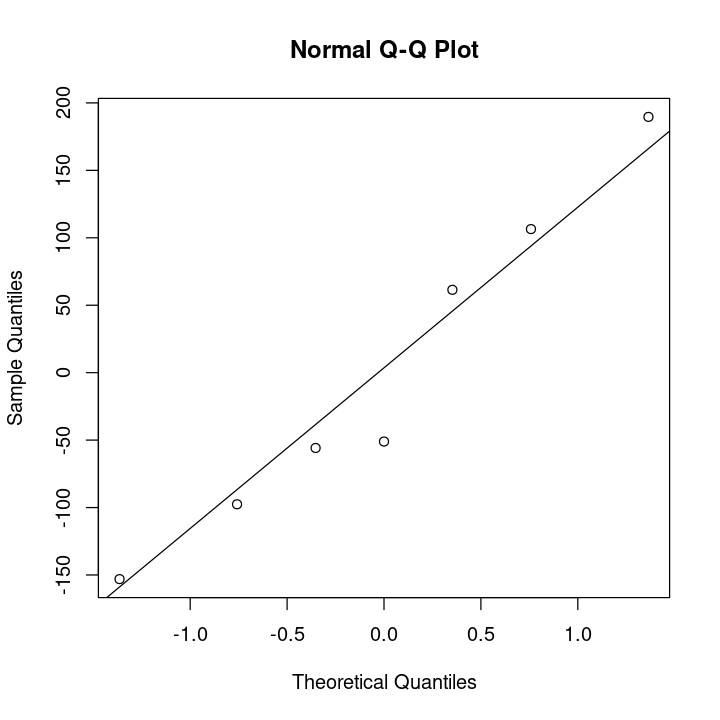

In [649]:
qqnorm(P2w1mA$residuals)
    qqline(P2w1mA$residuals)

In [650]:
## Nothing significant

In [651]:
anova(P2w1m)

Df Sum Sq       Mean Sq      F value      Pr(>F)   
FOXP3l    1  3.786656e+04 3.786656e+04 1.181553e+00 0.3565716
IL10l     1  9.037510e-02 9.037510e-02 2.819980e-06 0.9987656
CSF1l     1  6.752674e+03 6.752674e+03 2.107041e-01 0.6774316
Residuals 3  9.614439e+04 3.204813e+04           NA        NA

In [652]:
### Nothing here for P3

In [653]:
P3w1 <- wk1qm[wk1qm$Treatment == "P3",]

In [654]:
str(P3w1)

'data.frame':	12 obs. of  57 variables:
 $ Row.names.x                        : chr  "P3F10W1" "P3F11W1" "P3F12W1" "P3F1W1" ...
 $ quant_reading                      : num  66 63.6 61 65.6 56 67.8 57.4 43.4 65.2 49.4 ...
 $ Treatment                          : chr  "P3" "P3" "P3" "P3" ...
 $ FrogID                             : chr  "F10" "F11" "F12" "F1" ...
 $ FrogNo                             : int  10 11 12 1 2 3 4 5 6 7 ...
 $ DayWeekNo                          : chr  "W1" "W1" "W1" "W1" ...
 $ Day                                : int  8 8 8 8 8 8 8 8 8 8 ...
 $ Sample.type                        : chr  "swab" "swab" "swab" "swab" ...
 $ TrmtTP                             : chr  "P3W1" "P3W1" "P3W1" "P3W1" ...
 $ TubeLabel                          : chr  "P3F10W1" "P3F11W1" "P3F12W1" "P3F1W1" ...
 $ ExtractionDate                     : chr  "10/3/22" "10/13/22" "10/5/22" "10/13/22" ...
 $ ExtColumn                          : chr  "H" "D" "C" "H" ...
 $ ExtRow                     

In [655]:
P3w1m <- lm(ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~  FOXP3l + IL10l +CSF1l, data = P3w1)

In [656]:
vif(P3w1m)

FOXP3l    IL10l    CSF1l 
1.077679 1.646864 1.685139

In [657]:
### Reporting this in paper:

In [658]:
anova(P3w1m)

Df Sum Sq    Mean Sq   F value   Pr(>F)   
FOXP3l    1  169275.98 169275.98 2.3063638 0.2261495
IL10l     1   25290.59  25290.59 0.3445810 0.5984487
CSF1l     1   38171.63  38171.63 0.5200837 0.5229267
Residuals 3  220185.52  73395.17        NA        NA

In [659]:
## Looks ok, couple outliers...

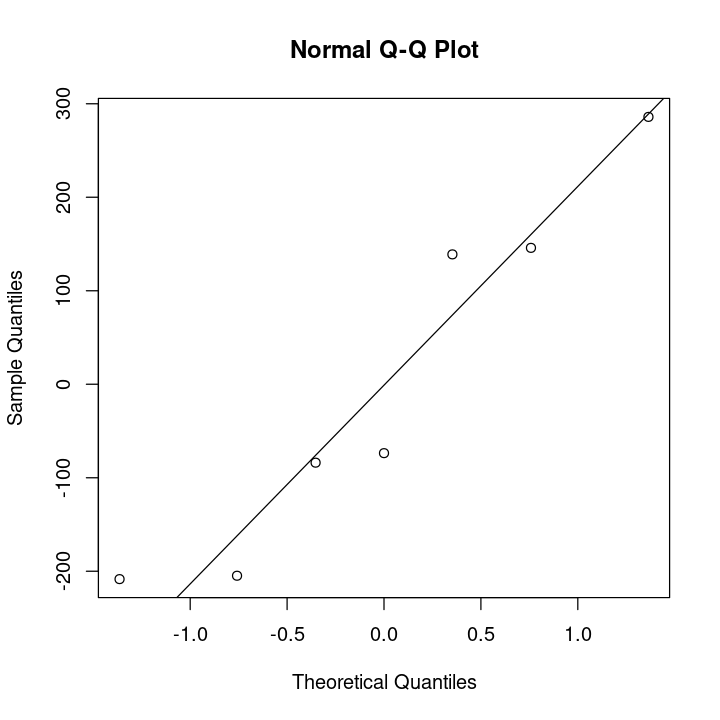

In [660]:
qqnorm(P3w1m$residuals)
    qqline(P3w1m$residuals)

In [661]:
P3w1mnl <- lm(ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~ FOXP3 + IL10 +CSF1, data = P3w1)

In [662]:
## Looks ok, couple outliers and log above is better to use

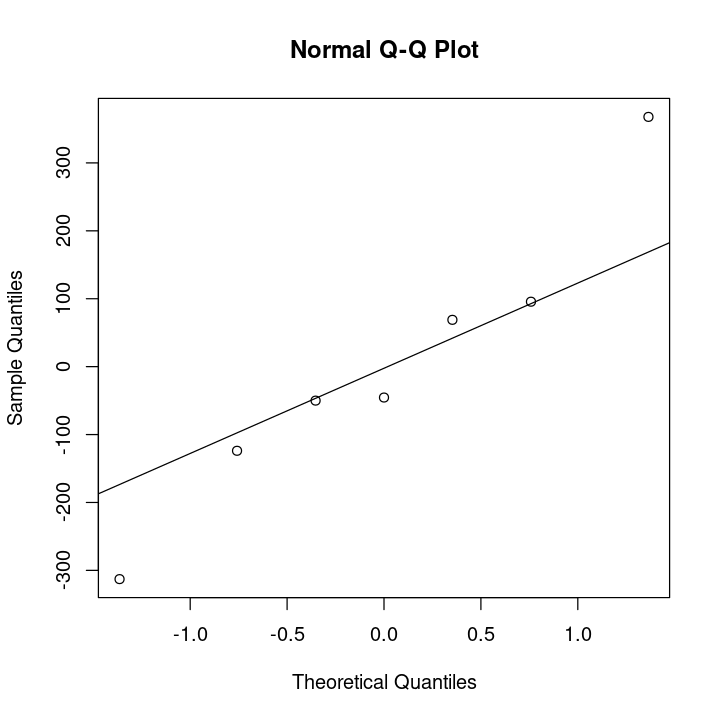

In [663]:
qqnorm(P3w1mnl$residuals)
    qqline(P3w1mnl$residuals)

In [664]:
### Nothing HERE in Cocktail

In [665]:
P4w1 <- wk1qm[wk1qm$Treatment == "P4",]

In [666]:
P4w1m1 <- lm(ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ FOXP3l + IL10l +CSF1l, data = P4w1)

In [667]:
vif(P4w1m1)

FOXP3l    IL10l    CSF1l 
1.225219 1.296416 1.155189

In [668]:
anova(P4w1m1)

Df Sum Sq      Mean Sq    F value   Pr(>F)   
FOXP3l    1   157.506228 157.506228 0.2664034 0.6216536
IL10l     1     9.703834   9.703834 0.0164129 0.9016626
CSF1l     1   536.166102 536.166102 0.9068625 0.3726646
Residuals 7  4138.623836 591.231977        NA        NA

In [669]:
## not bad, couple outliers

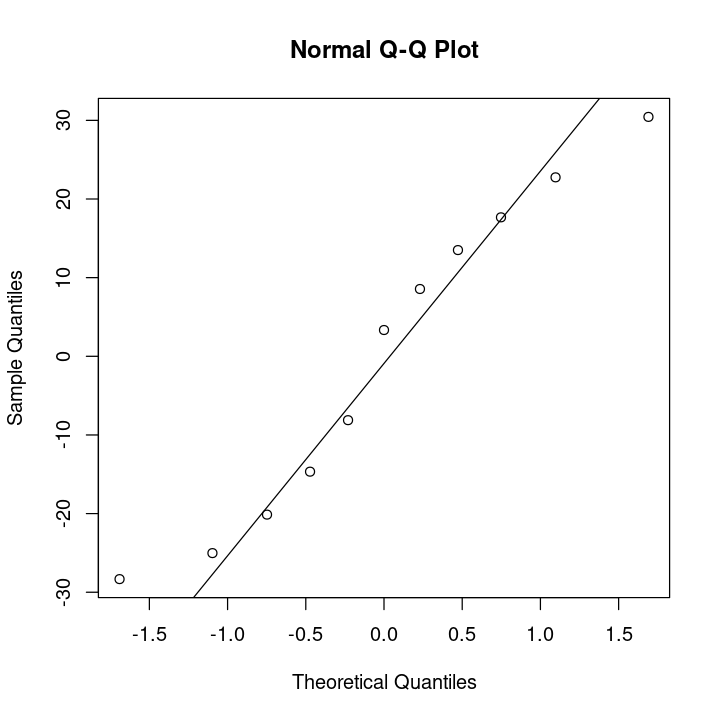

In [670]:
qqnorm(P4w1m1$residuals)
    qqline(P4w1m1$residuals)

In [671]:
P4w1m1B <- lm(ASV_18_Pseudomonas_RSB5.4_ASV18_P1 ~ IL10 + FOXP3 +CSF1, data = P4w1)

In [672]:
anova(P4w1m1B)

Df Sum Sq     Mean Sq    F value    Pr(>F)   
IL10      1    28.42042   28.42042 0.05708826 0.8180032
FOXP3     1   102.61345  102.61345 0.20612019 0.6635672
CSF1      1  1226.13469 1226.13469 2.46294347 0.1605500
Residuals 7  3484.83144  497.83306         NA        NA

In [673]:
P4w1m2 <- lm(ASV_9_Stenotrophomonas_THA2.2_P2 ~ FOXP3l + IL10l+ CSF1l, data = P4w1)

In [674]:
vif(P4w1m2)

FOXP3l    IL10l    CSF1l 
1.225219 1.296416 1.155189

In [675]:
anova(P4w1m2)

Df Sum Sq      Mean Sq    F value     Pr(>F)   
FOXP3l    1    3255.1106  3255.1106 0.059349054 0.8145132
IL10l     1   64913.5299 64913.5299 1.183540924 0.3126691
CSF1l     1     459.7277   459.7277 0.008382021 0.9296178
Residuals 7  383928.1772 54846.8825          NA        NA

In [676]:
## not bad, couple outliers

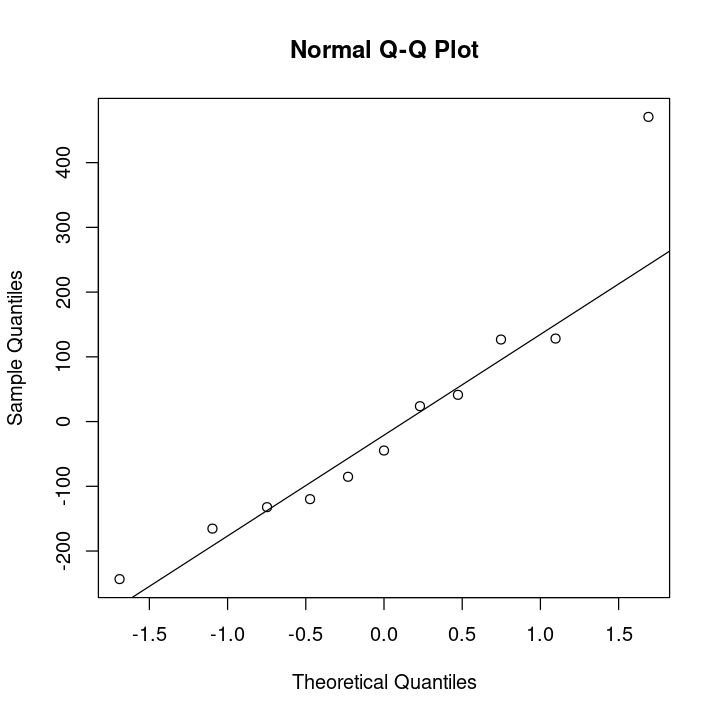

In [677]:
qqnorm(P4w1m2$residuals)
    qqline(P4w1m2$residuals)

In [678]:
P4w1m3 <- lm(ASV_10_Pseudomonas_RSB5.11_ASV10_P3 ~ FOXP3l + IL10l +CSF1l, data = P4w1)

In [679]:
vif(P4w1m3)

FOXP3l    IL10l    CSF1l 
1.225219 1.296416 1.155189

In [680]:
anova(P4w1m3)

Df Sum Sq    Mean Sq   F value    Pr(>F)   
FOXP3l    1   1924.513  1924.513 0.13817801 0.7210959
IL10l     1   2132.658  2132.658 0.15312255 0.7072071
CSF1l     1   1264.889  1264.889 0.09081768 0.7718955
Residuals 7  97494.485 13927.784         NA        NA

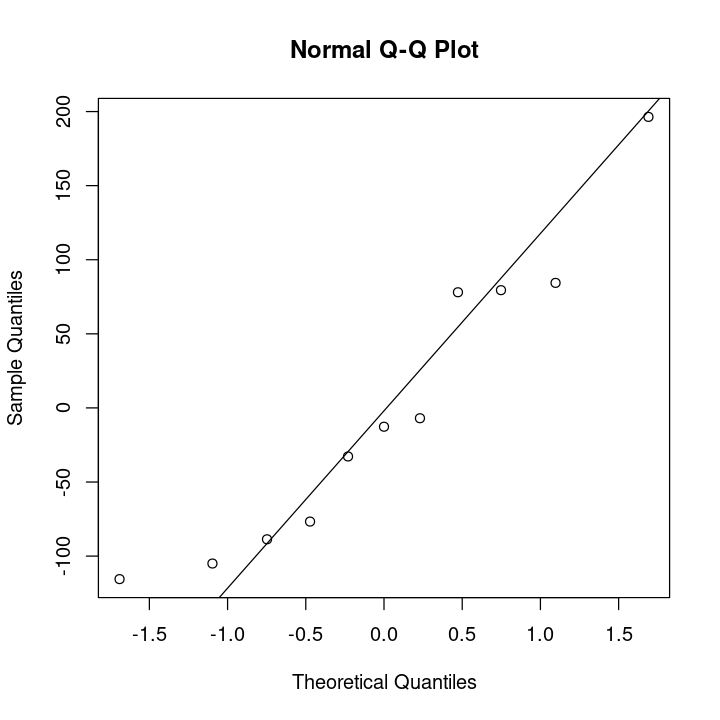

In [681]:
qqnorm(P4w1m3$residuals)
    qqline(P4w1m3$residuals)